In [2]:
#import libraries
#pip install sidetable
#pip install nhanes_pytool_api
#pip install researchpy
#pip install supertree
#pip install statsmodels
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sidetable
from nhanes_data.nhanes_data_api import NHANESDataAPI
import scipy.stats as stats
import researchpy as rp
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_text
from supertree import SuperTree

In [2]:
# Initialize the NHANESDataAPI object
nhanes_api = NHANESDataAPI()

# List available data categories
data_categories = nhanes_api.list_data_categories()
print("Data Categories:", data_categories)

Data Categories: ['demographics', 'dietary', 'examination', 'laboratory', 'questionnaire', 'limitedaccess']


In [3]:
# List available cycle years
cycle_years = nhanes_api.list_cycle_years()
print("Cycle Years:", cycle_years)

Cycle Years: ['1999-2000', '2001-2002', '2003-2004', '2005-2006', '2007-2008', '2009-2010', '2011-2012', '2013-2014', '2015-2016', '2017-2018']


In [4]:
# Specify the data category and cycle years (optional)
cycle_years = ["2003-2004", "2005-2006", "2007-2008", "2009-2010", "2011-2012", "2013-2014"]

In [5]:
#demographic file names
file_names_demo = nhanes_api.list_file_names('demographics', cycle_years)
print(file_names_demo)

['Demographic Variables & Sample Weights']


##### CREATE DEMOGRAPHIC DATASET

In [6]:
# Specify the correct file path
file_path = r'C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/Demo_data/DEMO_C.xpt'

# Read the .xpt file
DEMO_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DEMO_C.head())
print(DEMO_C.shape)
print(DEMO_C.dtypes)

      SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  \
0  21005.0       3.0       2.0       1.0       1.0      19.0     232.0   
1  21006.0       3.0       2.0       2.0       2.0      16.0     203.0   
2  21007.0       3.0       2.0       1.0       2.0      14.0     172.0   
3  21008.0       3.0       2.0       2.0       1.0      17.0     208.0   
4  21009.0       3.0       2.0       2.0       1.0      55.0     671.0   

   RIDAGEEX  RIDRETH1  RIDRETH2  ...  FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  \
0     233.0       4.0       2.0  ...       2.0       2.0      1.0       2.0   
1     205.0       4.0       2.0  ...       2.0       2.0      1.0       2.0   
2     172.0       3.0       1.0  ...       2.0       2.0      1.0       2.0   
3     209.0       4.0       2.0  ...       2.0       2.0      1.0       2.0   
4     672.0       3.0       1.0  ...       2.0       2.0      1.0       2.0   

   MIAINTRP  AIALANG      WTINT2YR      WTMEC2YR  SDMVPSU  SDMVSTRA  
0       2.

In [7]:
# Specify the correct file path
file_path = r'C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/Demo_data/DEMO_D.xpt'

# Read the .xpt file
DEMO_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DEMO_D.head())
print(DEMO_D.shape)
print(DEMO_D.dtypes)

      SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR      RIDAGEYR  RIDAGEMN  \
0  31127.0       4.0       2.0       2.0       1.0  5.397605e-79      11.0   
1  31128.0       4.0       2.0       1.0       2.0  1.100000e+01     132.0   
2  31129.0       4.0       2.0       2.0       1.0  1.500000e+01     189.0   
3  31130.0       4.0       2.0       2.0       2.0  8.500000e+01       NaN   
4  31131.0       4.0       2.0       2.0       2.0  4.400000e+01     535.0   

   RIDAGEEX  RIDRETH1  DMQMILIT  ...  FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  \
0      12.0       3.0       NaN  ...       2.0       2.0      NaN       NaN   
1     132.0       4.0       NaN  ...       2.0       2.0      1.0       2.0   
2     190.0       4.0       NaN  ...       2.0       2.0      1.0       2.0   
3       NaN       3.0       2.0  ...       2.0       2.0      NaN       NaN   
4     536.0       4.0       2.0  ...       2.0       2.0      1.0       2.0   

   MIAINTRP  AIALANG      WTINT2YR      WTMEC2YR  SDMVPS

In [8]:
# Specify the correct file path
file_path = r'C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/Demo_data/DEMO_E.xpt'

# Read the .xpt file
DEMO_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DEMO_E.head())
print(DEMO_E.shape)
print(DEMO_E.dtypes)

      SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  \
0  41475.0       5.0       2.0       2.0       2.0      62.0     751.0   
1  41476.0       5.0       2.0       1.0       2.0       6.0      81.0   
2  41477.0       5.0       2.0       2.0       1.0      71.0     859.0   
3  41478.0       5.0       2.0       2.0       2.0       1.0      17.0   
4  41479.0       5.0       2.0       1.0       1.0      52.0     629.0   

   RIDAGEEX  RIDRETH1  DMQMILIT  ...  FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  \
0     752.0       5.0       2.0  ...       2.0       2.0      1.0       2.0   
1      82.0       5.0       NaN  ...       2.0       2.0      NaN       NaN   
2     860.0       3.0       1.0  ...       2.0       2.0      1.0       2.0   
3      17.0       3.0       NaN  ...       2.0       2.0      NaN       NaN   
4     630.0       1.0       2.0  ...       2.0       2.0      2.0       2.0   

   MIAINTRP  AIALANG      WTINT2YR      WTMEC2YR  SDMVPSU  SDMVSTRA  
0       2.

In [9]:
# Specify the correct file path
file_path = r'C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/Demo_data/DEMO_F.xpt'

# Read the .xpt file
DEMO_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DEMO_F.head())
print(DEMO_F.shape)
print(DEMO_F.dtypes)

      SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  \
0  51624.0       6.0       2.0       1.0       1.0      34.0     409.0   
1  51625.0       6.0       2.0       2.0       1.0       4.0      49.0   
2  51626.0       6.0       2.0       1.0       1.0      16.0     202.0   
3  51627.0       6.0       2.0       1.0       1.0      10.0     131.0   
4  51628.0       6.0       2.0       2.0       2.0      60.0     722.0   

   RIDAGEEX  RIDRETH1  DMQMILIT  ...  FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  \
0     410.0       3.0       2.0  ...       2.0       2.0      1.0       2.0   
1      50.0       5.0       NaN  ...       2.0       2.0      NaN       NaN   
2     202.0       4.0       NaN  ...       2.0       2.0      1.0       2.0   
3     132.0       4.0       NaN  ...       2.0       2.0      1.0       2.0   
4     722.0       4.0       2.0  ...       2.0       2.0      1.0       2.0   

   MIAINTRP  AIALANG      WTINT2YR      WTMEC2YR  SDMVPSU  SDMVSTRA  
0       2.

In [10]:
# Specify the correct file path
file_path = r'C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/Demo_data/DEMO_G.xpt'

# Read the .xpt file
DEMO_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DEMO_G.head())
print(DEMO_G.shape)
print(DEMO_G.dtypes)

      SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  62161.0       7.0       2.0       1.0      22.0       NaN       3.0   
1  62162.0       7.0       2.0       2.0       3.0       NaN       1.0   
2  62163.0       7.0       2.0       1.0      14.0       NaN       5.0   
3  62164.0       7.0       2.0       2.0      44.0       NaN       3.0   
4  62165.0       7.0       2.0       2.0      14.0       NaN       4.0   

   RIDRETH3  RIDEXMON  RIDEXAGY  ...  DMDFMSIZ      DMDHHSZA  DMDHHSZB  \
0       3.0       2.0       NaN  ...       5.0  5.397605e-79       1.0   
1       1.0       1.0       3.0  ...       6.0  2.000000e+00       2.0   
2       6.0       2.0      14.0  ...       5.0  5.397605e-79       2.0   
3       3.0       1.0       NaN  ...       5.0  1.000000e+00       2.0   
4       4.0       2.0      14.0  ...       5.0  1.000000e+00       2.0   

       DMDHHSZE  DMDHRGND  DMDHRAGE  DMDHRBR4  DMDHREDU  DMDHRMAR  DMDHSEDU  
0  5.397605e-79       2.0      5

In [11]:
# Specify the correct file path
file_path = r'C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/Demo_data/DEMO_H.xpt'

# Read the .xpt file
DEMO_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DEMO_H.head())
print(DEMO_H.shape)
print(DEMO_H.dtypes)

      SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  73557.0       8.0       2.0       1.0      69.0       NaN       4.0   
1  73558.0       8.0       2.0       1.0      54.0       NaN       3.0   
2  73559.0       8.0       2.0       1.0      72.0       NaN       3.0   
3  73560.0       8.0       2.0       1.0       9.0       NaN       3.0   
4  73561.0       8.0       2.0       2.0      73.0       NaN       3.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHREDU  DMDHRMAR  DMDHSEDU  \
0       4.0       1.0       NaN  ...       3.0       4.0       NaN   
1       3.0       1.0       NaN  ...       3.0       1.0       1.0   
2       3.0       2.0       NaN  ...       4.0       1.0       3.0   
3       3.0       1.0     119.0  ...       3.0       1.0       4.0   
4       3.0       1.0       NaN  ...       5.0       1.0       5.0   

       WTINT2YR      WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  INDFMPIR  
0  13281.237386  13481.042095      1.0     112.0     

In [12]:
# create master - inner merge by SEQN
dfs = [DEMO_C, DEMO_D, DEMO_E, DEMO_F, DEMO_G, DEMO_H]
demo_final = pd.concat(dfs)
print(demo_final.head())
print(demo_final.shape)
print(demo_final.dtypes)

      SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  \
0  21005.0       3.0       2.0       1.0       1.0      19.0     232.0   
1  21006.0       3.0       2.0       2.0       2.0      16.0     203.0   
2  21007.0       3.0       2.0       1.0       2.0      14.0     172.0   
3  21008.0       3.0       2.0       2.0       1.0      17.0     208.0   
4  21009.0       3.0       2.0       2.0       1.0      55.0     671.0   

   RIDAGEEX  RIDRETH1  RIDRETH2  ...  RIDEXAGY  RIDEXAGM  DMQMILIZ  DMQADFC  \
0     233.0       4.0       2.0  ...       NaN       NaN       NaN      NaN   
1     205.0       4.0       2.0  ...       NaN       NaN       NaN      NaN   
2     172.0       3.0       1.0  ...       NaN       NaN       NaN      NaN   
3     209.0       4.0       2.0  ...       NaN       NaN       NaN      NaN   
4     672.0       3.0       1.0  ...       NaN       NaN       NaN      NaN   

   DMDBORN4  AIALANGA  DMDHHSZA  DMDHHSZB  DMDHHSZE  DMDHRBR4  
0       NaN     

In [19]:
# trim to only columns needed for analysis
demo_trim = demo_final[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2']]

In [20]:
demo_trim.isna().sum()

SEQN            0
RIDAGEYR        0
RIAGENDR        0
RIDRETH1        0
DMDEDUC2    27585
dtype: int64

In [24]:
# verify all DMDEDUC2 missing values are age < 20
rows_with_na = demo_trim[demo_trim['DMDEDUC2'].isna()]
print(rows_with_na.shape)

(27585, 5)


In [25]:
min_age = rows_with_na['RIDAGEYR'].min()
max_age = rows_with_na['RIDAGEYR'].max()

print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")

Minimum Age: 5.397605346934028e-79
Maximum Age: 19.0


##### ALL LESS THAN 20 WHICH WILL BE EXCLUDED, KEEP DEMO_TRIM AS MASTER DEMOGRAPHICS DATASET

In [26]:
demo_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalDemoData.csv")
#n=61,087 - SEQN, RIDAGEYR, RIAGENDR, RIDRETH1, DMDEDUC2

In [31]:
# re-import demo data for merging later on
demo_trim = pd.read_csv("C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\FinalDemoData.csv")
# drop Unnamed column
demo_trim = demo_trim[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2']]
print(demo_trim.shape)
print(demo_trim.dtypes)

(61087, 5)
SEQN        float64
RIDAGEYR    float64
RIAGENDR    float64
RIDRETH1    float64
DMDEDUC2    float64
dtype: object


#### CREATE MEDICAL QUESTIONS DATASET

In [32]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\MCQ_data\\MCQ_C.xpt'

# Read the .xpt file
MCQ_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(MCQ_C.head())
print(MCQ_C.shape)
print(MCQ_C.dtypes)

      SEQN  MCQ010  MCQ025  MCQ035  MCQ040  MCQ050  MCQ053  MCQ060  MCQ080  \
0  21005.0     2.0     NaN     NaN     NaN     NaN     2.0     2.0     1.0   
1  21006.0     2.0     NaN     NaN     NaN     NaN     2.0     1.0     2.0   
2  21007.0     2.0     NaN     NaN     NaN     NaN     2.0     1.0     2.0   
3  21008.0     1.0    12.0     2.0     NaN     NaN     2.0     2.0     2.0   
4  21009.0     2.0     NaN     NaN     NaN     NaN     2.0     NaN     NaN   

   MCQ083  ...  MCQ260GI  MCQ265  MCQ267A  MCQ267B  MCQ267C  MCQ267D  MCQ267E  \
0     NaN  ...       NaN     NaN      NaN      NaN      NaN      NaN      NaN   
1     NaN  ...       NaN     NaN      NaN      NaN      NaN      NaN      NaN   
2     2.0  ...       NaN     NaN      NaN      NaN      NaN      NaN      NaN   
3     NaN  ...       NaN     NaN      NaN      NaN      NaN      NaN      NaN   
4     NaN  ...       NaN     9.0      NaN      NaN      NaN      NaN      NaN   

   MCQ270  MCQ280  MCQ290  
0     NaN     Na

In [33]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\MCQ_data\\MCQ_D.xpt'

# Read the .xpt file
MCQ_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(MCQ_D.head())
print(MCQ_D.shape)
print(MCQ_D.dtypes)

      SEQN  MCQ010  MCQ025  MCQ035  MCQ040  MCQ050  MCQ053  MCQ080  MCQ092  \
0  31128.0     2.0     NaN     NaN     NaN     NaN     2.0     NaN     2.0   
1  31129.0     2.0     NaN     NaN     NaN     NaN     2.0     NaN     2.0   
2  31130.0     2.0     NaN     NaN     NaN     NaN     2.0     2.0     9.0   
3  31131.0     2.0     NaN     NaN     NaN     NaN     2.0     2.0     1.0   
4  31132.0     2.0     NaN     NaN     NaN     NaN     2.0     2.0     2.0   

   MCD093  ...  MCQ268C  MCQ268D  MCQ300A  MCQ300B  MCQ300C  MCQ310  MCQ320  \
0     NaN  ...      NaN      NaN      NaN      NaN      NaN     NaN     NaN   
1     NaN  ...      NaN      NaN      NaN      NaN      NaN     NaN     NaN   
2     NaN  ...      NaN      NaN      2.0      1.0      2.0     NaN     NaN   
3     3.0  ...      NaN      NaN      1.0      2.0      1.0     NaN     NaN   
4     NaN  ...      NaN      NaN      2.0      2.0      2.0     1.0    55.0   

   MCD330  MCQ340  MCQ350  
0     NaN     NaN     NaN  


In [34]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\MCQ_data\\MCQ_E.xpt'

# Read the .xpt file
MCQ_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(MCQ_E.head())
print(MCQ_E.shape)
print(MCQ_E.dtypes)

      SEQN  MCQ010  MCQ025  MCQ035  MCQ040  MCQ050  MCQ051  MCQ053  MCQ080  \
0  41475.0     1.0    60.0     1.0     1.0     2.0     2.0     2.0     1.0   
1  41476.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
2  41477.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   
3  41478.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
4  41479.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   

   MCQ092  ...  MCQ265  MCQ268A  MCQ268B  MCQ268C  MCQ268D  MCQ310  MCQ320  \
0     2.0  ...     NaN      NaN      NaN      NaN      NaN     NaN     NaN   
1     2.0  ...     NaN      NaN      NaN      NaN      NaN     NaN     NaN   
2     2.0  ...     2.0      NaN      NaN      NaN      NaN     1.0    65.0   
3     NaN  ...     NaN      NaN      NaN      NaN      NaN     NaN     NaN   
4     2.0  ...     2.0      NaN      NaN      NaN      NaN     2.0     NaN   

   MCD330  MCQ340  MCQ350  
0     NaN     NaN     NaN  
1     

In [35]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\MCQ_data\\MCQ_F.xpt'

# Read the .xpt file
MCQ_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(MCQ_F.head())
print(MCQ_F.shape)
print(MCQ_F.dtypes)

      SEQN  MCQ010  MCQ025  MCQ035  MCQ040  MCQ050  MCQ051  MCQ053  MCQ070  \
0  51624.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   
1  51625.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
2  51626.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   
3  51627.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
4  51628.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   

   MCQ080  ...  MCQ240T  MCQ240U  MCQ240V  MCQ240W  MCQ240X  MCQ240Y  MCQ240Z  \
0     2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2     2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4     1.0  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   MCQ300A  MCQ300B  MCQ300C  
0      2.0   

In [36]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\MCQ_data\\MCQ_G.xpt'

# Read the .xpt file
MCQ_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(MCQ_G.head())
print(MCQ_G.shape)
print(MCQ_G.dtypes)

      SEQN  MCQ010  MCQ025  MCQ035  MCQ040  MCQ050  MCQ051  MCQ053  MCQ070  \
0  62161.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   
1  62162.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
2  62163.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
3  62164.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   
4  62165.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   

   MCQ075  ...  MCQ300C  MCQ365A  MCQ365B  MCQ365C  MCQ365D  MCQ370A  MCQ370B  \
0     NaN  ...      1.0      1.0      2.0      2.0      2.0      1.0      1.0   
1     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3     NaN  ...      2.0      2.0      2.0      2.0      2.0      1.0      1.0   
4     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   MCQ370C  MCQ370D  MCQ380  
0      2.0    

In [37]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\MCQ_data\\MCQ_H.xpt'

# Read the .xpt file
MCQ_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(MCQ_H.head())
print(MCQ_H.shape)
print(MCQ_H.dtypes)

      SEQN  MCQ010  MCQ025  MCQ035  MCQ040  MCQ050  AGQ030  MCQ053  MCQ070  \
0  73557.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   
1  73558.0     1.0     8.0     1.0     1.0     2.0     2.0     2.0     2.0   
2  73559.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   
3  73560.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
4  73561.0     2.0     NaN     NaN     NaN     NaN     NaN     2.0     2.0   

   MCQ075  ...  MCQ300C  MCQ365A  MCQ365B  MCQ365C  MCQ365D  MCQ370A  MCQ370B  \
0     NaN  ...      1.0      1.0      2.0      1.0      1.0      1.0      2.0   
1     NaN  ...      1.0      2.0      2.0      2.0      2.0      2.0      2.0   
2     NaN  ...      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
3     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4     NaN  ...      2.0      2.0      1.0      2.0      2.0      1.0      2.0   

   MCQ370C  MCQ370D        MCQ380  
0      1

In [41]:
dfs = [MCQ_C, MCQ_D, MCQ_E, MCQ_F, MCQ_G, MCQ_H]
MCQ_final = pd.concat(dfs)
print(MCQ_final.head())
print(MCQ_final.shape)
print(MCQ_final.dtypes)
MCQ_final.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/MCQ.csv")

      SEQN  MCQ010  MCQ025  MCQ035  MCQ040  MCQ050  MCQ053  MCQ060  MCQ080  \
0  21005.0     2.0     NaN     NaN     NaN     NaN     2.0     2.0     1.0   
1  21006.0     2.0     NaN     NaN     NaN     NaN     2.0     1.0     2.0   
2  21007.0     2.0     NaN     NaN     NaN     NaN     2.0     1.0     2.0   
3  21008.0     1.0    12.0     2.0     NaN     NaN     2.0     2.0     2.0   
4  21009.0     2.0     NaN     NaN     NaN     NaN     2.0     NaN     NaN   

   MCQ083  ...  MCQ370A  MCQ370B  MCQ370C  MCQ370D  MCQ380  AGQ030  MCQ151  \
0     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
1     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
2     2.0  ...      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
3     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN     NaN   
4     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN     NaN   

   MCQ160O  MCQ203  MCQ206  
0      NaN     NaN     NaN  
1   

In [51]:
MCQ_trim = MCQ_final[['SEQN', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F']]
MCQ_trim.isna().sum()

SEQN           0
MCQ160B    24876
MCQ160C    24876
MCQ160D    24876
MCQ160E    24876
MCQ160F    24876
dtype: int64

In [ ]:
MCQ_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalMCQData.csv")

##### CREATE DIETARY DATASET

In [44]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR1TOT_C.xpt'
file_path_b = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR2TOT_C.xpt'

# Read the .xpt file
DR1TOT_C = pd.read_sas(file_path, format='xport')
DR2TOT_C = pd.read_sas(file_path_b, format='xport')

# merge file by SEQN
Diet_C = pd.merge(DR1TOT_C, DR2TOT_C, on='SEQN', how='inner')

# Display the first few rows of the dataframe
print(Diet_C.head())
print(Diet_C.shape)
print(Diet_C.dtypes)

      SEQN      WTDRD1_x       WTDR2D_x  DR1DRSTZ  DR1EXMER  DRABF_x  \
0  21005.0   2889.867887    2420.727816       1.0      65.0      2.0   
1  21006.0   2760.504755    2312.365446       1.0      63.0      2.0   
2  21007.0  21311.942772   15327.120025       1.0      66.0      2.0   
3  21008.0   9279.353665   18690.555956       1.0      65.0      2.0   
4  21009.0  56998.593412  170262.470827       1.0      16.0      2.0   

   DRDINT_x  DR1DAY  DR1LANG  DR1MNRSP  ...  DR2TP204      DR2TP205  \
0       2.0     6.0      1.0       1.0  ...     0.179  5.397605e-79   
1       2.0     6.0      1.0       1.0  ...     0.016  5.397605e-79   
2       2.0     6.0      1.0       1.0  ...     0.029  1.000000e-02   
3       2.0     3.0      1.0       1.0  ...     0.045  5.397605e-79   
4       2.0     6.0      1.0       1.0  ...     0.192  4.000000e-03   

       DR2TP225      DR2TP226  DR2_300  DR2_320       DR2_330      DR2BWATR  \
0  1.400000e-02  1.900000e-02      2.0    518.0  5.180000e+02

In [45]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR1TOT_D.xpt'
file_path_b = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR2TOT_D.xpt'

# Read the .xpt file
DR1TOT_D = pd.read_sas(file_path, format='xport')
DR2TOT_D = pd.read_sas(file_path_b, format='xport')

# merge file by SEQN
Diet_D = pd.merge(DR1TOT_D, DR2TOT_D, on='SEQN', how='inner')

# Display the first few rows of the dataframe
print(Diet_D.head())
print(Diet_D.shape)
print(Diet_D.dtypes)

      SEQN      WTDRD1_x      WTDR2D_x  DR1DRSTZ  DR1EXMER  DRABF_x  DRDINT_x  \
0  31127.0   4718.873252   5906.472362       1.0      57.0      2.0       2.0   
1  31128.0   3933.789046   4250.890435       1.0      16.0      2.0       2.0   
2  31129.0  26719.805504  26719.805504       1.0      10.0      2.0       2.0   
3  31130.0           NaN           NaN       5.0       NaN      NaN       NaN   
4  31131.0  13595.895940  14822.479326       1.0      16.0      2.0       2.0   

   DR1DAY  DR1LANG  DR1MNRSP  ...      DR2TP184  DR2TP204      DR2TP205  \
0     7.0      1.0       3.0  ...  6.900000e-02     0.019  5.397605e-79   
1     6.0      1.0       1.0  ...  2.000000e-02     0.105  5.397605e-79   
2     2.0      1.0       1.0  ...  1.090000e-01     0.058  8.800000e-02   
3     NaN      NaN       NaN  ...           NaN       NaN           NaN   
4     6.0      1.0       1.0  ...  5.397605e-79     0.108  2.000000e-03   

       DR2TP225      DR2TP226  DR2_300      DR2_320Z      DR2_

In [46]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR1TOT_E.xpt'
file_path_b = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR2TOT_E.xpt'

# Read the .xpt file
DR1TOT_E = pd.read_sas(file_path, format='xport')
DR2TOT_E = pd.read_sas(file_path_b, format='xport')

# merge file by SEQN
Diet_E = pd.merge(DR1TOT_E, DR2TOT_E, on='SEQN', how='inner')

# Display the first few rows of the dataframe
print(Diet_E.head())
print(Diet_E.shape)
print(Diet_E.dtypes)

      SEQN      WTDRD1_x      WTDR2D_x  DR1DRSTZ  DR1EXMER  DRABF_x  DRDINT_x  \
0  41475.0  53942.247631  58815.545267       1.0      23.0      2.0       2.0   
1  41476.0  20558.408369  16752.049990       1.0      25.0      2.0       2.0   
2  41477.0   9050.134179   9867.749303       1.0      33.0      2.0       2.0   
3  41478.0  32343.214639           NaN       1.0      33.0      2.0       1.0   
4  41479.0   5078.443529   4353.945307       1.0      22.0      2.0       2.0   

        DR1DBIH  DR1DAY  DR1LANG  ...      DR2TP184  DR2TP204      DR2TP205  \
0  5.397605e-79     5.0      1.0  ...  5.397605e-79     0.160  8.000000e-03   
1  5.397605e-79     7.0      1.0  ...  2.100000e-02     0.036  5.397605e-79   
2  2.700000e+01     5.0      1.0  ...  4.700000e-02     0.299  2.680000e-01   
3  2.100000e+01     4.0      1.0  ...           NaN       NaN           NaN   
4  1.500000e+01     6.0      2.0  ...  5.397605e-79     0.062  4.000000e-03   

       DR2TP225  DR2TP226  DR2_300    

In [47]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR1TOT_F.xpt'
file_path_b = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR2TOT_F.xpt'

# Read the .xpt file
DR1TOT_F = pd.read_sas(file_path, format='xport')
DR2TOT_F = pd.read_sas(file_path_b, format='xport')

# merge file by SEQN
Diet_F = pd.merge(DR1TOT_F, DR2TOT_F, on='SEQN', how='inner')

# Display the first few rows of the dataframe
print(Diet_F.head())
print(Diet_F.shape)
print(Diet_F.dtypes)

      SEQN       WTDRD1_x       WTDR2D_x  DR1DRSTZ  DR1EXMER  DRABF_x  \
0  51624.0  171886.802965  182302.928036       1.0      23.0      2.0   
1  51625.0   52953.303280  127261.657958       1.0      41.0      2.0   
2  51626.0   29699.652633   43756.076597       1.0      42.0      2.0   
3  51627.0   25592.859165   45085.323924       1.0      25.0      2.0   
4  51628.0   17509.779266   14286.350072       1.0      42.0      2.0   

   DRDINT_x  DR1DBIH  DR1DAY  DR1LANG  ...      DR2TP184  DR2TP204  DR2TP205  \
0       2.0     18.0     2.0      1.0  ...  1.180000e-01     0.079     0.008   
1       2.0      7.0     7.0      1.0  ...  6.100000e-02     0.232     0.004   
2       2.0      7.0     2.0      1.0  ...  1.000000e-03     0.121     0.008   
3       2.0      2.0     5.0      1.0  ...  5.397605e-79     0.031     0.004   
4       2.0     13.0     1.0      1.0  ...  5.397605e-79     0.059     0.004   

       DR2TP225      DR2TP226  DR2_300      DR2_320Z      DR2_330Z  \
0  5.39760

In [48]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR1TOT_G.xpt'
file_path_b = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR2TOT_G.xpt'

# Read the .xpt file
DR1TOT_G = pd.read_sas(file_path, format='xport')
DR2TOT_G = pd.read_sas(file_path_b, format='xport')

# merge file by SEQN
Diet_G = pd.merge(DR1TOT_G, DR2TOT_G, on='SEQN', how='inner')

# Display the first few rows of the dataframe
print(Diet_G.head())
print(Diet_G.shape)
print(Diet_G.dtypes)

      SEQN      WTDRD1_x      WTDR2D_x  DR1DRSTZ  DR1EXMER  DRABF_x  DRDINT_x  \
0  62161.0  58373.375716  46955.912018       1.0      63.0      2.0       2.0   
1  62162.0  15886.609265  13901.170266       1.0      42.0      2.0       2.0   
2  62163.0   3876.441104   2755.061606       1.0      25.0      2.0       2.0   
3  62164.0  70653.580056  52879.479478       1.0      42.0      2.0       2.0   
4  62165.0   5910.002709   9478.001856       1.0      25.0      2.0       2.0   

   DR1DBIH  DR1DAY  DR1LANG  ...      DR2TP184  DR2TP204  DR2TP205  DR2TP225  \
0      9.0     6.0      1.0  ...  2.000000e-03     0.207     0.011     0.016   
1     29.0     1.0      1.0  ...  1.000000e-03     0.046     0.005     0.005   
2      3.0     6.0      1.0  ...  1.000000e-03     0.073     0.003     0.025   
3     19.0     7.0      1.0  ...  5.397605e-79     0.136     0.008     0.013   
4     12.0     6.0      1.0  ...  3.000000e-03     0.134     0.006     0.013   

   DR2TP226  DR2_300      DR2_32

In [49]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR1TOT_H.xpt'
file_path_b = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Dietary_data\\DR2TOT_H.xpt'

# Read the .xpt file
DR1TOT_H = pd.read_sas(file_path, format='xport')
DR2TOT_H = pd.read_sas(file_path_b, format='xport')

# merge file by SEQN
Diet_H = pd.merge(DR1TOT_H, DR2TOT_H, on='SEQN', how='inner')

# Display the first few rows of the dataframe
print(Diet_H.head())
print(Diet_H.shape)
print(Diet_H.dtypes)

      SEQN       WTDRD1_x       WTDR2D_x  DR1DRSTZ  DR1EXMER  DRABF_x  \
0  73557.0   16888.327864   12930.890649       1.0      49.0      2.0   
1  73558.0   17932.143865   12684.148869       1.0      59.0      2.0   
2  73559.0   59641.812930   39394.236709       1.0      49.0      2.0   
3  73560.0  142203.069917  125966.366442       1.0      54.0      2.0   
4  73561.0   59052.357033   39004.892993       1.0      63.0      2.0   

   DRDINT_x  DR1DBIH  DR1DAY  DR1LANG  ...      DR2TP184  DR2TP204  DR2TP205  \
0       2.0      6.0     2.0      1.0  ...  1.300000e-02     0.586     0.013   
1       2.0      4.0     1.0      1.0  ...  1.000000e-03     0.171     0.010   
2       2.0     18.0     6.0      1.0  ...  1.000000e-03     0.020     0.017   
3       2.0     21.0     3.0      1.0  ...  2.000000e-03     0.056     0.006   
4       2.0     18.0     1.0      1.0  ...  5.397605e-79     0.005     0.001   

   DR2TP225      DR2TP226  DR2_300      DR2_320Z      DR2_330Z      DR2BWATZ  \


In [50]:
dfs = [Diet_C, Diet_D, Diet_E, Diet_F, Diet_G, Diet_H]
Diet_final = pd.concat(dfs)
print(Diet_final.head())
print(Diet_final.shape)
print(Diet_final.dtypes)

      SEQN      WTDRD1_x       WTDR2D_x  DR1DRSTZ  DR1EXMER  DRABF_x  \
0  21005.0   2889.867887    2420.727816       1.0      65.0      2.0   
1  21006.0   2760.504755    2312.365446       1.0      63.0      2.0   
2  21007.0  21311.942772   15327.120025       1.0      66.0      2.0   
3  21008.0   9279.353665   18690.555956       1.0      65.0      2.0   
4  21009.0  56998.593412  170262.470827       1.0      16.0      2.0   

   DRDINT_x  DR1DAY  DR1LANG  DR1MNRSP  ...  DRQSDT10  DR1TVD  DR2DBIH  \
0       2.0     6.0      1.0       1.0  ...       NaN     NaN      NaN   
1       2.0     6.0      1.0       1.0  ...       NaN     NaN      NaN   
2       2.0     6.0      1.0       1.0  ...       NaN     NaN      NaN   
3       2.0     3.0      1.0       1.0  ...       NaN     NaN      NaN   
4       2.0     6.0      1.0       1.0  ...       NaN     NaN      NaN   

   DR2TVD  DRQSDT11  DRQSDT12  DR1STY  DR1SKY  DR2STY  DR2SKY  
0     NaN       NaN       NaN     NaN     NaN     NaN     

In [55]:
Diet_trim = Diet_final[['SEQN', 'DR1TKCAL', 'DR2TKCAL', 'DR1TALCO', 'DR2TALCO', 'DR1TCALC', 'DR2TCALC', 'DR1TCAFF', 'DR2TCAFF', 'DR1TCHOL', 'DR2TCHOL',  'DR1TCOPP', 'DR2TCOPP', 'DR1TIRON', 'DR2TIRON', 'DR1TFIBE', 'DR2TFIBE', 'DRD360', 'DR1TFOLA', 'DR2TFOLA', 'DR1TPOTA', 'DR2TPOTA', 'DR1TMFAT', 'DR2TMFAT', 'DR1TMAGN', 'DR2TMAGN', 'DR1TSODI', 'DR2TSODI', 'DR1TNIAC', 'DR2TNIAC', 'DR1TPFAT', 'DR2TPFAT', 'DR1TPROT', 'DR2TPROT', 'DBD100', 'DRQSPREP', 'DR1STY', 'DR2STY', 'DR1TSFAT', 'DR2TSFAT', 'DR1TSUGR', 'DR2TSUGR', 'DR1TTHEO', 'DR2TTHEO', 'DR1TVARA', 'DR2TVARA', 'DR1TVB1', 'DR2TVB1', 'DR1TVB12', 'DR2TVB12', 'DR1TVB2', 'DR2TVB2', 'DR1TVB6', 'DR2TVB6', 'DR1TVC', 'DR2TVC', 'DR1TATOC', 'DR2TATOC', 'DR1TVK', 'DR2TVK', 'DR1TZINC', 'DR2TZINC', 'DR1_320Z', 'DR2_320Z']]
Diet_trim.isna().sum()

SEQN            0
DR1TKCAL     5035
DR2TKCAL    11323
DR1TALCO     5035
DR2TALCO    11323
            ...  
DR2TVK      11323
DR1TZINC     5035
DR2TZINC    11323
DR1_320Z    13221
DR2_320Z    18907
Length: 64, dtype: int64

In [56]:
Diet_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalDietData.csv")

##### CREATE HEALTH INSURANCE DATASET

In [57]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Health_Insurance_data\\HIQ_C.xpt'

# Read the .xpt file
HIQ_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HIQ_C.head())
print(HIQ_C.shape)
print(HIQ_C.dtypes)

      SEQN  HID010  HID030A  HID030B  HID030C  HID030D  HID030E  HID040  \
0  21005.0     1.0      1.0      2.0      2.0      2.0      2.0     1.0   
1  21006.0     1.0      2.0      2.0      1.0      2.0      2.0     1.0   
2  21007.0     1.0      1.0      2.0      2.0      2.0      2.0     1.0   
3  21008.0     1.0      1.0      2.0      2.0      2.0      2.0     1.0   
4  21009.0     1.0      1.0      2.0      2.0      2.0      2.0     1.0   

   HIQ210  HIQ220  
0     2.0     NaN  
1     2.0     NaN  
2     2.0     NaN  
3     2.0     NaN  
4     2.0     NaN  
(10122, 10)
SEQN       float64
HID010     float64
HID030A    float64
HID030B    float64
HID030C    float64
HID030D    float64
HID030E    float64
HID040     float64
HIQ210     float64
HIQ220     float64
dtype: object


In [58]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Health_Insurance_data\\HIQ_D.xpt'

# Read the .xpt file
HIQ_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HIQ_D.head())
print(HIQ_D.shape)
print(HIQ_D.dtypes)

      SEQN  HIQ011  HIQ031A  HIQ031B  HIQ031C  HIQ031D  HIQ031E  HIQ031F  \
0  31127.0     1.0      NaN      NaN      NaN      NaN      NaN      NaN   
1  31128.0     1.0      NaN      NaN      NaN     17.0      NaN      NaN   
2  31129.0     1.0      NaN      NaN      NaN      NaN     18.0      NaN   
3  31130.0     1.0      NaN     15.0      NaN      NaN      NaN      NaN   
4  31131.0     1.0     14.0      NaN      NaN      NaN      NaN      NaN   

   HIQ031G  HIQ031H  HIQ031I  HIQ031J  HIQ031AA  HIQ260  HIQ105  HIQ270  \
0      NaN     21.0      NaN      NaN       NaN     NaN     NaN     9.0   
1      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
2      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
3      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
4      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   

   HIQ210  
0     2.0  
1     2.0  
2     1.0  
3     2.0  
4     2.0  
(10348, 17)
SEQN    

In [59]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Health_Insurance_data\\HIQ_E.xpt'

# Read the .xpt file
HIQ_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HIQ_E.head())
print(HIQ_E.shape)
print(HIQ_E.dtypes)

      SEQN  HIQ011  HIQ031A  HIQ031B  HIQ031C  HIQ031D  HIQ031E  HIQ031F  \
0  41475.0     2.0      NaN      NaN      NaN      NaN      NaN      NaN   
1  41476.0     1.0     14.0      NaN      NaN      NaN      NaN      NaN   
2  41477.0     1.0      NaN     15.0      NaN      NaN      NaN     19.0   
3  41478.0     1.0      NaN      NaN      NaN     17.0      NaN      NaN   
4  41479.0     2.0      NaN      NaN      NaN      NaN      NaN      NaN   

   HIQ031G  HIQ031H  HIQ031I  HIQ031J  HIQ031AA  HIQ260  HIQ105  HIQ270  \
0      NaN      NaN      NaN      NaN       NaN     NaN     NaN     NaN   
1      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
2      NaN      NaN      NaN      NaN       NaN     NaN     NaN     2.0   
3      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
4      NaN      NaN      NaN      NaN       NaN     NaN     NaN     NaN   

   HIQ210  
0     NaN  
1     2.0  
2     2.0  
3     2.0  
4     NaN  
(10149, 17)
SEQN    

In [60]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Health_Insurance_data\\HIQ_F.xpt'

# Read the .xpt file
HIQ_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HIQ_F.head())
print(HIQ_F.shape)
print(HIQ_F.dtypes)

      SEQN  HIQ011  HIQ031A  HIQ031B  HIQ031C  HIQ031D  HIQ031E  HIQ031F  \
0  51624.0     2.0      NaN      NaN      NaN      NaN      NaN      NaN   
1  51625.0     1.0     14.0      NaN      NaN      NaN      NaN      NaN   
2  51626.0     1.0     14.0      NaN      NaN      NaN      NaN      NaN   
3  51627.0     1.0      NaN      NaN      NaN     17.0      NaN      NaN   
4  51628.0     1.0      NaN     15.0      NaN      NaN      NaN      NaN   

   HIQ031H  HIQ031I  HIQ031J  HIQ031AA  HIQ260  HIQ105  HIQ270  HIQ210  
0      NaN      NaN      NaN       NaN     NaN     NaN     NaN     NaN  
1      NaN      NaN      NaN       NaN     NaN     NaN     1.0     1.0  
2      NaN      NaN      NaN       NaN     NaN     NaN     1.0     2.0  
3      NaN      NaN      NaN       NaN     NaN     NaN     1.0     2.0  
4      NaN      NaN      NaN       NaN     NaN     NaN     1.0     2.0  
(10537, 16)
SEQN        float64
HIQ011      float64
HIQ031A     float64
HIQ031B     float64
HIQ031C     f

In [61]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Health_Insurance_data\\HIQ_G.xpt'

# Read the .xpt file
HIQ_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HIQ_G.head())
print(HIQ_G.shape)
print(HIQ_G.dtypes)

      SEQN  HIQ011  HIQ031A  HIQ031B  HIQ031C  HIQ031D  HIQ031E  HIQ031F  \
0  62161.0     1.0     14.0      NaN      NaN      NaN      NaN      NaN   
1  62162.0     1.0      NaN      NaN      NaN     17.0      NaN      NaN   
2  62163.0     1.0     14.0      NaN      NaN      NaN      NaN      NaN   
3  62164.0     1.0     14.0      NaN      NaN      NaN      NaN      NaN   
4  62165.0     2.0      NaN      NaN      NaN      NaN      NaN      NaN   

   HIQ031G  HIQ031H  HIQ031I  HIQ031J  HIQ031AA  HIQ260  HIQ105  HIQ270  \
0      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
1      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
2      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
3      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
4      NaN      NaN      NaN      NaN       NaN     NaN     NaN     NaN   

   HIQ210  
0     2.0  
1     2.0  
2     2.0  
3     2.0  
4     NaN  
(9756, 17)
SEQN     

In [62]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Health_Insurance_data\\HIQ_H.xpt'

# Read the .xpt file
HIQ_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HIQ_H.head())
print(HIQ_H.shape)
print(HIQ_H.dtypes)

      SEQN  HIQ011  HIQ031A  HIQ031B  HIQ031C  HIQ031D  HIQ031E  HIQ031F  \
0  73557.0     1.0      NaN     15.0      NaN     17.0      NaN      NaN   
1  73558.0     2.0      NaN      NaN      NaN      NaN      NaN      NaN   
2  73559.0     1.0     14.0     15.0      NaN      NaN      NaN      NaN   
3  73560.0     1.0     14.0      NaN      NaN      NaN      NaN      NaN   
4  73561.0     1.0     14.0     15.0      NaN      NaN      NaN      NaN   

   HIQ031G  HIQ031H  HIQ031I  HIQ031J  HIQ031AA  HIQ260  HIQ105  HIQ270  \
0      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
1      NaN      NaN      NaN      NaN       NaN     NaN     NaN     NaN   
2      NaN      NaN      NaN      NaN       NaN     NaN     1.0     1.0   
3      NaN      NaN      NaN      NaN       NaN     NaN     NaN     1.0   
4      NaN      NaN      NaN      NaN       NaN     NaN     1.0     1.0   

   HIQ210  
0     2.0  
1     NaN  
2     2.0  
3     2.0  
4     2.0  
(10175, 17)
SEQN    

In [63]:
dfs = [HIQ_C, HIQ_D, HIQ_E, HIQ_F, HIQ_G, HIQ_H]
HIQ_final = pd.concat(dfs)
print(HIQ_final.head())
print(HIQ_final.shape)
print(HIQ_final.dtypes)

      SEQN  HID010  HID030A  HID030B  HID030C  HID030D  HID030E  HID040  \
0  21005.0     1.0      1.0      2.0      2.0      2.0      2.0     1.0   
1  21006.0     1.0      2.0      2.0      1.0      2.0      2.0     1.0   
2  21007.0     1.0      1.0      2.0      2.0      2.0      2.0     1.0   
3  21008.0     1.0      1.0      2.0      2.0      2.0      2.0     1.0   
4  21009.0     1.0      1.0      2.0      2.0      2.0      2.0     1.0   

   HIQ210  HIQ220  ...  HIQ031E  HIQ031F  HIQ031G  HIQ031H  HIQ031I  HIQ031J  \
0     2.0     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1     2.0     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
2     2.0     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3     2.0     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
4     2.0     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   

   HIQ031AA  HIQ260  HIQ105  HIQ270  
0       NaN     NaN     NaN   

In [64]:
HIQ_trim = HIQ_final[['SEQN', 'HIQ011']]
HIQ_trim.isna().sum()

SEQN          0
HIQ011    10123
dtype: int64

In [65]:
HIQ_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalHealthInsuranceData.csv")

##### CREATE DIABETES QUESTIONNAIRE

In [67]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Diabetes_data\\DIQ_C.xpt'

# Read the .xpt file
DIQ_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DIQ_C.head())
print(DIQ_C.shape)
print(DIQ_C.dtypes)

      SEQN  DIQ010  DID040G  DID040Q  DIQ050  DID060G  DID060Q  DIQ060U  \
0  21005.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   
1  21006.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   
2  21007.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   
3  21008.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   
4  21009.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   

   DIQ070  DIQ080  DIQ090  DIQ100  DIQ110  DIQ120  DIQ130  DIQ140  DIQ150  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     2.0     2.0     NaN     2.0     NaN     2.0     NaN  
(9645, 17)
SEQN       float64
DIQ010     float64
DID040G    float64
DID040Q    float64
DIQ050

In [68]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Diabetes_data\\DIQ_D.xpt'

# Read the .xpt file
DIQ_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DIQ_D.head())
print(DIQ_D.shape)
print(DIQ_D.dtypes)

      SEQN  DIQ010  DID040  DIQ220  DIQ160  DIQ170  DIQ180  DIQ190A  DIQ190B  \
0  31128.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN      NaN   
1  31129.0     2.0     NaN     NaN     2.0     2.0     1.0      2.0      2.0   
2  31130.0     2.0     NaN     NaN     2.0     2.0     1.0      2.0      2.0   
3  31131.0     2.0     NaN     NaN     2.0     1.0     1.0      2.0      2.0   
4  31132.0     1.0    63.0     NaN     NaN     NaN     NaN      1.0      1.0   

   DIQ190C  ...  DIQ300D  DID310S  DID310D  DID320  DID330  DID340  DID350  \
0      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
1      2.0  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
2      2.0  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
3      2.0  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
4      1.0  ...   9999.0   6666.0   6666.0  9999.0  6666.0     1.0     1.0   

   DIQ350U  DIQ360  DIQ080  
0      NaN     NaN   

In [69]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Diabetes_data\\DIQ_E.xpt'

# Read the .xpt file
DIQ_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DIQ_E.head())
print(DIQ_E.shape)
print(DIQ_E.dtypes)

      SEQN  DIQ010  DID040  DIQ220  DIQ160  DIQ170  DIQ180  DIQ190A  DIQ190B  \
0  41475.0     2.0     NaN     NaN     2.0     1.0     1.0      1.0      1.0   
1  41476.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN      NaN   
2  41477.0     1.0    60.0     NaN     NaN     NaN     NaN      2.0      1.0   
3  41478.0     2.0     NaN     NaN     NaN     NaN     NaN      NaN      NaN   
4  41479.0     2.0     NaN     NaN     2.0     2.0     2.0      2.0      2.0   

   DIQ190C  ...  DIQ300D  DID310S  DID310D  DID320  DID330  DID340  DID350  \
0      1.0  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
1      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
2      1.0  ...   9999.0   6666.0   6666.0  9999.0  6666.0     1.0     7.0   
3      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
4      2.0  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   

   DIQ350U  DIQ360  DIQ080  
0      NaN     NaN   

In [70]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Diabetes_data\\DIQ_F.xpt'

# Read the .xpt file
DIQ_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DIQ_F.head())
print(DIQ_F.shape)
print(DIQ_F.dtypes)

      SEQN  DIQ010  DID040  DIQ160  DIQ170  DIQ180  DIQ050  DID060  DIQ060U  \
0  51624.0     2.0     NaN     2.0     2.0     2.0     2.0     NaN      NaN   
1  51625.0     2.0     NaN     NaN     NaN     NaN     2.0     NaN      NaN   
2  51626.0     2.0     NaN     2.0     2.0     2.0     2.0     NaN      NaN   
3  51627.0     2.0     NaN     NaN     NaN     NaN     2.0     NaN      NaN   
4  51628.0     1.0    56.0     NaN     NaN     NaN     2.0     NaN      NaN   

   DIQ070  DIQ230  DIQ240  DID250  DID260  DIQ260U  DID341  DID350  DIQ350U  \
0     NaN     NaN     NaN     NaN     NaN      NaN     NaN     NaN      NaN   
1     NaN     NaN     NaN     NaN     NaN      NaN     NaN     NaN      NaN   
2     NaN     NaN     NaN     NaN     NaN      NaN     NaN     NaN      NaN   
3     NaN     NaN     NaN     NaN     NaN      NaN     NaN     NaN      NaN   
4     1.0     2.0     1.0     4.0     1.0      1.0     4.0     1.0      1.0   

   DIQ360  DIQ080  
0     NaN     NaN  
1     NaN 

In [71]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Diabetes_data\\DIQ_G.xpt'

# Read the .xpt file
DIQ_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DIQ_G.head())
print(DIQ_G.shape)
print(DIQ_G.dtypes)

      SEQN  DIQ010  DID040  DIQ160  DIQ170  DIQ172  DIQ175A  DIQ175B  DIQ175C  \
0  62161.0     2.0     NaN     2.0     2.0     1.0     10.0      NaN      NaN   
1  62162.0     2.0     NaN     NaN     NaN     NaN      NaN      NaN      NaN   
2  62163.0     2.0     NaN     2.0     2.0     2.0      NaN      NaN      NaN   
3  62164.0     2.0     NaN     2.0     2.0     2.0      NaN      NaN      NaN   
4  62165.0     2.0     NaN     2.0     2.0     1.0     10.0      NaN      NaN   

   DIQ175D  ...  DIQ300D  DID310S  DID310D  DID320  DID330  DID341  DID350  \
0      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
1      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
2      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
3      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   
4      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN     NaN   

   DIQ350U  DIQ360  DIQ080  
0      NaN     

In [72]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Diabetes_data\\DIQ_H.xpt'

# Read the .xpt file
DIQ_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(DIQ_H.head())
print(DIQ_H.shape)
print(DIQ_H.dtypes)

      SEQN  DIQ010  DID040  DIQ160  DIQ170  DIQ172  DIQ175A  DIQ175B  DIQ175C  \
0  73557.0     1.0    62.0     NaN     NaN     NaN      NaN      NaN      NaN   
1  73558.0     1.0    23.0     NaN     NaN     NaN      NaN      NaN      NaN   
2  73559.0     1.0    57.0     NaN     NaN     NaN      NaN      NaN      NaN   
3  73560.0     2.0     NaN     NaN     NaN     NaN      NaN      NaN      NaN   
4  73561.0     2.0     NaN     2.0     2.0     2.0      NaN      NaN      NaN   

   DIQ175D  ...  DIQ300D  DID310S  DID310D  DID320  DID330  DID341  \
0      NaN  ...   9999.0   6666.0   6666.0  5555.0     NaN     2.0   
1      NaN  ...     82.0   9999.0   9999.0   147.0   147.0     6.0   
2      NaN  ...     89.0   6666.0   6666.0  9999.0  6666.0     2.0   
3      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN   
4      NaN  ...      NaN      NaN      NaN     NaN     NaN     NaN   

         DID350  DIQ350U  DIQ360  DIQ080  
0  5.397605e-79      NaN     4.0     2.0  
1  1.0

In [73]:
dfs = [DIQ_C, DIQ_D, DIQ_E, DIQ_F, DIQ_G, DIQ_H]
DIQ_final = pd.concat(dfs)
print(DIQ_final.head())
print(DIQ_final.shape)
print(DIQ_final.dtypes)

      SEQN  DIQ010  DID040G  DID040Q  DIQ050  DID060G  DID060Q  DIQ060U  \
0  21005.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   
1  21006.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   
2  21007.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   
3  21008.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   
4  21009.0     2.0      NaN      NaN     2.0      NaN      NaN      NaN   

   DIQ070  DIQ080  ...  DIQ175Q  DIQ175R  DIQ175S  DIQ175T  DIQ175U  DIQ175V  \
0     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
2     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
4     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   

   DIQ175W  DIQ275  DIQ291  DIQ175X  
0      NaN     NaN     NaN    

In [75]:
DIQ_trim = DIQ_final[['SEQN', 'DIQ010']]
DIQ_trim.isna().sum()

SEQN      0
DIQ010    2
dtype: int64

In [76]:
DIQ_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalDiabetesData.csv")

##### CREATE BODY MEASURES DATA

In [77]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Body_Measures_data\\BMX_C.xpt'

# Read the .xpt file
BMX_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BMX_C.head())
print(BMX_C.shape)
print(BMX_C.dtypes)

      SEQN  BMDSTATS  BMDRECUF  BMDSUBF  BMDTHICF  BMDLEGF  BMDARMLF  \
0  21005.0       3.0       NaN      NaN       NaN      NaN       NaN   
1  21006.0       1.0       NaN      NaN       NaN      NaN       NaN   
2  21007.0       1.0       NaN      NaN       NaN      NaN       NaN   
3  21008.0       1.0       NaN      NaN       NaN      NaN       NaN   
4  21009.0       1.0       NaN      NaN       NaN      NaN       NaN   

   BMDCALFF  BMXWT  BMIWT  ...  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  \
0       NaN  137.6    NaN  ...     47.8      NaN     135.9       NaN   
1       NaN   55.2    NaN  ...     24.5      NaN      73.6       NaN   
2       NaN   47.9    NaN  ...     21.8      NaN      69.5       NaN   
3       NaN   70.0    NaN  ...     28.1      NaN      74.7       NaN   
4       NaN  103.1    NaN  ...     36.3      NaN     118.4       NaN   

   BMXTHICR  BMITHICR  BMXTRI  BMITRI  BMXSUB  BMISUB  
0      83.4       NaN     NaN     2.0     NaN     2.0  
1      48.7       NaN 

In [78]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Body_Measures_data\\BMX_D.xpt'

# Read the .xpt file
BMX_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BMX_D.head())
print(BMX_D.shape)
print(BMX_D.dtypes)

      SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  31127.0       1.0   10.2    NaN      73.6       NaN      NaN      NaN   
1  31128.0       1.0   40.1    NaN       NaN       NaN      NaN      NaN   
2  31129.0       1.0   74.6    NaN       NaN       NaN      NaN      NaN   
3  31130.0       4.0    NaN    NaN       NaN       NaN      NaN      NaN   
4  31131.0       3.0   75.2    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  BMXTHICR  \
0    NaN    NaN  ...     15.5      NaN       NaN       NaN       NaN   
1  151.6    NaN  ...     21.7      NaN      62.8       NaN      39.5   
2  167.7    NaN  ...     32.6      NaN      97.8       NaN      55.9   
3    NaN    NaN  ...      NaN      NaN       NaN       NaN       NaN   
4  156.0    NaN  ...     35.8      NaN      96.0       NaN      53.7   

   BMITHICR  BMXTRI  BMITRI  BMXSUB  BMISUB  
0       NaN    12.8     NaN    10.0     NaN  
1       NaN    10.

In [79]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Body_Measures_data\\BMX_E.xpt'

# Read the .xpt file
BMX_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BMX_E.head())
print(BMX_E.shape)
print(BMX_E.dtypes)

      SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  41475.0       3.0  138.9    NaN       NaN       NaN      NaN      NaN   
1  41476.0       1.0   22.0    NaN       NaN       NaN      NaN      NaN   
2  41477.0       1.0   83.9    NaN       NaN       NaN      NaN      NaN   
3  41478.0       1.0   11.5    NaN      77.4       NaN      NaN      NaN   
4  41479.0       1.0   65.7    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXARML  BMIARML  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  \
0  154.7    NaN  ...     37.6      NaN     45.2      NaN     156.3       NaN   
1  120.4    NaN  ...     25.1      NaN     17.1      NaN      52.7       NaN   
2  167.1    NaN  ...     38.2      NaN     34.1      NaN     109.5       NaN   
3    NaN    NaN  ...     14.2      NaN     17.3      NaN       NaN       NaN   
4  154.4    NaN  ...     34.1      NaN     33.2      NaN      95.4       NaN   

   BMXTRI  BMITRI  BMXSUB  BMISUB  
0     NaN     2.0     NaN 

In [80]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Body_Measures_data\\BMX_F.xpt'

# Read the .xpt file
BMX_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BMX_F.head())
print(BMX_F.shape)
print(BMX_F.dtypes)

      SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  51624.0       1.0   87.4    NaN       NaN       NaN      NaN      NaN   
1  51625.0       1.0   17.0    NaN       NaN       NaN      NaN      NaN   
2  51626.0       1.0   72.3    NaN       NaN       NaN      NaN      NaN   
3  51627.0       1.0   39.8    NaN       NaN       NaN      NaN      NaN   
4  51628.0       1.0  116.8    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXARML  BMIARML  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  \
0  164.7    NaN  ...     40.0      NaN     36.4      NaN     100.4       NaN   
1  105.4    NaN  ...     19.3      NaN     15.9      NaN      49.0       NaN   
2  181.3    NaN  ...     39.5      NaN     26.6      NaN      74.7       NaN   
3  147.8    NaN  ...     31.0      NaN     23.9      NaN      63.0       NaN   
4  166.0    NaN  ...     39.0      NaN     42.2      NaN     118.2       NaN   

   BMXTRI  BMITRI  BMXSUB  BMISUB  
0    16.4     NaN    24.9 

In [81]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Body_Measures_data\\BMX_G.xpt'

# Read the .xpt file
BMX_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BMX_G.head())
print(BMX_G.shape)
print(BMX_G.dtypes)

      SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  62161.0       1.0   69.2    NaN       NaN       NaN      NaN      NaN   
1  62162.0       1.0   12.7    NaN      95.7       NaN      NaN      NaN   
2  62163.0       1.0   49.4    NaN       NaN       NaN      NaN      NaN   
3  62164.0       1.0   67.2    NaN       NaN       NaN      NaN      NaN   
4  62165.0       1.0   69.1    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  BMXSAD1  BMXSAD2  \
0  172.3    NaN  ...     32.5      NaN      81.0       NaN     17.7     17.9   
1   94.7    NaN  ...     16.6      NaN      45.4       NaN      NaN      NaN   
2  168.9    NaN  ...     22.0      NaN      64.6       NaN     15.6     15.5   
3  170.1    NaN  ...     29.3      NaN      80.1       NaN     18.3     18.5   
4  159.4    NaN  ...     29.7      NaN      86.7       NaN     21.0     20.8   

   BMXSAD3  BMXSAD4  BMDAVSAD  BMDSADCM  
0      NaN      NaN 

In [82]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Body_Measures_data\\BMX_H.xpt'

# Read the .xpt file
BMX_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BMX_H.head())
print(BMX_H.shape)
print(BMX_H.dtypes)

      SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  73557.0       1.0   78.3    NaN       NaN       NaN      NaN      NaN   
1  73558.0       1.0   89.5    NaN       NaN       NaN      NaN      NaN   
2  73559.0       1.0   88.9    NaN       NaN       NaN      NaN      NaN   
3  73560.0       1.0   32.2    NaN       NaN       NaN      NaN      NaN   
4  73561.0       3.0   52.0    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  BMXSAD1  BMXSAD2  \
0  171.3    NaN  ...     35.3      NaN     100.0       NaN     20.5     20.6   
1  176.8    NaN  ...     34.7      NaN     107.6       NaN     24.2     24.5   
2  175.3    NaN  ...     33.5      NaN     109.2       NaN     25.8     25.4   
3  137.3    NaN  ...     21.0      NaN      61.0       NaN     14.8     15.0   
4  162.4    NaN  ...     25.2      NaN       NaN       1.0      NaN      NaN   

   BMXSAD3  BMXSAD4  BMDAVSAD  BMDSADCM  
0      NaN      NaN 

In [83]:
dfs = [BMX_C, BMX_D, BMX_E, BMX_F, BMX_G, BMX_H]
BMX_final = pd.concat(dfs)
print(BMX_final.head())
print(BMX_final.shape)
print(BMX_final.dtypes)

      SEQN  BMDSTATS  BMDRECUF  BMDSUBF  BMDTHICF  BMDLEGF  BMDARMLF  \
0  21005.0       3.0       NaN      NaN       NaN      NaN       NaN   
1  21006.0       1.0       NaN      NaN       NaN      NaN       NaN   
2  21007.0       1.0       NaN      NaN       NaN      NaN       NaN   
3  21008.0       1.0       NaN      NaN       NaN      NaN       NaN   
4  21009.0       1.0       NaN      NaN       NaN      NaN       NaN   

   BMDCALFF  BMXWT  BMIWT  ...  BMITRI  BMXSUB  BMISUB  BMDBMIC  BMXSAD1  \
0       NaN  137.6    NaN  ...     2.0     NaN     2.0      NaN      NaN   
1       NaN   55.2    NaN  ...     NaN    13.1     NaN      NaN      NaN   
2       NaN   47.9    NaN  ...     NaN     9.8     NaN      NaN      NaN   
3       NaN   70.0    NaN  ...     NaN     7.2     NaN      NaN      NaN   
4       NaN  103.1    NaN  ...     NaN    18.6     NaN      NaN      NaN   

   BMXSAD2  BMXSAD3  BMXSAD4  BMDAVSAD  BMDSADCM  
0      NaN      NaN      NaN       NaN       NaN  
1      N

In [86]:
BMX_trim = BMX_final[['SEQN', 'BMXBMI', 'BMXWAIST']]
BMX_trim.isna().sum()

SEQN           0
BMXBMI      5193
BMXWAIST    7314
dtype: int64

In [87]:
BMX_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalBodyMeasuresData.csv")

##### CREATE ALCOHOL USE DATA

In [88]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Alcohol_data\\ALQ_C.xpt'

# Read the .xpt file
ALQ_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(ALQ_C.head())
print(ALQ_C.shape)
print(ALQ_C.dtypes)

      SEQN  ALQ101  ALQ110       ALQ120Q  ALQ120U  ALQ130       ALQ140Q  \
0  21009.0     1.0     NaN  5.397605e-79      NaN     NaN           NaN   
1  21010.0     1.0     NaN  7.000000e+00      1.0     4.0  1.000000e+00   
2  21012.0     NaN     NaN           NaN      NaN     NaN           NaN   
3  21015.0     1.0     NaN  5.397605e-79      NaN     NaN           NaN   
4  21017.0     1.0     NaN  3.000000e+00      3.0     2.0  5.397605e-79   

   ALQ140U  ALQ150  
0      NaN     2.0  
1      3.0     2.0  
2      NaN     NaN  
3      NaN     2.0  
4      NaN     2.0  
(4742, 9)
SEQN       float64
ALQ101     float64
ALQ110     float64
ALQ120Q    float64
ALQ120U    float64
ALQ130     float64
ALQ140Q    float64
ALQ140U    float64
ALQ150     float64
dtype: object


In [89]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Alcohol_data\\ALQ_D.xpt'

# Read the .xpt file
ALQ_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(ALQ_D.head())
print(ALQ_D.shape)
print(ALQ_D.dtypes)

      SEQN  ALQ101  ALQ110       ALQ120Q  ALQ120U  ALQ130       ALQ140Q  \
0  31130.0     NaN     NaN           NaN      NaN     NaN           NaN   
1  31131.0     2.0     1.0  5.397605e-79      NaN     NaN           NaN   
2  31132.0     1.0     NaN  4.000000e+00      1.0     1.0  5.397605e-79   
3  31134.0     1.0     NaN  2.000000e+00      1.0     2.0  5.397605e-79   
4  31144.0     1.0     NaN  2.000000e+00      2.0     2.0  5.397605e-79   

   ALQ140U  ALQ150  
0      NaN     NaN  
1      NaN     2.0  
2      NaN     2.0  
3      NaN     2.0  
4      NaN     2.0  
(4773, 9)
SEQN       float64
ALQ101     float64
ALQ110     float64
ALQ120Q    float64
ALQ120U    float64
ALQ130     float64
ALQ140Q    float64
ALQ140U    float64
ALQ150     float64
dtype: object


In [90]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Alcohol_data\\ALQ_E.xpt'

# Read the .xpt file
ALQ_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(ALQ_E.head())
print(ALQ_E.shape)
print(ALQ_E.dtypes)

      SEQN  ALQ101  ALQ110       ALQ120Q  ALQ120U  ALQ130       ALQ140Q  \
0  41475.0     2.0     1.0  5.397605e-79      NaN     NaN           NaN   
1  41477.0     2.0     1.0  5.397605e-79      NaN     NaN           NaN   
2  41479.0     1.0     NaN  3.000000e+00      2.0     5.0  3.000000e+00   
3  41481.0     1.0     NaN  3.000000e+00      3.0     4.0  5.397605e-79   
4  41482.0     1.0     NaN  1.000000e+00      3.0     4.0  5.397605e-79   

   ALQ140U  ALQ150  
0      NaN     2.0  
1      NaN     2.0  
2      2.0     2.0  
3      NaN     2.0  
4      NaN     1.0  
(5707, 9)
SEQN       float64
ALQ101     float64
ALQ110     float64
ALQ120Q    float64
ALQ120U    float64
ALQ130     float64
ALQ140Q    float64
ALQ140U    float64
ALQ150     float64
dtype: object


In [91]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Alcohol_data\\ALQ_F.xpt'

# Read the .xpt file
ALQ_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(ALQ_F.head())
print(ALQ_F.shape)
print(ALQ_F.dtypes)

      SEQN  ALQ101  ALQ110       ALQ120Q  ALQ120U  ALQ130       ALQ140Q  \
0  51624.0     1.0     NaN  5.397605e-79      NaN     NaN           NaN   
1  51628.0     2.0     1.0  5.397605e-79      NaN     NaN           NaN   
2  51629.0     1.0     NaN  4.000000e+00      2.0    19.0  4.000000e+00   
3  51630.0     1.0     NaN  2.000000e+01      3.0     2.0  5.397605e-79   
4  51633.0     1.0     NaN  1.000000e+00      1.0     1.0  5.397605e-79   

   ALQ140U  ALQ150  
0      NaN     1.0  
1      NaN     2.0  
2      2.0     2.0  
3      NaN     2.0  
4      NaN     2.0  
(6059, 9)
SEQN       float64
ALQ101     float64
ALQ110     float64
ALQ120Q    float64
ALQ120U    float64
ALQ130     float64
ALQ140Q    float64
ALQ140U    float64
ALQ150     float64
dtype: object


In [92]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Alcohol_data\\ALQ_G.xpt'

# Read the .xpt file
ALQ_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(ALQ_G.head())
print(ALQ_G.shape)
print(ALQ_G.dtypes)

      SEQN  ALQ101  ALQ110       ALQ120Q  ALQ120U  ALQ130  ALQ141Q  ALQ141U  \
0  62161.0     2.0     2.0           NaN      NaN     NaN      NaN      NaN   
1  62164.0     NaN     NaN           NaN      NaN     NaN      NaN      NaN   
2  62169.0     1.0     NaN  1.000000e+00      2.0     2.0      1.0      3.0   
3  62172.0     1.0     NaN  2.000000e+00      1.0     3.0      1.0      1.0   
4  62174.0     1.0     NaN  5.397605e-79      NaN     NaN      NaN      NaN   

   ALQ151  ALQ155  
0     NaN     NaN  
1     NaN     NaN  
2     2.0     NaN  
3     2.0     NaN  
4     2.0     NaN  
(5615, 10)
SEQN       float64
ALQ101     float64
ALQ110     float64
ALQ120Q    float64
ALQ120U    float64
ALQ130     float64
ALQ141Q    float64
ALQ141U    float64
ALQ151     float64
ALQ155     float64
dtype: object


In [93]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Alcohol_data\\ALQ_H.xpt'

# Read the .xpt file
ALQ_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(ALQ_H.head())
print(ALQ_H.shape)
print(ALQ_H.dtypes)

      SEQN  ALQ101  ALQ110       ALQ120Q  ALQ120U  ALQ130       ALQ141Q  \
0  73557.0     1.0     NaN  1.000000e+00      3.0     1.0  5.397605e-79   
1  73558.0     1.0     NaN  7.000000e+00      1.0     4.0  2.000000e+00   
2  73559.0     1.0     NaN  5.397605e-79      NaN     NaN           NaN   
3  73561.0     1.0     NaN  5.397605e-79      NaN     NaN           NaN   
4  73562.0     1.0     NaN  5.000000e+00      3.0     1.0  5.397605e-79   

   ALQ141U  ALQ151        ALQ160  
0      NaN     1.0           NaN  
1      1.0     1.0  5.397605e-79  
2      NaN     2.0           NaN  
3      NaN     2.0           NaN  
4      NaN     2.0  5.397605e-79  
(5924, 10)
SEQN       float64
ALQ101     float64
ALQ110     float64
ALQ120Q    float64
ALQ120U    float64
ALQ130     float64
ALQ141Q    float64
ALQ141U    float64
ALQ151     float64
ALQ160     float64
dtype: object


In [94]:
dfs = [ALQ_C, ALQ_D, ALQ_E, ALQ_F, ALQ_G, ALQ_H]
ALQ_final = pd.concat(dfs)
print(ALQ_final.head())
print(ALQ_final.shape)
print(ALQ_final.dtypes)

      SEQN  ALQ101  ALQ110       ALQ120Q  ALQ120U  ALQ130       ALQ140Q  \
0  21009.0     1.0     NaN  5.397605e-79      NaN     NaN           NaN   
1  21010.0     1.0     NaN  7.000000e+00      1.0     4.0  1.000000e+00   
2  21012.0     NaN     NaN           NaN      NaN     NaN           NaN   
3  21015.0     1.0     NaN  5.397605e-79      NaN     NaN           NaN   
4  21017.0     1.0     NaN  3.000000e+00      3.0     2.0  5.397605e-79   

   ALQ140U  ALQ150  ALQ141Q  ALQ141U  ALQ151  ALQ155  ALQ160  
0      NaN     2.0      NaN      NaN     NaN     NaN     NaN  
1      3.0     2.0      NaN      NaN     NaN     NaN     NaN  
2      NaN     NaN      NaN      NaN     NaN     NaN     NaN  
3      NaN     2.0      NaN      NaN     NaN     NaN     NaN  
4      NaN     2.0      NaN      NaN     NaN     NaN     NaN  
(32820, 14)
SEQN       float64
ALQ101     float64
ALQ110     float64
ALQ120Q    float64
ALQ120U    float64
ALQ130     float64
ALQ140Q    float64
ALQ140U    float64
ALQ150 

In [95]:
ALQ_trim = ALQ_final[['SEQN', 'ALQ101', 'ALQ110']]
ALQ_trim.isna().sum()

SEQN          0
ALQ101     3190
ALQ110    24084
dtype: int64

In [96]:
ALQ_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalAlcoholData.csv")

#### CREATE SMOKING HABITS DATA

In [97]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Smoking_data\\SMQ_C.xpt'

# Read the .xpt file
SMQ_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(SMQ_C.head())
print(SMQ_C.shape)
print(SMQ_C.dtypes)

      SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMQ050U  SMD055  SMD057  SMD070  \
0  21009.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
1  21010.0     1.0    16.0     1.0      NaN      NaN     NaN     NaN    20.0   
2  21012.0     1.0    13.0     1.0      NaN      NaN     NaN     NaN    20.0   
3  21015.0     1.0    19.0     3.0     45.0      4.0    38.0     5.0     NaN   
4  21017.0     1.0    32.0     1.0      NaN      NaN     NaN     NaN     2.0   

   SMD075  ...  SMQ180  SMD190  SMQ200  SMD203 SMQ205 SMQ210  SMD220  SMQ230  \
0     NaN  ...     2.0     NaN     NaN     NaN    NaN    2.0     NaN     NaN   
1    40.0  ...     2.0     NaN     NaN     NaN    NaN    2.0     NaN     NaN   
2    50.0  ...     2.0     NaN     NaN     NaN    NaN    2.0     NaN     NaN   
3     NaN  ...     2.0     NaN     NaN     NaN    NaN    2.0     NaN     NaN   
4     3.0  ...     2.0     NaN     NaN     NaN    NaN    2.0     NaN     NaN   

   SMD233  SMD235  
0     NaN     NaN 

In [98]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Smoking_data\\SMQ_D.xpt'

# Read the .xpt file
SMQ_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(SMQ_D.head())
print(SMQ_D.shape)
print(SMQ_D.dtypes)

      SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMQ050U  SMD055  SMD057  SMD070  \
0  31129.0     NaN     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
1  31130.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
2  31131.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
3  31132.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
4  31133.0     NaN     NaN     NaN      NaN      NaN     NaN     NaN     NaN   

   SMD075  ...  SMQ664O  SMQ666M  SMQ666C  SMQ666K SMQ666W SMQ666B  SMQ666S  \
0     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN      NaN   
1     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN      NaN   
2     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN      NaN   
3     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN      NaN   
4     NaN  ...      NaN      NaN      NaN      NaN     NaN     NaN      NaN   

   SMQ666O  SMQ670  SMAQUEX2  
0      NaN   

In [99]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Smoking_data\\SMQ_E.xpt'

# Read the .xpt file
SMQ_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(SMQ_E.head())
print(SMQ_E.shape)
print(SMQ_E.dtypes)

      SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMQ050U  SMD055  SMD057  SMQ077  \
0  41475.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
1  41477.0     1.0    15.0     3.0     30.0      4.0    35.0     8.0     NaN   
2  41479.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
3  41481.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
4  41482.0     1.0    16.0     3.0      9.0      4.0    55.0    30.0     NaN   

   SMD641  ...  SMQ664O  SMQ666M SMQ666C SMQ666K  SMQ666W  SMQ666B  SMQ666S  \
0     NaN  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   
1     NaN  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   
2     NaN  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   
3     NaN  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   
4     NaN  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   

   SMQ666O  SMQ670  SMAQUEX2  
0      NaN   

In [100]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Smoking_data\\SMQ_F.xpt'

# Read the .xpt file
SMQ_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(SMQ_F.head())
print(SMQ_F.shape)
print(SMQ_F.dtypes)

      SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMQ050U  SMD055  SMD057  SMQ077  \
0  51624.0     1.0    18.0     3.0      1.0      4.0    33.0    30.0     NaN   
1  51626.0     NaN     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
2  51628.0     1.0    16.0     1.0      NaN      NaN     NaN     NaN     4.0   
3  51629.0     1.0    15.0     3.0      6.0      4.0    17.0    20.0     NaN   
4  51630.0     1.0    38.0     1.0      NaN      NaN     NaN     NaN     1.0   

   SMD641  ...  SMQ664O  SMQ666M SMQ666C SMQ666K  SMQ666W  SMQ666B  SMQ666S  \
0     NaN  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   
1     NaN  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   
2    30.0  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   
3     NaN  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   
4    30.0  ...      NaN      NaN     NaN     NaN      NaN      NaN      NaN   

   SMQ666O  SMQ670  SMAQUEX2  
0      NaN   

In [101]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Smoking_data\\SMQ_G.xpt'

# Read the .xpt file
SMQ_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(SMQ_G.head())
print(SMQ_G.shape)
print(SMQ_G.dtypes)

      SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMQ050U  SMD055  SMD057  SMQ077  \
0  62161.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
1  62163.0     NaN     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
2  62164.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
3  62165.0     NaN     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
4  62169.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   

   SMD641  ...  SMQ621  SMD630 SMQ660 SMQ664M  SMQ664C  SMQ664W  SMQ664B  \
0     NaN  ...     NaN     NaN    NaN     NaN      NaN      NaN      NaN   
1     NaN  ...     1.0     NaN    NaN     NaN      NaN      NaN      NaN   
2     NaN  ...     NaN     NaN    NaN     NaN      NaN      NaN      NaN   
3     NaN  ...     1.0     NaN    NaN     NaN      NaN      NaN      NaN   
4     NaN  ...     NaN     NaN    NaN     NaN      NaN      NaN      NaN   

   SMQ664O  SMQ670  SMAQUEX2  
0      NaN     NaN       1.0  


In [102]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Smoking_data\\SMQ_H.xpt'

# Read the .xpt file
SMQ_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(SMQ_H.head())
print(SMQ_H.shape)
print(SMQ_H.dtypes)

      SEQN  SMQ020        SMD030  SMQ040  SMQ050Q  SMQ050U  SMD055  SMD057  \
0  73557.0     1.0  1.700000e+01     3.0      3.0      4.0    66.0     2.0   
1  73558.0     1.0  5.397605e-79     2.0      NaN      NaN     NaN     NaN   
2  73559.0     1.0  2.000000e+01     3.0     40.0      4.0    26.0     3.0   
3  73561.0     2.0           NaN     NaN      NaN      NaN     NaN     NaN   
4  73562.0     1.0  1.800000e+01     3.0     16.0      4.0    40.0     5.0   

   SMQ078  SMD641  ...  SMQ661  SMQ665A SMQ665B SMQ665C  SMQ665D  SMQ670  \
0     NaN     NaN  ...     NaN      NaN     NaN     NaN      NaN     NaN   
1     NaN     1.0  ...     NaN      NaN     NaN     NaN      NaN     2.0   
2     NaN     NaN  ...     NaN      NaN     NaN     NaN      NaN     NaN   
3     NaN     NaN  ...     NaN      NaN     NaN     NaN      NaN     NaN   
4     NaN     NaN  ...     NaN      NaN     NaN     NaN      NaN     NaN   

   SMQ848  SMQ852Q  SMQ852U  SMAQUEX2  
0     NaN      NaN      NaN       

In [103]:
dfs = [SMQ_C, SMQ_D, SMQ_E, SMQ_F, SMQ_G, SMQ_H]
SMQ_final = pd.concat(dfs)
print(SMQ_final.head())
print(SMQ_final.shape)
print(SMQ_final.dtypes)

      SEQN  SMQ020  SMD030  SMQ040  SMQ050Q  SMQ050U  SMD055  SMD057  SMD070  \
0  21009.0     2.0     NaN     NaN      NaN      NaN     NaN     NaN     NaN   
1  21010.0     1.0    16.0     1.0      NaN      NaN     NaN     NaN    20.0   
2  21012.0     1.0    13.0     1.0      NaN      NaN     NaN     NaN    20.0   
3  21015.0     1.0    19.0     3.0     45.0      4.0    38.0     5.0     NaN   
4  21017.0     1.0    32.0     1.0      NaN      NaN     NaN     NaN     2.0   

   SMD075  ...  SMQ621  SMQ078  SMQ661  SMQ665A SMQ665B SMQ665C  SMQ665D  \
0     NaN  ...     NaN     NaN     NaN      NaN     NaN     NaN      NaN   
1    40.0  ...     NaN     NaN     NaN      NaN     NaN     NaN      NaN   
2    50.0  ...     NaN     NaN     NaN      NaN     NaN     NaN      NaN   
3     NaN  ...     NaN     NaN     NaN      NaN     NaN     NaN      NaN   
4     3.0  ...     NaN     NaN     NaN      NaN     NaN     NaN      NaN   

   SMQ848  SMQ852Q  SMQ852U  
0     NaN      NaN      NaN  
1 

In [104]:
SMQ_trim = SMQ_final[['SEQN', 'SMQ020', 'SMQ040']]
SMQ_trim.isna().sum()

SEQN          0
SMQ020     7014
SMQ040    25398
dtype: int64

In [105]:
SMQ_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalSmokingData.csv")

##### CREATE BLOOD PRESSURE DATA

In [106]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Blood_Pressure_data\\BPX_C.xpt'

# Read the .xpt file
BPX_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BPX_C.head())
print(BPX_C.shape)
print(BPX_C.dtypes)

      SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPQ150A  BPQ150B  BPQ150C  \
0  21005.0       2.0     313.0       4.0     NaN      1.0      2.0      2.0   
1  21006.0       1.0     506.0       NaN     NaN      1.0      2.0      2.0   
2  21007.0       1.0     636.0       NaN     NaN      1.0      2.0      2.0   
3  21008.0       1.0     595.0       NaN     NaN      2.0      2.0      2.0   
4  21009.0       1.0     784.0       NaN     NaN      2.0      2.0      2.0   

   BPQ150D  BPAARM  ...  BPXDI2  BPAEN2  BPXSY3  BPXDI3  BPAEN3  BPXSY4  \
0      2.0     8.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1      2.0     1.0  ...    46.0     2.0   102.0    54.0     2.0     NaN   
2      2.0     1.0  ...     NaN     2.0    96.0    62.0     1.0     NaN   
3      2.0     1.0  ...    80.0     2.0     NaN     NaN     2.0   104.0   
4      2.0     1.0  ...    86.0     2.0   112.0    84.0     2.0     NaN   

   BPXDI4  BPAEN4  BPXSAR  BPXDAR  
0     NaN     NaN     NaN     NaN  
1 

In [107]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Blood_Pressure_data\\BPX_D.xpt'

# Read the .xpt file
BPX_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BPX_D.head())
print(BPX_D.shape)
print(BPX_D.dtypes)

      SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPQ150A  BPQ150B  BPQ150C  \
0  31127.0       1.0      41.0       NaN   100.0      NaN      NaN      NaN   
1  31128.0       1.0     401.0       NaN     NaN      2.0      2.0      2.0   
2  31129.0       1.0     664.0       NaN     NaN      1.0      2.0      2.0   
3  31130.0       2.0       NaN       4.0     NaN      2.0      2.0      2.0   
4  31131.0       1.0     827.0       NaN     NaN      2.0      2.0      2.0   

   BPQ150D  BPAARM  ...  BPAEN1  BPXSY2  BPXDI2  BPAEN2  BPXSY3  BPXDI3  \
0      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1      2.0     1.0  ...     2.0     NaN     NaN     2.0     NaN     NaN   
2      2.0     1.0  ...     2.0   106.0    72.0     2.0   108.0    70.0   
3      2.0     1.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4      2.0     1.0  ...     2.0   140.0    72.0     2.0   134.0    74.0   

   BPAEN3  BPXSY4  BPXDI4  BPAEN4  
0     NaN     NaN     NaN     NaN  
1 

In [108]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Blood_Pressure_data\\BPX_E.xpt'

# Read the .xpt file
BPX_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BPX_E.head())
print(BPX_E.shape)
print(BPX_E.dtypes)

      SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPQ150A  BPQ150B  BPQ150C  \
0  41475.0       1.0     612.0       NaN     NaN      2.0      2.0      2.0   
1  41476.0       1.0       9.0       NaN    72.0      NaN      NaN      NaN   
2  41477.0       1.0     625.0       NaN     NaN      2.0      2.0      2.0   
3  41478.0       1.0     278.0       NaN   120.0      NaN      NaN      NaN   
4  41479.0       1.0     620.0       NaN     NaN      1.0      2.0      2.0   

   BPQ150D  BPAARM  ...  BPAEN1  BPXSY2  BPXDI2  BPAEN2  BPXSY3  BPXDI3  \
0      2.0     1.0  ...     2.0   122.0    60.0     2.0   120.0    58.0   
1      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2      2.0     1.0  ...     2.0   148.0    60.0     2.0   142.0    38.0   
3      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4      2.0     1.0  ...     2.0   108.0    66.0     2.0   106.0    66.0   

   BPAEN3  BPXSY4  BPXDI4  BPAEN4  
0     2.0     NaN     NaN     NaN  
1 

In [109]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Blood_Pressure_data\\BPX_F.xpt'

# Read the .xpt file
BPX_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BPX_F.head())
print(BPX_F.shape)
print(BPX_F.dtypes)

      SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPQ150A  BPQ150B  BPQ150C  \
0  51624.0       1.0     583.0       NaN     NaN      2.0      2.0      2.0   
1  51625.0       1.0     278.0       NaN    92.0      NaN      NaN      NaN   
2  51626.0       1.0     689.0       NaN     NaN      1.0      2.0      2.0   
3  51627.0       1.0     699.0       NaN     NaN      2.0      2.0      2.0   
4  51628.0       1.0    1098.0       NaN     NaN      1.0      2.0      2.0   

   BPQ150D  BPAARM  ...  BPAEN1  BPXSY2  BPXDI2  BPAEN2  BPXSY3  BPXDI3  \
0      2.0     1.0  ...     2.0   114.0    88.0     2.0   112.0    82.0   
1      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2      2.0     1.0  ...     2.0   114.0    60.0     2.0   104.0    58.0   
3      2.0     1.0  ...     2.0    94.0    44.0     2.0    92.0    38.0   
4      2.0     1.0  ...     2.0   150.0    68.0     2.0   150.0    68.0   

   BPAEN3  BPXSY4  BPXDI4  BPAEN4  
0     2.0     NaN     NaN     NaN  
1 

In [110]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Blood_Pressure_data\\BPX_G.xpt'

# Read the .xpt file
BPX_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BPX_G.head())
print(BPX_G.shape)
print(BPX_G.dtypes)

      SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPQ150A  BPQ150B  BPQ150C  \
0  62161.0       1.0     596.0       NaN     NaN      2.0      2.0      2.0   
1  62162.0       1.0      64.0       NaN   100.0      NaN      NaN      NaN   
2  62163.0       1.0     788.0       NaN     NaN      1.0      2.0      2.0   
3  62164.0       1.0     527.0       NaN     NaN      1.0      2.0      2.0   
4  62165.0       1.0     468.0       NaN     NaN      2.0      2.0      2.0   

   BPQ150D  BPAARM  ...  BPAEN1  BPXSY2  BPXDI2  BPAEN2  BPXSY3  BPXDI3  \
0      2.0     1.0  ...     2.0   104.0    68.0     2.0   118.0    74.0   
1      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2      2.0     1.0  ...     2.0   108.0    36.0     2.0   106.0    38.0   
3      2.0     1.0  ...     2.0   118.0    66.0     2.0   120.0    58.0   
4      2.0     1.0  ...     2.0   104.0    72.0     2.0   106.0    78.0   

   BPAEN3  BPXSY4  BPXDI4  BPAEN4  
0     2.0     NaN     NaN     NaN  
1 

In [112]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Blood_Pressure_data\\BPX_H.xpt'

# Read the .xpt file
BPX_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BPX_H.head())
print(BPX_H.shape)
print(BPX_H.dtypes)

      SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  \
0  73557.0       1.0     620.0       NaN     NaN     1.0     4.0    86.0   
1  73558.0       1.0     766.0       NaN     NaN     1.0     4.0    74.0   
2  73559.0       1.0     665.0       NaN     NaN     1.0     4.0    68.0   
3  73560.0       1.0     803.0       NaN     NaN     1.0     2.0    64.0   
4  73561.0       1.0     949.0       NaN     NaN     1.0     3.0    92.0   

   BPXPULS  BPXPTY  ...  BPAEN1  BPXSY2  BPXDI2  BPAEN2  BPXSY3  BPXDI3  \
0      1.0     1.0  ...     2.0   114.0    76.0     2.0   102.0    74.0   
1      1.0     1.0  ...     2.0   160.0    80.0     2.0   156.0    42.0   
2      1.0     1.0  ...     2.0   140.0    76.0     2.0   146.0    80.0   
3      1.0     1.0  ...     2.0   102.0    34.0     2.0   104.0    38.0   
4      1.0     1.0  ...     2.0   134.0    88.0     1.0   142.0    86.0   

   BPAEN3  BPXSY4  BPXDI4  BPAEN4  
0     2.0     NaN     NaN     NaN  
1     2.0     NaN   

In [113]:
dfs = [BPX_C, BPX_D, BPX_E, BPX_F, BPX_G, BPX_H]
BPX_final = pd.concat(dfs)
print(BPX_final.head())
print(BPX_final.shape)
print(BPX_final.dtypes)

      SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPQ150A  BPQ150B  BPQ150C  \
0  21005.0       2.0     313.0       4.0     NaN      1.0      2.0      2.0   
1  21006.0       1.0     506.0       NaN     NaN      1.0      2.0      2.0   
2  21007.0       1.0     636.0       NaN     NaN      1.0      2.0      2.0   
3  21008.0       1.0     595.0       NaN     NaN      2.0      2.0      2.0   
4  21009.0       1.0     784.0       NaN     NaN      2.0      2.0      2.0   

   BPQ150D  BPAARM  ...  BPXDI2  BPAEN2  BPXSY3  BPXDI3  BPAEN3  BPXSY4  \
0      2.0     8.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1      2.0     1.0  ...    46.0     2.0   102.0    54.0     2.0     NaN   
2      2.0     1.0  ...     NaN     2.0    96.0    62.0     1.0     NaN   
3      2.0     1.0  ...    80.0     2.0     NaN     NaN     2.0   104.0   
4      2.0     1.0  ...    86.0     2.0   112.0    84.0     2.0     NaN   

   BPXDI4  BPAEN4  BPXSAR  BPXDAR  
0     NaN     NaN     NaN     NaN  
1 

In [114]:
BPX_trim = BPX_final[['SEQN', 'BPXSY1', 'BPXDI1']]
BPX_trim.isna().sum()

SEQN          0
BPXSY1    17213
BPXDI1    17213
dtype: int64

In [115]:
BPX_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalBPData.csv")

##### CREATE BIOCHEMISTRY DATA

In [116]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Biochemistry_data\\L40_C.xpt'

# Read the .xpt file
BIOPRO_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BIOPRO_C.head())
print(BIOPRO_C.shape)
print(BIOPRO_C.dtypes)

      SEQN  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  LBDSBUSI  \
0  21005.0     3.7      37.0      15.0      17.0      79.0     2.0      0.71   
1  21006.0     3.8      38.0      29.0      27.0     103.0     4.0      1.43   
2  21007.0     5.0      50.0      14.0      20.0      60.0    11.0      3.93   
3  21008.0     4.6      46.0      12.0      25.0     219.0     9.0      3.21   
4  21009.0     4.3      43.0      22.0      20.0      47.0    18.0      6.43   

   LBXSCA  LBDSCASI  ...  LBXSUA  LBDSUASI  LBXSCR  LBDSCRSI  LBXSNASI  \
0     9.3     2.325  ...     6.8     404.5     0.8     70.72     138.0   
1     9.2     2.300  ...     2.7     160.6     0.5     44.20     135.0   
2    10.2     2.550  ...     5.2     309.3     0.6     53.04     140.0   
3    10.0     2.500  ...     5.6     333.1     0.9     79.56     140.0   
4     9.2     2.300  ...     6.8     404.5     1.0     88.40     140.0   

   LBXSKSI  LBXSCLSI  LBXSOSSI  LBXSGB  LBDSGBSI  
0      3.7     103.0   

In [117]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Biochemistry_data\\BIOPRO_D.xpt'

# Read the .xpt file
BIOPRO_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BIOPRO_D.head())
print(BIOPRO_D.shape)
print(BIOPRO_D.dtypes)

      SEQN  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  LBDSBUSI  \
0  31129.0     4.3      43.0      25.0      25.0      88.0    10.0      3.57   
1  31130.0     NaN       NaN       NaN       NaN       NaN     NaN       NaN   
2  31131.0     3.5      35.0      14.0      16.0      74.0     6.0      2.14   
3  31132.0     5.0      50.0      31.0      29.0      48.0    25.0      8.93   
4  31133.0     4.2      42.0      15.0      21.0      41.0     7.0      2.50   

   LBXSCA  LBDSCASI  ...  LBXSTR  LBDSTRSI  LBXSUA  LBDSUASI  LBXSNASI  \
0     9.7     2.425  ...    50.0     0.565     6.7     398.5     141.0   
1     NaN       NaN  ...     NaN       NaN     NaN       NaN       NaN   
2     8.9     2.225  ...    78.0     0.881     4.9     291.5     137.0   
3     9.9     2.475  ...    59.0     0.666     7.2     428.3     140.0   
4     9.8     2.450  ...    49.0     0.553     4.7     279.6     137.0   

   LBXSKSI  LBXSCLSI  LBXSOSSI  LBXSGB  LBDSGBSI  
0      4.2     106.0   

In [118]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Biochemistry_data\\BIOPRO_E.xpt'

# Read the .xpt file
BIOPRO_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BIOPRO_E.head())
print(BIOPRO_E.shape)
print(BIOPRO_E.dtypes)

      SEQN  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  LBDSBUSI  \
0  41475.0     3.6      36.0      26.0      24.0     113.0    13.0      4.64   
1  41477.0     4.5      45.0      20.0      20.0      44.0    24.0      8.57   
2  41479.0     4.2      42.0      28.0      22.0      78.0    12.0      4.28   
3  41481.0     NaN       NaN       NaN       NaN       NaN     NaN       NaN   
4  41482.0     4.5      45.0      42.0      35.0      85.0    11.0      3.93   

   LBXSCA  LBDSCASI  ...  LBXSTR  LBDSTRSI  LBXSUA  LBDSUASI  LBXSNASI  \
0     9.5     2.375  ...   161.0     1.818     6.5     386.6     134.0   
1    10.0     2.500  ...   269.0     3.037     4.0     237.9     136.0   
2     9.0     2.250  ...    97.0     1.095     4.8     285.5     140.0   
3     NaN       NaN  ...     NaN       NaN     NaN       NaN       NaN   
4     9.1     2.275  ...   163.0     1.840     6.7     398.5     142.0   

   LBXSKSI  LBXSCLSI  LBXSOSSI  LBXSGB  LBDSGBSI  
0      3.6     100.0   

In [119]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Biochemistry_data\\BIOPRO_F.xpt'

# Read the .xpt file
BIOPRO_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BIOPRO_F.head())
print(BIOPRO_F.shape)
print(BIOPRO_F.dtypes)

      SEQN  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  LBDSBUSI  \
0  51624.0     4.8      48.0      24.0      23.0      41.0     6.0      2.14   
1  51626.0     4.6      46.0      24.0      29.0      80.0     9.0      3.21   
2  51628.0     3.9      39.0      15.0      21.0      97.0    10.0      3.57   
3  51629.0     4.2      42.0      29.0      22.0      54.0     8.0      2.86   
4  51630.0     4.3      43.0      18.0      21.0      74.0    13.0      4.64   

   LBXSCA  LBDSCASI  ...  LBXSTR  LBDSTRSI  LBXSUA  LBDSUASI  LBXSNASI  \
0     9.4     2.350  ...    73.0     0.824     8.3     493.7     134.0   
1     9.7     2.425  ...    50.0     0.565     5.6     333.1     141.0   
2     9.5     2.375  ...   134.0     1.513     7.6     452.0     139.0   
3     9.3     2.325  ...    72.0     0.813     5.7     339.0     139.0   
4    10.0     2.500  ...   218.0     2.461     5.1     303.3     140.0   

   LBXSKSI  LBXSCLSI  LBXSOSSI  LBXSGB  LBDSGBSI  
0      3.8      96.0   

In [120]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Biochemistry_data\\BIOPRO_G.xpt'

# Read the .xpt file
BIOPRO_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BIOPRO_G.head())
print(BIOPRO_G.shape)
print(BIOPRO_G.dtypes)

      SEQN  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  LBDSBUSI  \
0  62161.0     4.8      48.0      19.0      25.0      89.0    14.0      5.00   
1  62163.0     4.0      40.0      13.0      19.0     167.0    16.0      5.71   
2  62164.0     3.7      37.0      29.0      37.0      23.0     5.0      1.79   
3  62165.0     4.1      41.0      13.0      19.0      94.0    12.0      4.28   
4  62169.0     4.4      44.0      19.0      17.0      51.0    16.0      5.71   

   LBXSCA  LBDSCASI  ...  LBXSUA  LBDSUASI  LBXSNASI  LBXSKSI  LBXSCLSI  \
0     9.6     2.400  ...     4.9     291.5     137.0      3.9     100.0   
1     9.1     2.275  ...     5.8     345.0     137.0      3.8     104.0   
2     9.2     2.300  ...     4.5     267.7     138.0      4.3     104.0   
3     9.7     2.425  ...     5.8     345.0     139.0      4.0     105.0   
4     9.2     2.300  ...     5.4     321.2     139.0      4.4     103.0   

   LBXSOSSI  LBXSGB  LBDSGBSI  LBXSTR  LBDSTRSI  
0     274.0     2.

In [121]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Biochemistry_data\\BIOPRO_H.xpt'

# Read the .xpt file
BIOPRO_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(BIOPRO_H.head())
print(BIOPRO_H.shape)
print(BIOPRO_H.dtypes)

      SEQN  LBXSAL  LBDSALSI  LBXSAPSI  LBXSASSI  LBXSATSI  LBXSBU  LBDSBUSI  \
0  73557.0     4.1      41.0     129.0      16.0      16.0    10.0      3.57   
1  73558.0     4.7      47.0      97.0      18.0      29.0    16.0      5.71   
2  73559.0     3.7      37.0      99.0      22.0      16.0    14.0      5.00   
3  73561.0     4.3      43.0      78.0      36.0      28.0    31.0     11.07   
4  73562.0     4.3      43.0      95.0      24.0      16.0    18.0      6.43   

   LBXSC3SI  LBXSCA  ...  LBXSPH  LBDSPHSI  LBXSTB  LBDSTBSI  LBXSTP  \
0      27.0     9.5  ...     4.3     1.388     0.8     13.68     6.5   
1      23.0     9.2  ...     3.9     1.259     0.9     15.39     7.8   
2      23.0     8.9  ...     4.2     1.356     0.6     10.26     5.9   
3      31.0    10.0  ...     4.4     1.421     0.5      8.55     7.1   
4      25.0     9.3  ...     3.3     1.066     0.5      8.55     7.3   

   LBDSTPSI  LBXSTR  LBDSTRSI  LBXSUA  LBDSUASI  
0      65.0   140.0     1.581     3.

In [122]:
dfs = [BIOPRO_C, BIOPRO_D, BIOPRO_E, BIOPRO_F, BIOPRO_G, BIOPRO_H]
BIOPRO_final = pd.concat(dfs)
print(BIOPRO_final.head())
print(BIOPRO_final.shape)
print(BIOPRO_final.dtypes)

      SEQN  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  LBDSBUSI  \
0  21005.0     3.7      37.0      15.0      17.0      79.0     2.0      0.71   
1  21006.0     3.8      38.0      29.0      27.0     103.0     4.0      1.43   
2  21007.0     5.0      50.0      14.0      20.0      60.0    11.0      3.93   
3  21008.0     4.6      46.0      12.0      25.0     219.0     9.0      3.21   
4  21009.0     4.3      43.0      22.0      20.0      47.0    18.0      6.43   

   LBXSCA  LBDSCASI  ...  LBDSUASI  LBXSCR  LBDSCRSI  LBXSNASI  LBXSKSI  \
0     9.3     2.325  ...     404.5     0.8     70.72     138.0      3.7   
1     9.2     2.300  ...     160.6     0.5     44.20     135.0      3.7   
2    10.2     2.550  ...     309.3     0.6     53.04     140.0      3.9   
3    10.0     2.500  ...     333.1     0.9     79.56     140.0      3.9   
4     9.2     2.300  ...     404.5     1.0     88.40     140.0      4.1   

   LBXSCLSI  LBXSOSSI  LBXSGB  LBDSGBSI  LBXSCK  
0     103.0     27

In [124]:
BIOPRO_trim = BIOPRO_final[['SEQN', 'LBXSCA', 'LBXSKSI', 'LBXSLDSI', 'LBXSPH', 'LBXSNASI', 'LBXSUA', 'LBXSIR', 'LBXSCR']]
BIOPRO_trim.isna().sum()

SEQN           0
LBXSCA      3138
LBXSKSI     3101
LBXSLDSI    3198
LBXSPH      3100
LBXSNASI    3097
LBXSUA      3102
LBXSIR      3142
LBXSCR      3093
dtype: int64

In [125]:
BIOPRO_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalBiochemData.csv")

##### CREATE GLYCOHEMOGLOBIN DATA

In [126]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Glycohemoglobin_data\\L10_C.xpt'

# Read the .xpt file
GHB_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(GHB_C.head())
print(GHB_C.shape)
print(GHB_C.dtypes)

      SEQN  LBXGH
0  21005.0    5.4
1  21006.0    5.5
2  21007.0    5.3
3  21008.0    4.9
4  21009.0    5.9
(6990, 2)
SEQN     float64
LBXGH    float64
dtype: object


In [127]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Glycohemoglobin_data\\GHB_D.xpt'

# Read the .xpt file
GHB_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(GHB_D.head())
print(GHB_D.shape)
print(GHB_D.dtypes)

      SEQN  LBXGH
0  31129.0    5.2
1  31130.0    NaN
2  31131.0    6.0
3  31132.0    7.1
4  31133.0    4.7
(6980, 2)
SEQN     float64
LBXGH    float64
dtype: object


In [128]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Glycohemoglobin_data\\GHB_E.xpt'

# Read the .xpt file
GHB_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(GHB_E.head())
print(GHB_E.shape)
print(GHB_E.dtypes)

      SEQN  LBXGH
0  41475.0    5.7
1  41477.0    9.5
2  41479.0    5.7
3  41481.0    NaN
4  41482.0    7.0
(6917, 2)
SEQN     float64
LBXGH    float64
dtype: object


In [130]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Glycohemoglobin_data\\GHB_F.xpt'

# Read the .xpt file
GHB_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(GHB_F.head())
print(GHB_F.shape)
print(GHB_F.dtypes)

      SEQN  LBXGH
0  51624.0    5.2
1  51626.0    5.7
2  51628.0    6.0
3  51629.0    5.1
4  51630.0    5.3
(7369, 2)
SEQN     float64
LBXGH    float64
dtype: object


In [131]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Glycohemoglobin_data\\GHB_G.xpt'

# Read the .xpt file
GHB_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(GHB_G.head())
print(GHB_G.shape)
print(GHB_G.dtypes)

      SEQN  LBXGH
0  62161.0    5.1
1  62163.0    5.5
2  62164.0    4.9
3  62165.0    5.9
4  62169.0    5.4
(6549, 2)
SEQN     float64
LBXGH    float64
dtype: object


In [133]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Glycohemoglobin_data\\GHB_H.xpt'

# Read the .xpt file
GHB_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(GHB_H.head())
print(GHB_H.shape)
print(GHB_H.dtypes)

      SEQN  LBXGH
0  73557.0   13.9
1  73558.0    9.1
2  73559.0    8.9
3  73561.0    4.9
4  73562.0    5.5
(6979, 2)
SEQN     float64
LBXGH    float64
dtype: object


In [134]:
dfs = [GHB_C, GHB_D, GHB_E, GHB_F, GHB_G, GHB_H]
GHB_final = pd.concat(dfs)
print(GHB_final.head())
print(GHB_final.shape)
print(GHB_final.dtypes)

      SEQN  LBXGH
0  21005.0    5.4
1  21006.0    5.5
2  21007.0    5.3
3  21008.0    4.9
4  21009.0    5.9
(41784, 2)
SEQN     float64
LBXGH    float64
dtype: object


In [135]:
GHB_final.isna().sum()

SEQN        0
LBXGH    2545
dtype: int64

In [136]:
GHB_final.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalGHBData.csv")

##### CREATE COMPLETE BLOOD COUNT DATA

In [137]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\CBC_data\\L25_C.xpt'

# Read the .xpt file
CBC_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(CBC_C.head())
print(CBC_C.shape)
print(CBC_C.dtypes)

      SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
0  21005.0       8.9      28.8       8.2      60.9       1.9       0.3   
1  21006.0       4.8      38.3       9.8      48.9       2.3       0.6   
2  21007.0       8.7      25.2      10.6      62.2       1.5       0.6   
3  21008.0       3.3      37.4       8.3      52.8       0.9       0.6   
4  21009.0       7.1      33.3       6.8      57.5       1.8       0.6   

   LBDLYMNO  LBDMONO  LBDNENO  ...       LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
0       2.6      0.7      5.4  ...  5.397605e-79      5.34    14.5    43.2   
1       1.8      0.5      2.3  ...  5.397605e-79      4.43    12.1    36.8   
2       2.2      0.9      5.4  ...  1.000000e-01      5.10    14.6    43.5   
3       1.2      0.3      1.7  ...  5.397605e-79      5.08    15.2    44.3   
4       2.4      0.5      4.1  ...  5.397605e-79      5.16    15.2    45.0   

   LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
0      81.1      27.2   33.6

In [139]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\CBC_data\\CBC_D.xpt'

# Read the .xpt file
CBC_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(CBC_D.head())
print(CBC_D.shape)
print(CBC_D.dtypes)

      SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
0  31128.0       5.0      45.3       8.6      44.3       1.8       0.1   
1  31129.0       8.2      15.2      12.7      59.9      11.9       0.3   
2  31130.0       NaN       NaN       NaN       NaN       NaN       NaN   
3  31131.0       5.3      35.8       7.8      55.1       0.9       0.5   
4  31132.0       7.5      29.4       9.1      58.9       2.2       0.4   

   LBDLYMNO  LBDMONO  LBDNENO  ...       LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
0       2.3      0.4      2.2  ...  5.397605e-79      5.25    13.7    41.4   
1       1.2      1.0      4.9  ...  5.397605e-79      4.78    14.1    41.5   
2       NaN      NaN      NaN  ...           NaN       NaN     NaN     NaN   
3       1.9      0.4      2.9  ...  5.397605e-79      4.63    12.5    37.1   
4       2.2      0.7      4.4  ...  5.397605e-79      4.72    14.5    42.6   

   LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
0      78.8      26.1   33.1

In [140]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\CBC_data\\CBC_E.xpt'

# Read the .xpt file
CBC_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(CBC_E.head())
print(CBC_E.shape)
print(CBC_E.dtypes)

      SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
0  41475.0       8.5      20.0       4.7      73.8       1.2       0.4   
1  41476.0       7.5      41.4       6.1      48.7       3.2       0.6   
2  41477.0       9.6      33.8       7.4      47.8      10.6       0.4   
3  41478.0       6.8      63.7       8.0      26.4       0.5       1.4   
4  41479.0       5.1      46.4       6.7      44.9       1.3       0.6   

   LBDLYMNO  LBDMONO  LBDNENO  ...       LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
0       1.7      0.4      6.3  ...  5.397605e-79      4.51    14.1    41.6   
1       3.1      0.5      3.7  ...  5.397605e-79      4.68    13.6    38.8   
2       3.2      0.7      4.6  ...  5.397605e-79      5.22    16.2    46.7   
3       4.3      0.5      1.8  ...  1.000000e-01      4.40    11.4    32.7   
4       2.4      0.3      2.3  ...  5.397605e-79      5.02    15.6    43.9   

   LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
0      92.1      31.3   34.0

In [141]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\CBC_data\\CBC_F.xpt'

# Read the .xpt file
CBC_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(CBC_F.head())
print(CBC_F.shape)
print(CBC_F.dtypes)

      SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
0  51624.0       5.9      38.3       9.3      51.4       0.8       0.3   
1  51625.0       9.3      42.9       7.5      45.3       3.8       0.5   
2  51626.0       4.4      40.2      11.0      46.1       2.2       0.6   
3  51627.0       5.2      50.9       6.3      38.3       3.3       1.3   
4  51628.0       8.2      20.9       4.8      71.3       2.5       0.5   

   LBDLYMNO  LBDMONO  LBDNENO  ...       LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
0       2.3      0.5      3.0  ...  5.397605e-79      4.93    14.7    44.1   
1       4.0      0.7      4.2  ...  5.397605e-79      4.78    12.5    36.3   
2       1.8      0.5      2.0  ...  5.397605e-79      4.53    14.1    41.7   
3       2.6      0.3      2.0  ...  1.000000e-01      4.41    12.7    37.4   
4       1.7      0.4      5.8  ...  5.397605e-79      4.91    13.7    41.6   

   LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
0      89.3      29.8   33.3

In [142]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\CBC_data\\CBC_G.xpt'

# Read the .xpt file
CBC_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(CBC_G.head())
print(CBC_G.shape)
print(CBC_G.dtypes)

      SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
0  62161.0       5.1      27.0       6.7      60.1       5.1       1.1   
1  62162.0      17.6      55.5       2.8      36.9       4.6       0.2   
2  62163.0       5.1      44.9      10.4      36.1       7.6       1.0   
3  62164.0       5.6      27.2       9.8      58.7       3.2       1.2   
4  62165.0       7.5      34.8       8.2      54.3       1.5       1.1   

   LBDLYMNO  LBDMONO  LBDNENO  ...       LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
0       1.4      0.3      3.1  ...  1.000000e-01      5.29    16.4    45.9   
1       9.8      0.5      6.5  ...  5.397605e-79      4.97    14.1    40.2   
2       2.3      0.5      1.8  ...  1.000000e-01      4.65    13.7    42.2   
3       1.5      0.5      3.3  ...  1.000000e-01      4.21    12.8    38.9   
4       2.6      0.6      4.1  ...  1.000000e-01      4.80    12.9    38.2   

   LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
0      88.4      31.4   35.6

In [143]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\CBC_data\\CBC_H.xpt'

# Read the .xpt file
CBC_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(CBC_H.head())
print(CBC_H.shape)
print(CBC_H.dtypes)

      SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
0  73557.0       4.7      42.2      11.0      42.3       3.4       1.2   
1  73558.0      12.6      27.3       7.6      58.4       6.1       0.6   
2  73559.0       7.2      13.9      11.5      68.2       5.6       0.9   
3  73560.0       7.8      29.6       9.2      59.1       1.7       0.4   
4  73561.0       6.6      20.5       6.9      68.7       2.4       1.4   

   LBDLYMNO  LBDMONO  LBDNENO  ...       LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
0       2.0      0.5      2.0  ...  1.000000e-01      5.09    15.2    45.4   
1       3.4      1.0      7.4  ...  1.000000e-01      3.84    11.9    36.7   
2       1.0      0.8      4.9  ...  1.000000e-01      5.53    17.2    49.9   
3       2.3      0.7      4.6  ...  5.397605e-79      4.61    12.9    37.8   
4       1.4      0.5      4.5  ...  1.000000e-01      4.72    14.5    43.8   

   LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
0      89.3      29.9   33.4

In [144]:
dfs = [CBC_C, CBC_D, CBC_E, CBC_F, CBC_G, CBC_H]
CBC_final = pd.concat(dfs)
print(CBC_final.head())
print(CBC_final.shape)
print(CBC_final.dtypes)

      SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
0  21005.0       8.9      28.8       8.2      60.9       1.9       0.3   
1  21006.0       4.8      38.3       9.8      48.9       2.3       0.6   
2  21007.0       8.7      25.2      10.6      62.2       1.5       0.6   
3  21008.0       3.3      37.4       8.3      52.8       0.9       0.6   
4  21009.0       7.1      33.3       6.8      57.5       1.8       0.6   

   LBDLYMNO  LBDMONO  LBDNENO  ...       LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
0       2.6      0.7      5.4  ...  5.397605e-79      5.34    14.5    43.2   
1       1.8      0.5      2.3  ...  5.397605e-79      4.43    12.1    36.8   
2       2.2      0.9      5.4  ...  1.000000e-01      5.10    14.6    43.5   
3       1.2      0.3      1.7  ...  5.397605e-79      5.08    15.2    44.3   
4       2.4      0.5      4.1  ...  5.397605e-79      5.16    15.2    45.0   

   LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
0      81.1      27.2   33.6

In [145]:
CBC_trim = CBC_final[['SEQN', 'LBXHGB']]
CBC_trim.isna().sum()

SEQN         0
LBXHGB    5792
dtype: int64

In [146]:
CBC_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalHGBData.csv")

##### CREATE TOTAL CHOLESTEROL DATA

In [147]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Total_Cholesterol_data\\L13_C.xpt'

# Read the .xpt file
TCHOL_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(TCHOL_C.head())
print(TCHOL_C.shape)
print(TCHOL_C.dtypes)

      SEQN  LBXTC  LBXHDD  LBDTCSI  LBDHDDSI
0  21005.0  189.0    44.0     4.89      1.14
1  21006.0  159.0    53.0     4.11      1.37
2  21007.0  212.0    69.0     5.48      1.78
3  21008.0  175.0    66.0     4.53      1.71
4  21009.0  254.0    37.0     6.57      0.96
(8556, 5)
SEQN        float64
LBXTC       float64
LBXHDD      float64
LBDTCSI     float64
LBDHDDSI    float64
dtype: object


In [148]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Total_Cholesterol_data\\TCHOL_D.xpt'

# Read the .xpt file
TCHOL_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(TCHOL_D.head())
print(TCHOL_D.shape)
print(TCHOL_D.dtypes)

      SEQN  LBXTC  LBDTCSI
0  31128.0  129.0     3.34
1  31129.0  170.0     4.40
2  31130.0    NaN      NaN
3  31131.0  105.0     2.72
4  31132.0  147.0     3.80
(8086, 3)
SEQN       float64
LBXTC      float64
LBDTCSI    float64
dtype: object


In [149]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Total_Cholesterol_data\\TCHOL_E.xpt'

# Read the .xpt file
TCHOL_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(TCHOL_E.head())
print(TCHOL_E.shape)
print(TCHOL_E.dtypes)

      SEQN  LBXTC  LBDTCSI
0  41475.0  179.0     4.63
1  41476.0  143.0     3.70
2  41477.0  191.0     4.94
3  41479.0  188.0     4.86
4  41480.0    NaN      NaN
(8132, 3)
SEQN       float64
LBXTC      float64
LBDTCSI    float64
dtype: object


In [150]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Total_Cholesterol_data\\TCHOL_F.xpt'

# Read the .xpt file
TCHOL_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(TCHOL_F.head())
print(TCHOL_F.shape)
print(TCHOL_F.dtypes)

      SEQN  LBXTC  LBDTCSI
0  51624.0  135.0     3.49
1  51626.0  192.0     4.97
2  51627.0  161.0     4.16
3  51628.0  202.0     5.22
4  51629.0  160.0     4.14
(8591, 3)
SEQN       float64
LBXTC      float64
LBDTCSI    float64
dtype: object


In [151]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Total_Cholesterol_data\\TCHOL_G.xpt'

# Read the .xpt file
TCHOL_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(TCHOL_G.head())
print(TCHOL_G.shape)
print(TCHOL_G.dtypes)

      SEQN  LBXTC  LBDTCSI
0  62161.0  168.0     4.34
1  62163.0  154.0     3.98
2  62164.0  190.0     4.91
3  62165.0  161.0     4.16
4  62166.0    NaN      NaN
(7821, 3)
SEQN       float64
LBXTC      float64
LBDTCSI    float64
dtype: object


In [152]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\Total_Cholesterol_data\\TCHOL_H.xpt'

# Read the .xpt file
TCHOL_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(TCHOL_H.head())
print(TCHOL_H.shape)
print(TCHOL_H.dtypes)

      SEQN  LBXTC  LBDTCSI
0  73557.0  167.0     4.32
1  73558.0  170.0     4.40
2  73559.0  126.0     3.26
3  73560.0  168.0     4.34
4  73561.0  201.0     5.20
(8291, 3)
SEQN       float64
LBXTC      float64
LBDTCSI    float64
dtype: object


In [153]:
dfs = [TCHOL_C, TCHOL_D, TCHOL_E, TCHOL_F, TCHOL_G, TCHOL_H]
TCHOL_final = pd.concat(dfs)
print(TCHOL_final.head())
print(TCHOL_final.shape)
print(TCHOL_final.dtypes)

      SEQN  LBXTC  LBXHDD  LBDTCSI  LBDHDDSI
0  21005.0  189.0    44.0     4.89      1.14
1  21006.0  159.0    53.0     4.11      1.37
2  21007.0  212.0    69.0     5.48      1.78
3  21008.0  175.0    66.0     4.53      1.71
4  21009.0  254.0    37.0     6.57      0.96
(49477, 5)
SEQN        float64
LBXTC       float64
LBXHDD      float64
LBDTCSI     float64
LBDHDDSI    float64
dtype: object


In [154]:
TCHOL_trim = TCHOL_final[['SEQN', 'LBXTC']]
TCHOL_trim.isna().sum()

SEQN        0
LBXTC    4498
dtype: int64

In [155]:
TCHOL_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalTCHOLData.csv")

#### CREATE HDL CHOLESTEROL DATA

In [156]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\HDL_Cholesterol_data\\L13_C.xpt'

# Read the .xpt file
HDL_C = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HDL_C.head())
print(HDL_C.shape)
print(HDL_C.dtypes)

      SEQN  LBXTC  LBXHDD  LBDTCSI  LBDHDDSI
0  21005.0  189.0    44.0     4.89      1.14
1  21006.0  159.0    53.0     4.11      1.37
2  21007.0  212.0    69.0     5.48      1.78
3  21008.0  175.0    66.0     4.53      1.71
4  21009.0  254.0    37.0     6.57      0.96
(8556, 5)
SEQN        float64
LBXTC       float64
LBXHDD      float64
LBDTCSI     float64
LBDHDDSI    float64
dtype: object


In [165]:
# rename LBXHDD to LBDHDD
HDL_C = HDL_C.rename(columns={'LBXHDD': 'LBDHDD'})
print(HDL_C.head())
print(HDL_C.shape)
print(HDL_C.dtypes)

      SEQN  LBXTC  LBDHDD  LBDTCSI  LBDHDDSI
0  21005.0  189.0    44.0     4.89      1.14
1  21006.0  159.0    53.0     4.11      1.37
2  21007.0  212.0    69.0     5.48      1.78
3  21008.0  175.0    66.0     4.53      1.71
4  21009.0  254.0    37.0     6.57      0.96
(8556, 5)
SEQN        float64
LBXTC       float64
LBDHDD      float64
LBDTCSI     float64
LBDHDDSI    float64
dtype: object


In [157]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\HDL_Cholesterol_data\\HDL_D.xpt'

# Read the .xpt file
HDL_D = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HDL_D.head())
print(HDL_D.shape)
print(HDL_D.dtypes)

      SEQN  LBDHDD  LBDHDDSI
0  31128.0    55.0      1.42
1  31129.0    46.0      1.19
2  31130.0     NaN       NaN
3  31131.0    39.0      1.01
4  31132.0    59.0      1.53
(8086, 3)
SEQN        float64
LBDHDD      float64
LBDHDDSI    float64
dtype: object


In [159]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\HDL_Cholesterol_data\\HDL_E.xpt'

# Read the .xpt file
HDL_E = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HDL_E.head())
print(HDL_E.shape)
print(HDL_E.dtypes)

      SEQN  LBDHDD  LBDHDDSI
0  41475.0    47.0      1.22
1  41476.0    45.0      1.16
2  41477.0    34.0      0.88
3  41479.0    47.0      1.22
4  41480.0     NaN       NaN
(8132, 3)
SEQN        float64
LBDHDD      float64
LBDHDDSI    float64
dtype: object


In [160]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\HDL_Cholesterol_data\\HDL_F.xpt'

# Read the .xpt file
HDL_F = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HDL_F.head())
print(HDL_F.shape)
print(HDL_F.dtypes)

      SEQN  LBDHDD  LBDHDDSI
0  51624.0    50.0      1.29
1  51626.0    60.0      1.55
2  51627.0    73.0      1.89
3  51628.0    45.0      1.16
4  51629.0    45.0      1.16
(8591, 3)
SEQN        float64
LBDHDD      float64
LBDHDDSI    float64
dtype: object


In [161]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\HDL_Cholesterol_data\\HDL_G.xpt'

# Read the .xpt file
HDL_G = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HDL_G.head())
print(HDL_G.shape)
print(HDL_G.dtypes)

      SEQN  LBDHDD  LBDHDDSI
0  62161.0    41.0      1.06
1  62163.0    44.0      1.14
2  62164.0    28.0      0.72
3  62165.0    63.0      1.63
4  62166.0     NaN       NaN
(7821, 3)
SEQN        float64
LBDHDD      float64
LBDHDDSI    float64
dtype: object


In [162]:
# Specify the correct file path
file_path = r'C:\\Users\\nickd\\OneDrive - Oklahoma A and M System\\Predictive Business Analytics\\Final Project\\HDL_Cholesterol_data\\HDL_H.xpt'

# Read the .xpt file
HDL_H = pd.read_sas(file_path, format='xport')

# Display the first few rows of the dataframe
print(HDL_H.head())
print(HDL_H.shape)
print(HDL_H.dtypes)

      SEQN  LBDHDD  LBDHDDSI
0  73557.0    65.0      1.68
1  73558.0    50.0      1.29
2  73559.0    60.0      1.55
3  73560.0    61.0      1.58
4  73561.0    85.0      2.20
(8291, 3)
SEQN        float64
LBDHDD      float64
LBDHDDSI    float64
dtype: object


In [169]:
dfs = [HDL_C, HDL_D, HDL_E, HDL_F, HDL_G, HDL_H]
HDL_final = pd.concat(dfs)
print(HDL_final.head())
print(HDL_final.shape)
print(HDL_final.dtypes)

      SEQN  LBXTC  LBDHDD  LBDTCSI  LBDHDDSI
0  21005.0  189.0    44.0     4.89      1.14
1  21006.0  159.0    53.0     4.11      1.37
2  21007.0  212.0    69.0     5.48      1.78
3  21008.0  175.0    66.0     4.53      1.71
4  21009.0  254.0    37.0     6.57      0.96
(49477, 5)
SEQN        float64
LBXTC       float64
LBDHDD      float64
LBDTCSI     float64
LBDHDDSI    float64
dtype: object


In [170]:
HDL_trim = HDL_final[['SEQN', 'LBDHDD']]
HDL_trim.isna().sum()

SEQN         0
LBDHDD    4498
dtype: int64

In [171]:
HDL_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalHDLData.csv")

#### CREATE MASTER DATASET - LEFT MERGE W/ DIETARY DATA AS INITIAL EXCLUSION CRITERIA INCLUDES SELECTING ONLY PARTICIPANTS WITH COMPLETE DIETARY DATA

In [173]:
merged_df = pd.merge(Diet_trim, demo_trim, on='SEQN', how='left')
merged_df_ = pd.merge(merged_df, MCQ_trim, on='SEQN', how='left')
merged_df_b = pd.merge(merged_df_, HIQ_trim, on='SEQN', how='left')
merged_df_c = pd.merge(merged_df_b, DIQ_trim, on='SEQN', how='left')
merged_df_d = pd.merge(merged_df_c, BMX_trim, on='SEQN', how='left')
merged_df_e = pd.merge(merged_df_d, ALQ_trim, on='SEQN', how='left')
merged_df_f = pd.merge(merged_df_e, SMQ_trim, on='SEQN', how='left')
merged_df_g = pd.merge(merged_df_f, BPX_trim, on='SEQN', how='left')
merged_df_h = pd.merge(merged_df_g, BIOPRO_trim, on='SEQN', how='left')
merged_df_i = pd.merge(merged_df_h, GHB_final, on='SEQN', how='left')
merged_df_j = pd.merge(merged_df_i, CBC_trim, on='SEQN', how='left')
merged_df_k = pd.merge(merged_df_j, TCHOL_trim, on='SEQN', how='left')
master = pd.merge(merged_df_k, HDL_trim, on='SEQN', how='left')

In [174]:
master.isna().sum()

SEQN            0
DR1TKCAL     5035
DR2TKCAL    11323
DR1TALCO     5035
DR2TALCO    11323
            ...  
LBXSCR      20068
LBXGH       19520
LBXHGB       8412
LBXTC       13780
LBDHDD      13780
Length: 95, dtype: int64

In [175]:
print(master.head())
print(master.shape)
print(master.dtypes)

      SEQN  DR1TKCAL  DR2TKCAL      DR1TALCO      DR2TALCO  DR1TCALC  \
0  21005.0    2984.0    2211.0  5.397605e-79  5.397605e-79     419.0   
1  21006.0    1178.0    1218.0  5.397605e-79  5.397605e-79     405.0   
2  21007.0    1140.0     746.0  5.397605e-79  5.397605e-79     303.0   
3  21008.0    2457.0    2014.0  5.397605e-79  5.397605e-79     633.0   
4  21009.0    5606.0    3475.0  5.397605e-79  5.397605e-79    1480.0   

   DR2TCALC      DR1TCAFF      DR2TCAFF  DR1TCHOL  ...  LBXSLDSI  LBXSPH  \
0     776.0  5.397605e-79  5.397605e-79     203.0  ...     103.0     3.1   
1     493.0  5.397605e-79  5.397605e-79     463.0  ...     127.0     4.0   
2     355.0  2.700000e+01  4.300000e+01      48.0  ...     124.0     4.0   
3    1435.0  5.397605e-79  2.000000e+00     639.0  ...     133.0     4.1   
4     994.0  4.890000e+02  5.100000e+01     729.0  ...     158.0     5.0   

   LBXSNASI  LBXSUA  LBXSIR  LBXSCR  LBXGH  LBXHGB  LBXTC  LBDHDD  
0     138.0     6.8    75.0     0.8    5.4

##### APPLY SECOND EXCLUSION CRITERIA ON MASTER DATASET - EXCLUDE PARTICIPANTS < 20 YEARS OF AGE

In [176]:
master_f = master[master['RIDAGEYR'] >= 20]

In [177]:
#verify process worked
min_age = master_f['RIDAGEYR'].min()
max_age = master_f['RIDAGEYR'].max()

print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")

Minimum Age: 20.0
Maximum Age: 85.0


##### WHAT VARIABLES HAVE OVER 30% MISSING DATA? 32,188*.30=9,656 AS CUT-OFF

In [178]:
print(master_f.head())
print(master_f.shape)
print(master_f.dtypes)

       SEQN  DR1TKCAL  DR2TKCAL      DR1TALCO      DR2TALCO  DR1TCALC  \
4   21009.0    5606.0    3475.0  5.397605e-79  5.397605e-79    1480.0   
5   21010.0    2171.0    1496.0  3.350000e+01  2.230000e+01     961.0   
7   21012.0    2931.0    2641.0  5.040000e+01  3.710000e+01     426.0   
10  21015.0    1394.0    1881.0  5.397605e-79  5.397605e-79     827.0   
12  21017.0    2176.0    2382.0  5.397605e-79  5.397605e-79     381.0   

    DR2TCALC  DR1TCAFF  DR2TCAFF  DR1TCHOL  ...  LBXSLDSI  LBXSPH  LBXSNASI  \
4      994.0     489.0      51.0     729.0  ...     158.0     5.0     140.0   
5      950.0     406.0     310.0     188.0  ...     165.0     4.1     142.0   
7      311.0     430.0     249.0     738.0  ...      74.0     3.2     138.0   
10     840.0      77.0       8.0     167.0  ...     217.0     3.3     139.0   
12     876.0      33.0      43.0     276.0  ...     117.0     3.2     137.0   

    LBXSUA  LBXSIR  LBXSCR  LBXGH  LBXHGB  LBXTC  LBDHDD  
4      6.8    63.0     1.0 

In [179]:
master_f.isna().sum()

SEQN           0
DR1TKCAL    2190
DR2TKCAL    5498
DR1TALCO    2190
DR2TALCO    5498
            ... 
LBXSCR      2056
LBXGH       1643
LBXHGB      1608
LBXTC       1948
LBDHDD      1949
Length: 95, dtype: int64

###### VARIABLES THAT MET CUT-OFF TO BE EXCLUDED: DR1STY, DR2STY, DBD100, DR2_320Z, ALQ110, SMQ040
###### DROP DR1STY, DR2STY, DBD100, DR2_320Z, KEEP ALQ110 & SMQ040 AS THESE ARE ONLY ASKED THROUGH BRANCHING LOGIC IN NHANES I BELIEVE SO WILL USE MODE IMPUTATION

In [180]:
master_drop = master_f.drop(['DR1STY', 'DR2STY', 'DBD100', 'DR2_320Z'], axis=1)

In [181]:
mode_value_ALQ110 = master_drop['ALQ110'].mode()[0]  # Get the most frequent value in the 'age' column
master_drop['ALQ110'].fillna(mode_value_ALQ110, inplace=True)
mode_value_SMQ040 = master_drop['SMQ040'].mode()[0]  # Get the most frequent value in the 'age' column
master_drop['SMQ040'].fillna(mode_value_SMQ040, inplace=True)

C:\Users\nickd\AppData\Local\Temp\ipykernel_4512\3730099250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_drop['ALQ110'].fillna(mode_value_ALQ110, inplace=True)
C:\Users\nickd\AppData\Local\Temp\ipykernel_4512\3730099250.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [182]:
# TEST ABOVE PROCESS WORKED CORRECTLY AND ALL MISSING VALUES < 9,656
master_drop.isna().sum()

SEQN           0
DR1TKCAL    2190
DR2TKCAL    5498
DR1TALCO    2190
DR2TALCO    5498
            ... 
LBXSCR      2056
LBXGH       1643
LBXHGB      1608
LBXTC       1948
LBDHDD      1949
Length: 91, dtype: int64

##### APPLY THIRD EXCLUSION CRITERIA - EXCLUDE THOSE WITH A PREVIOUS HISTORY OF CVD (FIRST CREATE SELF-REPORT CVD FROM MCQ QUESTIONS)

In [183]:
master_drop.loc[(master_drop['MCQ160B'] == 1.0) | (master_drop['MCQ160C'] == 1.0) | (master_drop['MCQ160D'] == 1.0) | (master_drop['MCQ160E'] == 1.0) |
(master_drop['MCQ160F'] == 1.0),'CVD'] = 1.0
print(master_drop.stb.freq(['CVD']))

   CVD  count  percent  cumulative_count  cumulative_percent
0  1.0   3619    100.0              3619               100.0


In [184]:
master_drop['CVD'] = master_drop['CVD'].fillna(0.0)
print(master_drop.stb.freq(['CVD']))

   CVD  count   percent  cumulative_count  cumulative_percent
0  0.0  28569  88.75668             28569            88.75668
1  1.0   3619  11.24332             32188           100.00000


In [185]:
master_no_CVD = master_drop[master_drop['CVD'] == 0.0]
print(master_no_CVD.stb.freq(['CVD']))

   CVD  count  percent  cumulative_count  cumulative_percent
0  0.0  28569    100.0             28569               100.0


In [186]:
# ensure no variables have > 30% missing - 28569*.30 = 8570
master_no_CVD.isna().sum()

SEQN           0
DR1TKCAL    1920
DR2TKCAL    4897
DR1TALCO    1920
DR2TALCO    4897
            ... 
LBXGH       1439
LBXHGB      1407
LBXTC       1684
LBDHDD      1684
CVD            0
Length: 92, dtype: int64

##### APPLY FOURTH EXCLUSION CRITERIA - EXCLUDE THOSE WITH KCAL INTAKE < 800 OR > 6000 - THIS WILL ALSO DROP THOSE REMAINING WITH MISSING DIETARY DATA

In [191]:
master_df = master_no_CVD[(master_no_CVD['DR1TKCAL'] >= 800) & (master_no_CVD['DR2TKCAL'] >= 800) & (master_no_CVD['DR1TKCAL'] <= 6000) & (master_no_CVD['DR2TKCAL'] <= 6000)]

In [192]:
#verify process worked
min_kcal = master_df['DR1TKCAL'].min()
max_kcal = master_df['DR1TKCAL'].max()

print(f"Minimum Kcal: {min_kcal}")
print(f"Maximum Kcal: {max_kcal}")

Minimum Kcal: 800.0
Maximum Kcal: 5983.0


In [194]:
print(master_df.head())
print(master_df.shape)
print(master_df.dtypes)

       SEQN  DR1TKCAL  DR2TKCAL      DR1TALCO      DR2TALCO  DR1TCALC  \
4   21009.0    5606.0    3475.0  5.397605e-79  5.397605e-79    1480.0   
5   21010.0    2171.0    1496.0  3.350000e+01  2.230000e+01     961.0   
7   21012.0    2931.0    2641.0  5.040000e+01  3.710000e+01     426.0   
12  21017.0    2176.0    2382.0  5.397605e-79  5.397605e-79     381.0   
13  21018.0    1457.0    1303.0  5.397605e-79  5.397605e-79     323.0   

    DR2TCALC  DR1TCAFF  DR2TCAFF  DR1TCHOL  ...  LBXSPH  LBXSNASI  LBXSUA  \
4      994.0     489.0      51.0     729.0  ...     5.0     140.0     6.8   
5      950.0     406.0     310.0     188.0  ...     4.1     142.0     4.6   
7      311.0     430.0     249.0     738.0  ...     3.2     138.0     4.8   
12     876.0      33.0      43.0     276.0  ...     3.2     137.0     3.3   
13     796.0      59.0      33.0      77.0  ...     NaN       NaN     NaN   

    LBXSIR  LBXSCR  LBXGH  LBXHGB  LBXTC  LBDHDD  CVD  
4     63.0     1.0    5.9    15.2  254.0  

In [195]:
# ENSURE NO MISSING DIETARY DATA & NO MISSING DATA > 30% - 21637*.30 = 6491
master_df.isna().sum()

SEQN          0
DR1TKCAL      0
DR2TKCAL      0
DR1TALCO      0
DR2TALCO      0
           ... 
LBXGH       755
LBXHGB      741
LBXTC       920
LBDHDD      920
CVD           0
Length: 92, dtype: int64

###### NO MISSING DATA ON DIETARY VARIABLES (AT LEAST ON THE NUTRIENTS)

#### VERIFY REMAINING EXCLUSION CRITERIA BEFORE EXPORTING DATASET OF MASTER_DF: AGE < 20, NO CVD, CALORIC INTAKE >= 800 & <= 6000

In [196]:
min_kcal = master_df['DR1TKCAL'].min()
max_kcal = master_df['DR1TKCAL'].max()

print(f"Minimum Kcal: {min_kcal}")
print(f"Maximum Kcal: {max_kcal}")

Minimum Kcal: 800.0
Maximum Kcal: 5983.0


In [197]:
min_kcal = master_df['DR2TKCAL'].min()
max_kcal = master_df['DR2TKCAL'].max()

print(f"Minimum Kcal: {min_kcal}")
print(f"Maximum Kcal: {max_kcal}")

Minimum Kcal: 800.0
Maximum Kcal: 5986.0


In [198]:
min_age = master_df['RIDAGEYR'].min()
max_age = master_df['RIDAGEYR'].max()

print(f"Minimum Kcal: {min_age}")
print(f"Maximum Kcal: {max_age}")

Minimum Kcal: 20.0
Maximum Kcal: 85.0


In [199]:
print(master_df.stb.freq(['CVD']))

   CVD  count  percent  cumulative_count  cumulative_percent
0  0.0  21637    100.0             21637               100.0


In [200]:
master_df.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANESData.csv")

## FINAL STUDY POPULATION USED 21,637 FROM NHANES (this included some duplicates found later on by SEQN prior to analysis)

### IMPORT NATIONAL DEATH INDEX DATA TO CAPTURE CVD DEATH FOR OUTCOME

##### NATIONAL DEATH INDEX DATA INITIALLY LOADED INTO R TO CREATE DATAFRAME IMPORTED BELOW LABELED 'NDI MASTER DATA'

In [201]:
NDI = pd.read_csv('C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/NDI_data/NDI.csv')

# Display the first few rows of the dataframe
print(NDI.head())
print(NDI.shape)
print(NDI.dtypes)

    seqn  eligstat  mortstat  ucod_leading  diabetes  hyperten  permth_int  \
0  21005         1       0.0           NaN       NaN       NaN       201.0   
1  21006         2       NaN           NaN       NaN       NaN         NaN   
2  21007         2       NaN           NaN       NaN       NaN         NaN   
3  21008         2       NaN           NaN       NaN       NaN         NaN   
4  21009         1       0.0           NaN       NaN       NaN       196.0   

   permth_exm  
0       201.0  
1         NaN  
2         NaN  
3         NaN  
4       195.0  
(80312, 8)
seqn              int64
eligstat          int64
mortstat        float64
ucod_leading    float64
diabetes        float64
hyperten        float64
permth_int      float64
permth_exm      float64
dtype: object


In [202]:
print(NDI.stb.freq(['ucod_leading']))

   ucod_leading  count    percent  cumulative_count  cumulative_percent
0          10.0   1627  27.344538              1627           27.344538
1           1.0   1541  25.899160              3168           53.243697
2           2.0   1333  22.403361              4501           75.647059
3           5.0    315   5.294118              4816           80.941176
4           3.0    307   5.159664              5123           86.100840
5           7.0    199   3.344538              5322           89.445378
6           6.0    199   3.344538              5521           92.789916
7           4.0    173   2.907563              5694           95.697479
8           9.0    132   2.218487              5826           97.915966
9           8.0    124   2.084034              5950          100.000000


### ucod_leading value of 1 is Diseases of heart (I00-I09, I11, I13, I20-I51), value of 5 is Cerebrovascular diseases (I60-I69), categorize either value as CVD_Death

In [203]:
NDI.loc[(NDI['ucod_leading'] == 1.0) | (NDI['ucod_leading'] == 5.0),'CVD_Death'] = 1.0
print(NDI.stb.freq(['CVD_Death']))

   CVD_Death  count  percent  cumulative_count  cumulative_percent
0        1.0   1856    100.0              1856               100.0


In [204]:
NDI['CVD_Death'] = NDI['CVD_Death'].fillna(0.0)
print(NDI.stb.freq(['CVD_Death']))

   CVD_Death  count    percent  cumulative_count  cumulative_percent
0        0.0  78456  97.689013             78456           97.689013
1        1.0   1856   2.310987             80312          100.000000


In [208]:
NDI.columns = NDI.columns.str.upper()

In [209]:
NDI_trim = NDI[['SEQN', 'CVD_DEATH']]

In [211]:
# rejoin NDI_trim w/ master_df
master_df_CVD_Death = pd.merge(master_df, NDI_trim, on='SEQN', how='left')
print(master_df_CVD_Death.head())
print(master_df_CVD_Death.shape)
print(master_df_CVD_Death.dtypes)

      SEQN  DR1TKCAL  DR2TKCAL      DR1TALCO      DR2TALCO  DR1TCALC  \
0  21009.0    5606.0    3475.0  5.397605e-79  5.397605e-79    1480.0   
1  21010.0    2171.0    1496.0  3.350000e+01  2.230000e+01     961.0   
2  21012.0    2931.0    2641.0  5.040000e+01  3.710000e+01     426.0   
3  21017.0    2176.0    2382.0  5.397605e-79  5.397605e-79     381.0   
4  21018.0    1457.0    1303.0  5.397605e-79  5.397605e-79     323.0   

   DR2TCALC  DR1TCAFF  DR2TCAFF  DR1TCHOL  ...  LBXSNASI  LBXSUA  LBXSIR  \
0     994.0     489.0      51.0     729.0  ...     140.0     6.8    63.0   
1     950.0     406.0     310.0     188.0  ...     142.0     4.6    89.0   
2     311.0     430.0     249.0     738.0  ...     138.0     4.8    99.0   
3     876.0      33.0      43.0     276.0  ...     137.0     3.3    92.0   
4     796.0      59.0      33.0      77.0  ...       NaN     NaN     NaN   

   LBXSCR  LBXGH  LBXHGB  LBXTC  LBDHDD  CVD  CVD_DEATH  
0     1.0    5.9    15.2  254.0    37.0  0.0        

In [213]:
# 0 cvd diag at baseline
print(master_df_CVD_Death.stb.freq(['CVD']))

   CVD  count  percent  cumulative_count  cumulative_percent
0  0.0  21637    100.0             21637               100.0


In [214]:
print(master_df_CVD_Death.stb.freq(['CVD_DEATH']))

   CVD_DEATH  count    percent  cumulative_count  cumulative_percent
0        0.0  21004  97.074456             21004           97.074456
1        1.0    633   2.925544             21637          100.000000


In [215]:
master_df_CVD_Death.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data.csv")

### RE-IMPORT DATA ABOVE

In [2]:
master_df_CVD_Death = pd.read_csv('C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data.csv')
#drop unnamed column
master_df_CVD_Death = master_df_CVD_Death.drop(master_df_CVD_Death.columns[0], axis=1)
print(master_df_CVD_Death.head())
print(master_df_CVD_Death.shape)
print(master_df_CVD_Death.dtypes)

      SEQN  DR1TKCAL  DR2TKCAL      DR1TALCO      DR2TALCO  DR1TCALC  \
0  21009.0    5606.0    3475.0  5.397605e-79  5.397605e-79    1480.0   
1  21010.0    2171.0    1496.0  3.350000e+01  2.230000e+01     961.0   
2  21012.0    2931.0    2641.0  5.040000e+01  3.710000e+01     426.0   
3  21017.0    2176.0    2382.0  5.397605e-79  5.397605e-79     381.0   
4  21018.0    1457.0    1303.0  5.397605e-79  5.397605e-79     323.0   

   DR2TCALC  DR1TCAFF  DR2TCAFF  DR1TCHOL  ...  LBXSNASI  LBXSUA  LBXSIR  \
0     994.0     489.0      51.0     729.0  ...     140.0     6.8    63.0   
1     950.0     406.0     310.0     188.0  ...     142.0     4.6    89.0   
2     311.0     430.0     249.0     738.0  ...     138.0     4.8    99.0   
3     876.0      33.0      43.0     276.0  ...     137.0     3.3    92.0   
4     796.0      59.0      33.0      77.0  ...       NaN     NaN     NaN   

   LBXSCR  LBXGH  LBXHGB  LBXTC  LBDHDD  CVD  CVD_DEATH  
0     1.0    5.9    15.2  254.0    37.0  0.0        

In [3]:
print(master_df_CVD_Death.stb.freq(['CVD_DEATH']))

   CVD_DEATH  count    percent  cumulative_count  cumulative_percent
0        0.0  21004  97.074456             21004           97.074456
1        1.0    633   2.925544             21637          100.000000


#### PERFORM IMPUTATION ON CATEGORICAL DATA USING MODE IMPUTATION

##### CATEGORICAL COLUMNS: RIAGENDR, RIDRETH1, HIQ011, DIMDEDUC2, DIQ010, ALQ101, ALQ110, SMQ020, SMQ040

In [5]:
print(master_df_CVD_Death.stb.freq(['RIAGENDR']))

   RIAGENDR  count    percent  cumulative_count  cumulative_percent
0       2.0  11301  52.229976             11301           52.229976
1       1.0  10336  47.770024             21637          100.000000


In [7]:
# recode female as reference group to create dummy variable of 1=male, 0=female
master_df_CVD_Death['RIAGENDR'] = master_df_CVD_Death['RIAGENDR'].replace(2, 0)
print(master_df_CVD_Death.stb.freq(['RIAGENDR']))

   RIAGENDR  count    percent  cumulative_count  cumulative_percent
0       0.0  11301  52.229976             11301           52.229976
1       1.0  10336  47.770024             21637          100.000000


In [8]:
print(master_df_CVD_Death.stb.freq(['RIDRETH1']))

   RIDRETH1  count    percent  cumulative_count  cumulative_percent
0       3.0  10292  47.566668             10292           47.566668
1       4.0   4327  19.998151             14619           67.564820
2       1.0   3634  16.795304             18253           84.360124
3       2.0   1719   7.944724             19972           92.304848
4       5.0   1665   7.695152             21637          100.000000


In [11]:
# recode to 1= Hispanic or other, 2=non-hispanic Black, 3=non-hispanic white
# originally format: 1=Mexican American, 2=Other Hispanic, 3=Non-Hispanic white, 4=Non-Hispanic black, 5=Other
def race_recode(val):
    if val==1.0:
        return 1.0
    elif val==2.0:
        return 1.0
    elif val==3.0:
        return 3.0
    elif val==4.0:
        return 2.0
    elif val==5.0:
        return 1.0
master_df_CVD_Death['race_cat'] = master_df_CVD_Death['RIDRETH1'].map(race_recode)
print(master_df_CVD_Death.stb.freq(['race_cat']))
master_df_CVD_Death = master_df_CVD_Death.drop('RIDRETH1', axis=1)

   race_cat  count    percent  cumulative_count  cumulative_percent
0       3.0  10292  47.566668             10292           47.566668
1       1.0   7018  32.435180             17310           80.001849
2       2.0   4327  19.998151             21637          100.000000


In [12]:
# ensure columns is dropped
print(master_df_CVD_Death.stb.freq(['RIDRETH1']))

KeyError: 'RIDRETH1'

In [10]:
print(master_df_CVD_Death.stb.freq(['HIQ011']))

   HIQ011  count    percent  cumulative_count  cumulative_percent
0     1.0  14068  76.527226             14068           76.527226
1     2.0   4306  23.423815             18374           99.951042
2     9.0      8   0.043518             18382           99.994560
3     7.0      1   0.005440             18383          100.000000


In [13]:
# recode to 1= yes, 0=no or unknown, refused
# originally format: 1=yes, 2=no, 7=refused, 9=don't know
master_df_CVD_Death['HIQ011'] = master_df_CVD_Death['HIQ011'].replace(2.0, 0.0)
master_df_CVD_Death['HIQ011'] = master_df_CVD_Death['HIQ011'].replace(9.0, 0.0)  # recode to 1= yes, 0=no or unknown, refused
master_df_CVD_Death['HIQ011'] = master_df_CVD_Death['HIQ011'].replace(7.0, 0.0)
print(master_df_CVD_Death.stb.freq(['HIQ011']))

   HIQ011  count    percent  cumulative_count  cumulative_percent
0     1.0  14068  76.527226             14068           76.527226
1     0.0   4315  23.472774             18383          100.000000


In [16]:
print(master_df_CVD_Death.stb.freq(['DMDEDUC2']))

   DMDEDUC2  count    percent  cumulative_count  cumulative_percent
0       4.0   6443  29.777696              6443           29.777696
1       5.0   5252  24.273236             11695           54.050931
2       3.0   4928  22.775801             16623           76.826732
3       2.0   2982  13.781948             19605           90.608680
4       1.0   2015   9.312751             21620           99.921431
5       9.0     10   0.046217             21630           99.967648
6       7.0      7   0.032352             21637          100.000000


In [18]:
# recode to 1= less than HS, 2=HS, 3=some college/AA degree, 4=college grad or above
# originally format: 1=less than 9th grade, 2=9-11th grade, 3=high school/GED, 4=some college or AA, 5=College grad or above, 7=refused, 9=Don't know
def educ_recode(val):
    if val==1.0:
        return 1.0
    elif val==2.0:
        return 1.0
    elif val==3.0:
        return 2.0
    elif val==4.0:
        return 3.0
    elif val==5.0:
        return 4.0
    elif val==7.0:
        return np.nan
    elif val==9.0:
        return np.nan
master_df_CVD_Death['educ_cat'] = master_df_CVD_Death['DMDEDUC2'].map(educ_recode)
print(master_df_CVD_Death.stb.freq(['educ_cat']))

   educ_cat  count    percent  cumulative_count  cumulative_percent
0       3.0   6443  29.801110              6443           29.801110
1       4.0   5252  24.292322             11695           54.093432
2       1.0   4997  23.112858             16692           77.206290
3       2.0   4928  22.793710             21620          100.000000


In [19]:
master_df_CVD_Death = master_df_CVD_Death.drop('DMDEDUC2', axis=1)
# ensure columns is dropped
print(master_df_CVD_Death.stb.freq(['DMDEDUC2']))

KeyError: 'DMDEDUC2'

In [21]:
print(master_df_CVD_Death.stb.freq(['DIQ010']))

   DIQ010  count    percent  cumulative_count  cumulative_percent
0     2.0  19281  89.111245             19281           89.111245
1     1.0   1948   9.003097             21229           98.114341
2     3.0    393   1.816333             21622           99.930674
3     9.0     15   0.069326             21637          100.000000


In [23]:
# recode to 1= yes or borderline, 0=no or refused, don't know
# originally format: 1=yes, 2=no, 3=borderline, 7=refused, 9=don't know
master_df_CVD_Death['DIQ010'] = master_df_CVD_Death['DIQ010'].replace(2.0, 0.0)
master_df_CVD_Death['DIQ010'] = master_df_CVD_Death['DIQ010'].replace(3.0, 1.0)
master_df_CVD_Death['DIQ010'] = master_df_CVD_Death['DIQ010'].replace(9.0, 0.0)
print(master_df_CVD_Death.stb.freq(['DIQ010']))

   DIQ010  count   percent  cumulative_count  cumulative_percent
0     0.0  19296  89.18057             19296            89.18057
1     1.0   2341  10.81943             21637           100.00000


In [24]:
##### ALQ101, ALQ110
# create alcohol cat to 1=drink, 2=quit/former, 3=never
# original format: ALQ110 (ever drink): 1=Yes, 2=No, 7=refused, 9=Don't know, ALQ101 (drink last year): 1=Yes, 2=No, 7=Refused, 9=Don't know
print(master_df_CVD_Death.stb.freq(['ALQ101']))

   ALQ101  count   percent  cumulative_count  cumulative_percent
0     1.0  14851  72.64234             14851            72.64234
1     2.0   5579  27.28918             20430            99.93152
2     9.0     14   0.06848             20444           100.00000


In [25]:
print(master_df_CVD_Death.stb.freq(['ALQ110']))

   ALQ110  count    percent  cumulative_count  cumulative_percent
0     1.0  18923  87.456671             18923           87.456671
1     2.0   2706  12.506355             21629           99.963026
2     9.0      8   0.036974             21637          100.000000


In [29]:
crosstab_result = pd.crosstab(master_df_CVD_Death['ALQ101'], master_df_CVD_Death['ALQ110'])
print(crosstab_result)

ALQ110    1.0   2.0  9.0
ALQ101                  
1.0     14851     0    0
2.0      2870  2706    3
9.0         9     0    5


In [30]:
def alcohol(row):
    if row['ALQ101'] == 1.0:
        return 1.0
    elif row['ALQ101'] == 2.0 and row['ALQ110'] == 1.0:
        return 2.0
    elif row['ALQ110'] == 2.0:
        return 3.0
master_df_CVD_Death['alcohol'] = master_df_CVD_Death.apply(alcohol, axis=1)

In [31]:
print(master_df_CVD_Death.stb.freq(['alcohol']))

   alcohol  count    percent  cumulative_count  cumulative_percent
0      1.0  14851  72.702795             14851           72.702795
1      2.0   2870  14.050032             17721           86.752827
2      3.0   2706  13.247173             20427          100.000000


In [34]:
master_df_CVD_Death = master_df_CVD_Death.drop('ALQ101', axis=1)
# ensure columns is dropped
print(master_df_CVD_Death.stb.freq(['ALQ101']))

KeyError: 'ALQ101'

In [35]:
master_df_CVD_Death = master_df_CVD_Death.drop('ALQ110', axis=1)
# ensure columns is dropped
print(master_df_CVD_Death.stb.freq(['ALQ110']))

KeyError: 'ALQ110'

In [32]:
##### SMQ020, SMQ040
print(master_df_CVD_Death.stb.freq(['SMQ020']))

   SMQ020  count    percent  cumulative_count  cumulative_percent
0     2.0  12146  56.135324             12146           56.135324
1     1.0   9483  43.827703             21629           99.963026
2     9.0      7   0.032352             21636           99.995378
3     7.0      1   0.004622             21637          100.000000


In [33]:
print(master_df_CVD_Death.stb.freq(['SMQ040']))

   SMQ040  count    percent  cumulative_count  cumulative_percent
0     3.0  17283  79.877062             17283           79.877062
1     1.0   3547  16.393215             20830           96.270278
2     2.0    806   3.725101             21636           99.995378
3     7.0      1   0.004622             21637          100.000000


In [36]:
#recode to 1=smoker, 2=quit, 3=never
# original values: SMQ020 (smoked 20 cigs in life): 1=yes, 2=no, 7=refused, 9=don't know, SMQ040 (do you currently smoke): 1=every day, 2=some days, 
# 3=not at all, 7=refused, 9=don't know
def smoke(row):
    if row['SMQ040'] == 1.0 or row['SMQ040'] == 2.0:
        return 1.0
    elif row['SMQ020'] == 1.0 and row['SMQ040'] >= 3.0:
        return 2.0
    elif row['SMQ020'] == 2.0:
        return 3.0
master_df_CVD_Death['smoke'] = master_df_CVD_Death.apply(smoke, axis=1)

In [37]:
crosstab_result = pd.crosstab(master_df_CVD_Death['SMQ020'], master_df_CVD_Death['SMQ040'])
print(crosstab_result)

SMQ040   1.0  2.0    3.0  7.0
SMQ020                       
1.0     3547  806   5129    1
2.0        0    0  12146    0
7.0        0    0      1    0
9.0        0    0      7    0


In [38]:
print(master_df_CVD_Death.stb.freq(['smoke']))

   smoke  count    percent  cumulative_count  cumulative_percent
0    3.0  12146  56.156087             12146           56.156087
1    2.0   5130  23.718156             17276           79.874243
2    1.0   4353  20.125757             21629          100.000000


In [39]:
master_df_CVD_Death = master_df_CVD_Death.drop('SMQ020', axis=1)
# ensure columns is dropped
print(master_df_CVD_Death.stb.freq(['SMQ020']))

KeyError: 'SMQ020'

In [40]:
master_df_CVD_Death = master_df_CVD_Death.drop('SMQ040', axis=1)
# ensure columns is dropped
print(master_df_CVD_Death.stb.freq(['SMQ040']))

KeyError: 'SMQ040'

#### FORMAT OF RE-FORMAT VARAIBLES

In [41]:
print(master_df_CVD_Death.stb.freq(['RIAGENDR']))

   RIAGENDR  count    percent  cumulative_count  cumulative_percent
0       0.0  11301  52.229976             11301           52.229976
1       1.0  10336  47.770024             21637          100.000000


In [42]:
print(master_df_CVD_Death.stb.freq(['race_cat']))

   race_cat  count    percent  cumulative_count  cumulative_percent
0       3.0  10292  47.566668             10292           47.566668
1       1.0   7018  32.435180             17310           80.001849
2       2.0   4327  19.998151             21637          100.000000


In [43]:
print(master_df_CVD_Death.stb.freq(['HIQ011']))

   HIQ011  count    percent  cumulative_count  cumulative_percent
0     1.0  14068  76.527226             14068           76.527226
1     0.0   4315  23.472774             18383          100.000000


In [45]:
print(master_df_CVD_Death.stb.freq(['educ_cat']))

   educ_cat  count    percent  cumulative_count  cumulative_percent
0       3.0   6443  29.801110              6443           29.801110
1       4.0   5252  24.292322             11695           54.093432
2       1.0   4997  23.112858             16692           77.206290
3       2.0   4928  22.793710             21620          100.000000


In [46]:
print(master_df_CVD_Death.stb.freq(['DIQ010']))

   DIQ010  count   percent  cumulative_count  cumulative_percent
0     0.0  19296  89.18057             19296            89.18057
1     1.0   2341  10.81943             21637           100.00000


In [47]:
print(master_df_CVD_Death.stb.freq(['alcohol']))

   alcohol  count    percent  cumulative_count  cumulative_percent
0      1.0  14851  72.702795             14851           72.702795
1      2.0   2870  14.050032             17721           86.752827
2      3.0   2706  13.247173             20427          100.000000


In [49]:
print(master_df_CVD_Death.stb.freq(['smoke']))

   smoke  count    percent  cumulative_count  cumulative_percent
0    3.0  12146  56.156087             12146           56.156087
1    2.0   5130  23.718156             17276           79.874243
2    1.0   4353  20.125757             21629          100.000000


#### VARIABLES REQUIRING MODE IMPUTATION: HIQ011, EDUC_CAT, ALCOHOL, SMOKE

In [55]:
#HIQ011
mode_value = master_df_CVD_Death['HIQ011'].mode()[0]
# Impute missing values with the mode
master_df_CVD_Death['HIQ011'] = master_df_CVD_Death['HIQ011'].fillna(mode_value)
print(master_df_CVD_Death.stb.freq(['HIQ011']))

   HIQ011  count    percent  cumulative_count  cumulative_percent
0     1.0  17322  80.057309             17322           80.057309
1     0.0   4315  19.942691             21637          100.000000


In [56]:
#educ_cat
mode_value = master_df_CVD_Death['educ_cat'].mode()[0]
# Impute missing values with the mode
master_df_CVD_Death['educ_cat'] = master_df_CVD_Death['educ_cat'].fillna(mode_value)
print(master_df_CVD_Death.stb.freq(['educ_cat']))

   educ_cat  count    percent  cumulative_count  cumulative_percent
0       3.0   6460  29.856265              6460           29.856265
1       4.0   5252  24.273236             11712           54.129500
2       1.0   4997  23.094699             16709           77.224199
3       2.0   4928  22.775801             21637          100.000000


In [57]:
#alcohol
mode_value = master_df_CVD_Death['alcohol'].mode()[0]
# Impute missing values with the mode
master_df_CVD_Death['alcohol'] = master_df_CVD_Death['alcohol'].fillna(mode_value)
print(master_df_CVD_Death.stb.freq(['alcohol']))

   alcohol  count    percent  cumulative_count  cumulative_percent
0      1.0  16061  74.229329             16061           74.229329
1      2.0   2870  13.264316             18931           87.493645
2      3.0   2706  12.506355             21637          100.000000


In [58]:
#smoke
mode_value = master_df_CVD_Death['smoke'].mode()[0]
# Impute missing values with the mode
master_df_CVD_Death['smoke'] = master_df_CVD_Death['smoke'].fillna(mode_value)
print(master_df_CVD_Death.stb.freq(['smoke']))

   smoke  count    percent  cumulative_count  cumulative_percent
0    3.0  12154  56.172297             12154           56.172297
1    2.0   5130  23.709387             17284           79.881684
2    1.0   4353  20.118316             21637          100.000000


#### CREATE DUMMY VARIABLES 

In [59]:
master_df_CVD_Death_dummy = pd.get_dummies(master_df_CVD_Death, columns=['RIAGENDR', 'race_cat', 'HIQ011', 'educ_cat', 'DIQ010', 'alcohol', 'smoke'], drop_first=True)
print("\nDataFrame with Dummy Variables")
print(master_df_CVD_Death_dummy)


DataFrame with Dummy Variables
          SEQN  DR1TKCAL  DR2TKCAL      DR1TALCO      DR2TALCO  DR1TCALC  \
0      21009.0    5606.0    3475.0  5.397605e-79  5.397605e-79    1480.0   
1      21010.0    2171.0    1496.0  3.350000e+01  2.230000e+01     961.0   
2      21012.0    2931.0    2641.0  5.040000e+01  3.710000e+01     426.0   
3      21017.0    2176.0    2382.0  5.397605e-79  5.397605e-79     381.0   
4      21018.0    1457.0    1303.0  5.397605e-79  5.397605e-79     323.0   
...        ...       ...       ...           ...           ...       ...   
21632  83713.0    2039.0    1953.0  9.400000e+00  5.397605e-79     416.0   
21633  83721.0    1225.0    1291.0  5.397605e-79  1.550000e+01     871.0   
21634  83723.0    2181.0    1658.0  5.397605e-79  5.397605e-79    1414.0   
21635  83724.0    2432.0    1316.0  5.397605e-79  5.397605e-79    1068.0   
21636  83727.0    4687.0    4412.0  1.400000e+01  1.990000e+01    3352.0   

       DR2TCALC  DR1TCAFF      DR2TCAFF  DR1TCHOL  ... 

In [ ]:
master_df_CVD_Death_dummy.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_catvarimpute_dummy.csv")

### RE-IMPORT DATA ABOVE

In [62]:
master_df_CVD_Death_dummy = pd.read_csv('C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_catvarimpute_dummy.csv')
#drop unnamed column
master_df_CVD_Death_dummy = master_df_CVD_Death_dummy.drop(master_df_CVD_Death_dummy.columns[0], axis=1)
print(master_df_CVD_Death_dummy.head())
print(master_df_CVD_Death_dummy.shape)
print(master_df_CVD_Death_dummy.dtypes)

      SEQN  DR1TKCAL  DR2TKCAL      DR1TALCO      DR2TALCO  DR1TCALC  \
0  21009.0    5606.0    3475.0  5.397605e-79  5.397605e-79    1480.0   
1  21010.0    2171.0    1496.0  3.350000e+01  2.230000e+01     961.0   
2  21012.0    2931.0    2641.0  5.040000e+01  3.710000e+01     426.0   
3  21017.0    2176.0    2382.0  5.397605e-79  5.397605e-79     381.0   
4  21018.0    1457.0    1303.0  5.397605e-79  5.397605e-79     323.0   

   DR2TCALC  DR1TCAFF  DR2TCAFF  DR1TCHOL  ...  race_cat_3.0  HIQ011_1.0  \
0     994.0     489.0      51.0     729.0  ...          True        True   
1     950.0     406.0     310.0     188.0  ...          True        True   
2     311.0     430.0     249.0     738.0  ...         False        True   
3     876.0      33.0      43.0     276.0  ...         False        True   
4     796.0      59.0      33.0      77.0  ...         False        True   

   educ_cat_2.0  educ_cat_3.0  educ_cat_4.0  DIQ010_1.0  alcohol_2.0  \
0          True         False         

#### CREATE EGFR VARIABLE

In [65]:
print(master_df_CVD_Death_dummy.stb.freq(['RIAGENDR_1.0']))

   RIAGENDR_1.0  count    percent  cumulative_count  cumulative_percent
0         False  11301  52.229976             11301           52.229976
1          True  10336  47.770024             21637          100.000000


In [66]:
def egfr(row):
    if row['RIAGENDR_1.0'] == 0.0 and row['LBXSCR'] <= 0.7:
        # eGFR formula
        gfr = 142 * (row['LBXSCR'] / 0.7) ** -0.241 * (0.9938) ** row['RIDAGEYR'] * 1.012
        return gfr
    elif row['RIAGENDR_1.0'] == 0.0 and row['LBXSCR'] > 0.7:
        # eGFR formula
        gfr = 142 * (row['LBXSCR'] / 0.7) ** -1.200 * (0.9938) ** row['RIDAGEYR'] * 1.012
        return gfr
    elif row['RIAGENDR_1.0'] == 1.0 and row['LBXSCR'] <= 0.9:
        # eGFR formula
        gfr = 142 * (row['LBXSCR'] / 0.9) ** -0.302 * (0.9938) ** row['RIDAGEYR']
        return gfr
    elif row['RIAGENDR_1.0'] == 1.0 and row['LBXSCR'] > 0.9:
        # eGFR formula
        gfr = 142 * (row['LBXSCR'] / 0.9) ** -1.20 * (0.9938) ** row['RIDAGEYR']
        return gfr
    else:
        return None

In [67]:
master_df_CVD_Death_dummy['eGFR'] = master_df_CVD_Death_dummy.apply(egfr, axis=1)

In [68]:
master_df_CVD_Death_dummy['eGFR'].describe()

count    20642.000000
mean        96.325414
std         21.344462
min          2.015401
25%         82.644495
50%         98.288852
75%        112.258059
max        179.712795
Name: eGFR, dtype: float64

In [69]:
master_df_CVD_Death_dummy.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_catvarimpute_dummy_egfr.csv")

#### RE-IMPORT DATA ABOVE

In [3]:
master_df_CVD_Death_dummy = pd.read_csv('C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_catvarimpute_dummy_egfr.csv')
#drop unnamed column
master_df_CVD_Death_dummy = master_df_CVD_Death_dummy.drop(master_df_CVD_Death_dummy.columns[0], axis=1)
print(master_df_CVD_Death_dummy.head())
print(master_df_CVD_Death_dummy.shape)
print(master_df_CVD_Death_dummy.dtypes)

      SEQN  DR1TKCAL  DR2TKCAL      DR1TALCO      DR2TALCO  DR1TCALC  \
0  21009.0    5606.0    3475.0  5.397605e-79  5.397605e-79    1480.0   
1  21010.0    2171.0    1496.0  3.350000e+01  2.230000e+01     961.0   
2  21012.0    2931.0    2641.0  5.040000e+01  3.710000e+01     426.0   
3  21017.0    2176.0    2382.0  5.397605e-79  5.397605e-79     381.0   
4  21018.0    1457.0    1303.0  5.397605e-79  5.397605e-79     323.0   

   DR2TCALC  DR1TCAFF  DR2TCAFF  DR1TCHOL  ...  HIQ011_1.0  educ_cat_2.0  \
0     994.0     489.0      51.0     729.0  ...        True          True   
1     950.0     406.0     310.0     188.0  ...        True         False   
2     311.0     430.0     249.0     738.0  ...        True          True   
3     876.0      33.0      43.0     276.0  ...        True         False   
4     796.0      59.0      33.0      77.0  ...        True          True   

   educ_cat_3.0  educ_cat_4.0  DIQ010_1.0  alcohol_2.0  alcohol_3.0  \
0         False         False       Fal

#### PERFORM IMPUTATION ON CONTINUOUS DATA USING SCIKIT-LEARN ITERATIVE IMPUTER (RANDOM FOREST REGRESSOR MODEL)

In [4]:
# ENSURE MISSING DATA IS ONLY PRESENT ON THE CONTINUOUS VARIABLES
master_df_CVD_Death_dummy.isna().sum()

SEQN             0
DR1TKCAL         0
DR2TKCAL         0
DR1TALCO         0
DR2TALCO         0
              ... 
alcohol_2.0      0
alcohol_3.0      0
smoke_2.0        0
smoke_3.0        0
eGFR           995
Length: 97, dtype: int64

In [8]:
# import necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
X = master_df_CVD_Death_dummy.copy()
rng = np.random.default_rng(seed=0)
missing_mask = rng.random(X.shape) < 0.1
X = X.mask(missing_mask)

In [9]:
# Create a RandomForest-based imputer -- this code took to long because dataset was too large, run code below 
'''
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0),
                           max_iter=10,
                           random_state=0)

# Fit and transform
imputed_data = imputer.fit_transform(X)

# Convert back to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)
'''

KeyboardInterrupt: 

In [10]:
### the above code took a very long time because we used RandomForestRegressor, decision tree regressor is a faster alternative below
imputer = IterativeImputer(
    estimator=DecisionTreeRegressor(random_state=0),
    max_iter=10,          
    random_state=0
)

# Fit and transform the data
imputed_data = imputer.fit_transform(X)

# Convert back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

C:\Users\nickd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [11]:
# did imputation work?
print(imputed_df.shape)
imputed_df.isna().sum()

(21637, 97)


SEQN           0
DR1TKCAL       0
DR2TKCAL       0
DR1TALCO       0
DR2TALCO       0
              ..
alcohol_2.0    0
alcohol_3.0    0
smoke_2.0      0
smoke_3.0      0
eGFR           0
Length: 97, dtype: int64

In [85]:
from sklearn.preprocessing import MinMaxScaler
# Separate the column to exclude
excluded_col = imputed_df['SEQN']

# Select only the columns you want to normalize
cols_to_normalize = imputed_df.drop(columns=['SEQN'])

# Apply MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(cols_to_normalize)

# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=cols_to_normalize.columns)

# Re-attach the excluded column
normalized_df['SEQN'] = excluded_col.values

In [ ]:
## REPLACEMENT CODE FOR THE ABOVE TO WRAP INTO A PIPELINE 
### if just on continuous data
'''
# Create the pipeline
pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0),
                                 max_iter=10, random_state=0)),
    ('scaler', MinMaxScaler())
])

# Fit and transform the data
processed_array = pipeline.fit_transform(master_df_CVD_Death_dummy)

# Convert back to DataFrame
processed_df = pd.DataFrame(processed_array, columns=master_df_CVD_Death_dummy.columns)
'''
### if on both continuous and categorical
'''
# Define which columns are numeric and which are categorical
numeric_cols = ['col1', 'col2', 'col...n']
categorical_cols = ['col1', 'col...n']

# Numeric pipeline: iterative imputation + min-max scaling
numeric_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0),
                                 max_iter=10, random_state=0)),
    ('scaler', MinMaxScaler())
])

# Categorical pipeline: mode imputation (most frequent)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Apply the full preprocessing pipeline
processed_array = preprocessor.fit_transform(master_df_CVD_Death_dummy)

# Combine back into a DataFrame
processed_df = pd.DataFrame(processed_array, columns=numeric_cols + categorical_cols)
'''

In [86]:
normalized_df.describe()

DR1TKCAL      DR2TKCAL      DR1TALCO      DR2TALCO      DR1TCALC  \
count  21637.000000  21637.000000  21637.000000  21637.000000  21637.000000   
mean       0.269426      0.244618      0.017663      0.010778      0.112561   
std        0.172427      0.162454      0.047086      0.033210      0.070749   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.142774      0.124759      0.000000      0.000000      0.063691   
50%        0.235964      0.214038      0.000000      0.000000      0.097627   
75%        0.363110      0.331855      0.000676      0.000000      0.143981   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           DR2TCALC      DR1TCAFF      DR2TCAFF      DR1TCHOL      DR2TCHOL  \
count  21637.000000  21637.000000  21637.000000  21637.000000  21637.000000   
mean       0.099769      0.030509      0.044383      0.112206      0.084496   
std        0.064160      0.039435      0.055003      0.087667      0.065775   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.055604      0.002912      0.002899      0.051813      0.039090   
50%        0.086093      0.019608      0.029639      0.086973      0.065053   
75%        0.128537      0.042128      0.063144      0.148038      0.111727   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  educ_cat_2.0  educ_cat_3.0  educ_cat_4.0    DIQ010_1.0  \
count  ...  21637.000000  21637.000000  21637.000000  21637.000000   
mean   ...      0.227019      0.300365      0.242732      0.108749   
std    ...      0.418914      0.458427      0.428745      0.311331   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      1.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

        alcohol_2.0   alcohol_3.0     smoke_2.0     smoke_3.0          eGFR  \
count  21637.000000  21637.000000  21637.000000  21637.000000  21637.000000   
mean       0.134815      0.125572      0.237279      0.561769      0.530350   
std        0.341534      0.331374      0.425424      0.496181      0.119783   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.453403   
50%        0.000000      0.000000      0.000000      1.000000      0.541192   
75%        0.000000      0.000000      0.000000      1.000000      0.619303   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               SEQN  
count  21637.000000  
mean   52623.846790  
std    17744.181205  
min    21009.000000  
25%    37967.000000  
50%    52898.000000  
75%    67149.000000  
max    83727.000000  

[8 rows x 97 columns]

In [89]:
### subset nutrition variables only ###
diet_data = normalized_df.iloc[:, np.r_[0:59, 96]].copy()
print(diet_data.dtypes)

DR1TKCAL    float64
DR2TKCAL    float64
DR1TALCO    float64
DR2TALCO    float64
DR1TCALC    float64
DR2TCALC    float64
DR1TCAFF    float64
DR2TCAFF    float64
DR1TCHOL    float64
DR2TCHOL    float64
DR1TCOPP    float64
DR2TCOPP    float64
DR1TIRON    float64
DR2TIRON    float64
DR1TFIBE    float64
DR2TFIBE    float64
DRD360      float64
DR1TFOLA    float64
DR2TFOLA    float64
DR1TPOTA    float64
DR2TPOTA    float64
DR1TMFAT    float64
DR2TMFAT    float64
DR1TMAGN    float64
DR2TMAGN    float64
DR1TSODI    float64
DR2TSODI    float64
DR1TNIAC    float64
DR2TNIAC    float64
DR1TPFAT    float64
DR2TPFAT    float64
DR1TPROT    float64
DR2TPROT    float64
DRQSPREP    float64
DR1TSFAT    float64
DR2TSFAT    float64
DR1TSUGR    float64
DR2TSUGR    float64
DR1TTHEO    float64
DR2TTHEO    float64
DR1TVARA    float64
DR2TVARA    float64
DR1TVB1     float64
DR2TVB1     float64
DR1TVB12    float64
DR2TVB12    float64
DR1TVB2     float64
DR2TVB2     float64
DR1TVB6     float64
DR2TVB6     float64


In [90]:
### average diet columns 
# VARIABLES THAT DID NOT NEED AVERAGED: DR1_320Z, DRQSPREP, DRD360
diet_data['KCAL_avg'] = (diet_data['DR1TKCAL'] + diet_data['DR2TKCAL']) / 2
diet_data['TALCO_avg'] = (diet_data['DR1TALCO'] + diet_data['DR2TALCO']) / 2
diet_data['TCALC_avg'] = (diet_data['DR1TCALC'] + diet_data['DR2TCALC']) / 2
diet_data['TCAFF_avg'] = (diet_data['DR1TCAFF'] + diet_data['DR2TCAFF']) / 2
diet_data['TCHOL_avg'] = (diet_data['DR1TCHOL'] + diet_data['DR2TCHOL']) / 2
diet_data['TCOPP_avg'] = (diet_data['DR1TCOPP'] + diet_data['DR2TCOPP']) / 2
diet_data['TIRON_avg'] = (diet_data['DR1TIRON'] + diet_data['DR2TIRON']) / 2
diet_data['TFIBE_avg'] = (diet_data['DR1TFIBE'] + diet_data['DR2TFIBE']) / 2
diet_data['TFOLA_avg'] = (diet_data['DR1TFOLA'] + diet_data['DR2TFOLA']) / 2
diet_data['TPOTA_avg'] = (diet_data['DR1TPOTA'] + diet_data['DR2TPOTA']) / 2
diet_data['TMFAT_avg'] = (diet_data['DR1TMFAT'] + diet_data['DR2TMFAT']) / 2
diet_data['TMAGN_avg'] = (diet_data['DR1TMAGN'] + diet_data['DR2TMAGN']) / 2
diet_data['TSODI_avg'] = (diet_data['DR1TSODI'] + diet_data['DR2TSODI']) / 2
diet_data['TNIAC_avg'] = (diet_data['DR1TNIAC'] + diet_data['DR2TNIAC']) / 2
diet_data['TPFAT_avg'] = (diet_data['DR1TPFAT'] + diet_data['DR2TPFAT']) / 2
diet_data['TPROT_avg'] = (diet_data['DR1TPROT'] + diet_data['DR2TPROT']) / 2
diet_data['TSFAT_avg'] = (diet_data['DR1TSFAT'] + diet_data['DR2TSFAT']) / 2
diet_data['TSUGR_avg'] = (diet_data['DR1TSUGR'] + diet_data['DR2TSUGR']) / 2
diet_data['TTHEO_avg'] = (diet_data['DR1TTHEO'] + diet_data['DR2TTHEO']) / 2
diet_data['TVARA_avg'] = (diet_data['DR1TVARA'] + diet_data['DR2TVARA']) / 2
diet_data['TVB1_avg'] = (diet_data['DR1TVB1'] + diet_data['DR2TVB1']) / 2
diet_data['TVB12_avg'] = (diet_data['DR1TVB12'] + diet_data['DR2TVB12']) / 2
diet_data['TVB2_avg'] = (diet_data['DR1TVB2'] + diet_data['DR2TVB2']) / 2
diet_data['TVB6_avg'] = (diet_data['DR1TVB6'] + diet_data['DR2TVB6']) / 2
diet_data['TVC_avg'] = (diet_data['DR1TVC'] + diet_data['DR2TVC']) / 2
diet_data['TATOC_avg'] = (diet_data['DR1TATOC'] + diet_data['DR2TATOC']) / 2
diet_data['TVK_avg'] = (diet_data['DR1TVK'] + diet_data['DR2TVK']) / 2
diet_data['TZINC_avg'] = (diet_data['DR1TZINC'] + diet_data['DR2TZINC']) / 2

In [91]:
print(diet_data.dtypes)

DR1TKCAL     float64
DR2TKCAL     float64
DR1TALCO     float64
DR2TALCO     float64
DR1TCALC     float64
              ...   
TVB6_avg     float64
TVC_avg      float64
TATOC_avg    float64
TVK_avg      float64
TZINC_avg    float64
Length: 88, dtype: object


In [103]:
### drop diet columns that are not averages
diet_data_trim = diet_data.drop(['DR1TKCAL', 'DR2TKCAL', 'DR1TALCO', 'DR2TALCO', 'DR1TCALC', 'DR2TCALC', 'DR1TCAFF', 'DR2TCAFF', 'DR1TCHOL', 'DR2TCHOL', 'DR1TCOPP', 'DR2TCOPP', 'DR1TIRON', 'DR2TIRON', 'DR1TFIBE', 'DR2TFIBE', 'DR1TFOLA', 'DR2TFOLA', 'DR1TPOTA', 'DR2TPOTA', 'DR1TMFAT', 'DR2TMFAT', 'DR1TMAGN', 'DR2TMAGN', 'DR1TSODI', 'DR2TSODI', 'DR1TNIAC', 'DR2TNIAC', 'DR1TPFAT', 'DR2TPFAT', 'DR1TPROT', 'DR2TPROT', 'DR1TSFAT', 'DR2TSFAT', 'DR1TTHEO', 'DR2TTHEO', 'DR1TVARA', 'DR2TVARA', 'DR1TVB1', 'DR2TVB1', 'DR1TVB12', 'DR2TVB12', 'DR1TVB2', 'DR2TVB2', 'DR1TVB6', 'DR2TVB6', 'DR1TVC', 'DR2TVC', 'DR1TATOC', 'DR2TATOC', 'DR1TVK', 'DR2TVK', 'DR1TZINC', 'DR2TZINC', 'DR1TSUGR', 'DR2TSUGR'], axis=1)

In [93]:
print(diet_data_trim.dtypes)
print(diet_data_trim.shape)

DRD360       float64
DRQSPREP     float64
DR1_320Z     float64
SEQN         float64
KCAL_avg     float64
TALCO_avg    float64
TCALC_avg    float64
TCAFF_avg    float64
TCHOL_avg    float64
TCOPP_avg    float64
TIRON_avg    float64
TFIBE_avg    float64
TFOLA_avg    float64
TPOTA_avg    float64
TMFAT_avg    float64
TMAGN_avg    float64
TSODI_avg    float64
TNIAC_avg    float64
TPFAT_avg    float64
TPROT_avg    float64
TSFAT_avg    float64
TSUGR_avg    float64
TTHEO_avg    float64
TVARA_avg    float64
TVB1_avg     float64
TVB12_avg    float64
TVB2_avg     float64
TVB6_avg     float64
TVC_avg      float64
TATOC_avg    float64
TVK_avg      float64
TZINC_avg    float64
dtype: object
(21637, 32)


In [94]:
# from https://www.geeksforgeeks.org/gap-statistics-for-optimal-number-of-cluster/
def compute_gap_statistic(X, k_max, n_replicates=10):
    """
    Compute the Gap Statistic for a range of cluster numbers.

    Parameters:
    X: array-like, shape (n_samples, n_features)
        The input data.
    k_max: int
        The maximum number of clusters to evaluate.
    n_replicates: int
        The number of bootstrap samples.

    Returns:
    gap_values: list
        The calculated gap values for each k.
    """
    # Generate reference data from a uniform distribution
    def generate_reference_data(X):
        return np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=X.shape)

    gap_values = []
    
    # Loop over a range of k values (1 to k_max)
    for k in range(1, k_max + 1):
        # Fit KMeans to the original data
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        original_inertia = kmeans.inertia_

        # Compute the average inertia for the reference datasets
        reference_inertia = []
        for _ in range(n_replicates):
            random_data = generate_reference_data(X)
            kmeans.fit(random_data)
            reference_inertia.append(kmeans.inertia_)

        # Calculate the Gap statistic
        gap = np.log(np.mean(reference_inertia)) - np.log(original_inertia)
        gap_values.append(gap)

    return gap_values

In [104]:
# drop SEQN from analysis
SEQN = diet_data_trim['SEQN']
diet_data_trim = diet_data_trim.drop(columns='SEQN')

In [105]:
# convert diet_data_trim to array
X = diet_data_trim.to_numpy()

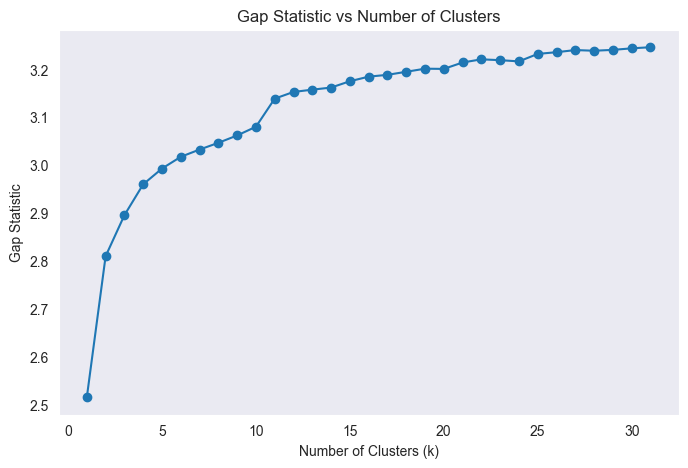

In [106]:
# Calculate Gap Statistic for Different k Values
k_max = 31  # Maximum number of clusters to evaluate
gap_values = compute_gap_statistic(X, k_max)

plt.figure(figsize=(8, 5))
plt.plot(range(1, k_max + 1), gap_values, marker='o')
plt.title('Gap Statistic vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.grid()
plt.show()

### 11 clusters selected where I see the leveling off / elbow and reduce the features by approx. 1/3rd

In [107]:
gap_table = pd.DataFrame({
    'k': range(1, k_max + 1),
    'Gap Statistic': gap_values
})

# Display the table
print(gap_table)

     k  Gap Statistic
0    1       2.515558
1    2       2.809922
2    3       2.895521
3    4       2.960018
4    5       2.992874
5    6       3.017407
6    7       3.032545
7    8       3.046613
8    9       3.061979
9   10       3.080155
10  11       3.138828
11  12       3.152816
12  13       3.157554
13  14       3.161978
14  15       3.175168
15  16       3.184732
16  17       3.188520
17  18       3.194906
18  19       3.201370
19  20       3.200900
20  21       3.214298
21  22       3.220884
22  23       3.219126
23  24       3.216590
24  25       3.232208
25  26       3.235788
26  27       3.240235
27  28       3.238816
28  29       3.240626
29  30       3.243846
30  31       3.246168


In [108]:
# perform k-means 
from sklearn.cluster import KMeans

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=11, random_state=42)  
kmeans.fit(diet_data_trim)

# Get cluster labels for each row
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame (or a copy)
clustered_df = diet_data_trim.copy()
clustered_df['Cluster'] = cluster_labels

# Optional: View how many points per cluster
print(clustered_df['Cluster'].value_counts())

Cluster
8     3942
3     3311
1     3196
7     2480
2     2054
5     1953
4     1514
0     1350
9      963
10     617
6      257
Name: count, dtype: int64


In [109]:
print(clustered_df.stb.freq(['Cluster']))

    Cluster  count    percent  cumulative_count  cumulative_percent
0         8   3942  18.218792              3942           18.218792
1         3   3311  15.302491              7253           33.521283
2         1   3196  14.770994             10449           48.292277
3         7   2480  11.461848             12929           59.754125
4         2   2054   9.492998             14983           69.247123
5         5   1953   9.026205             16936           78.273328
6         4   1514   6.997273             18450           85.270601
7         0   1350   6.239312             19800           91.509914
8         9    963   4.450709             20763           95.960623
9        10    617   2.851597             21380           98.812220
10        6    257   1.187780             21637          100.000000


### CLUSTER PROFILING

In [110]:
summary_stats = clustered_df.groupby('Cluster')[['KCAL_avg', 'TPROT_avg', 'TFIBE_avg']].agg(['mean', 'std'])
sorted_KCAL = summary_stats.sort_values(by=('KCAL_avg', 'mean'), ascending=False)
print(sorted_KCAL)

         KCAL_avg           TPROT_avg           TFIBE_avg          
             mean       std      mean       std      mean       std
Cluster                                                            
10       0.637880  0.095243  0.352753  0.072921  0.261975  0.101745
4        0.503472  0.067843  0.286233  0.059384  0.187717  0.063003
2        0.387780  0.055756  0.227298  0.046499  0.145789  0.047920
0        0.335651  0.073984  0.228761  0.059777  0.248279  0.082140
5        0.302477  0.068930  0.197028  0.046572  0.149582  0.057239
3        0.274414  0.046193  0.181716  0.040129  0.127019  0.046962
6        0.242915  0.133373  0.175529  0.072087  0.132082  0.071309
9        0.219312  0.074103  0.175451  0.048190  0.139776  0.056041
8        0.181263  0.038784  0.148913  0.034158  0.130605  0.052472
7        0.140611  0.056685  0.130421  0.036664  0.108969  0.050183
1        0.099976  0.039690  0.108496  0.028995  0.090313  0.038777


In [111]:
sorted_PROT = summary_stats.sort_values(by=('TPROT_avg', 'mean'), ascending=False)
print(sorted_PROT)

         KCAL_avg           TPROT_avg           TFIBE_avg          
             mean       std      mean       std      mean       std
Cluster                                                            
10       0.637880  0.095243  0.352753  0.072921  0.261975  0.101745
4        0.503472  0.067843  0.286233  0.059384  0.187717  0.063003
0        0.335651  0.073984  0.228761  0.059777  0.248279  0.082140
2        0.387780  0.055756  0.227298  0.046499  0.145789  0.047920
5        0.302477  0.068930  0.197028  0.046572  0.149582  0.057239
3        0.274414  0.046193  0.181716  0.040129  0.127019  0.046962
6        0.242915  0.133373  0.175529  0.072087  0.132082  0.071309
9        0.219312  0.074103  0.175451  0.048190  0.139776  0.056041
8        0.181263  0.038784  0.148913  0.034158  0.130605  0.052472
7        0.140611  0.056685  0.130421  0.036664  0.108969  0.050183
1        0.099976  0.039690  0.108496  0.028995  0.090313  0.038777


In [112]:
sorted_FIBE = summary_stats.sort_values(by=('TFIBE_avg', 'mean'), ascending=False)
print(sorted_FIBE)

         KCAL_avg           TPROT_avg           TFIBE_avg          
             mean       std      mean       std      mean       std
Cluster                                                            
10       0.637880  0.095243  0.352753  0.072921  0.261975  0.101745
0        0.335651  0.073984  0.228761  0.059777  0.248279  0.082140
4        0.503472  0.067843  0.286233  0.059384  0.187717  0.063003
5        0.302477  0.068930  0.197028  0.046572  0.149582  0.057239
2        0.387780  0.055756  0.227298  0.046499  0.145789  0.047920
9        0.219312  0.074103  0.175451  0.048190  0.139776  0.056041
6        0.242915  0.133373  0.175529  0.072087  0.132082  0.071309
8        0.181263  0.038784  0.148913  0.034158  0.130605  0.052472
3        0.274414  0.046193  0.181716  0.040129  0.127019  0.046962
7        0.140611  0.056685  0.130421  0.036664  0.108969  0.050183
1        0.099976  0.039690  0.108496  0.028995  0.090313  0.038777


In [113]:
# re-add SEQN
clustered_df.insert(0, 'SEQN', SEQN.values)

In [114]:
print(clustered_df.dtypes)
print(clustered_df.shape)

SEQN         float64
DRD360       float64
DRQSPREP     float64
DR1_320Z     float64
KCAL_avg     float64
TALCO_avg    float64
TCALC_avg    float64
TCAFF_avg    float64
TCHOL_avg    float64
TCOPP_avg    float64
TIRON_avg    float64
TFIBE_avg    float64
TFOLA_avg    float64
TPOTA_avg    float64
TMFAT_avg    float64
TMAGN_avg    float64
TSODI_avg    float64
TNIAC_avg    float64
TPFAT_avg    float64
TPROT_avg    float64
TSFAT_avg    float64
TSUGR_avg    float64
TTHEO_avg    float64
TVARA_avg    float64
TVB1_avg     float64
TVB12_avg    float64
TVB2_avg     float64
TVB6_avg     float64
TVC_avg      float64
TATOC_avg    float64
TVK_avg      float64
TZINC_avg    float64
Cluster        int32
dtype: object
(21637, 33)


### cluster 10, 4, 0/2 have higher kcal, protein, and fiber, while clusters 1, 7, 8 are all lower in these categories

In [115]:
# export cluster var & averaged dietary variables to describe later if desired 
clustered_df.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/Diet_data_w_k_mean.csv")

In [117]:
# select out cluster var & SEQN
clustered_df_trim = clustered_df[['SEQN', 'Cluster']]

In [128]:
print(normalized_df.shape)
print(clustered_df_trim.shape)

(21637, 97)
(21637, 2)


In [134]:
unique_ids = normalized_df['SEQN'].nunique()
print(unique_ids)

19454


In [135]:
unique_ids = clustered_df_trim['SEQN'].nunique()
print(unique_ids)

19454


### duplicates by SEQN will need to be dropped

In [129]:
# re-merge with normalized dataframe with other columns of interest (normalized_df)
master_clean_analysis = pd.merge(normalized_df, clustered_df_trim, on='SEQN', how='left')
print(master_clean_analysis.head())
print(master_clean_analysis.shape)
print(master_clean_analysis.dtypes)

   DR1TKCAL  DR2TKCAL  DR1TALCO  DR2TALCO  DR1TCALC  DR2TCALC  DR1TCAFF  \
0  0.927262  0.334362  0.018938  0.000000  0.177671  0.105506  0.094933   
1  0.264519  0.134207  0.056645  0.037523  0.113857  0.100680  0.078820   
2  0.411152  0.395102  0.085222  0.062426  0.048076  0.030599  0.083479   
3  0.265483  0.305052  0.000000  0.000000  0.042543  0.092564  0.006407   
4  0.265483  0.305052  0.000000  0.000000  0.042543  0.092564  0.006407   

   DR2TCAFF  DR1TCHOL  DR2TCHOL  ...  educ_cat_3.0  educ_cat_4.0  DIQ010_1.0  \
0  0.016430  0.269800  0.115228  ...           0.0           0.0         0.0   
1  0.099871  0.069578  0.038215  ...           1.0           0.0         0.0   
2  0.080219  0.273131  0.156068  ...           0.0           0.0         0.0   
3  0.013853  0.102147  0.068553  ...           0.0           0.0         0.0   
4  0.013853  0.102147  0.068553  ...           0.0           0.0         0.0   

   alcohol_2.0  alcohol_3.0  smoke_2.0  smoke_3.0      eGFR     SEQN

In [136]:
## DROP DUPLICATES BY SEQN
master_clean_analysis = master_clean_analysis.drop_duplicates(subset='SEQN')

In [137]:
print(master_clean_analysis.shape)

(19454, 98)


In [138]:
master_clean_analysis.isna().sum()

DR1TKCAL     0
DR2TKCAL     0
DR1TALCO     0
DR2TALCO     0
DR1TCALC     0
            ..
smoke_2.0    0
smoke_3.0    0
eGFR         0
SEQN         0
Cluster      0
Length: 98, dtype: int64

In [139]:
# drop nutrition variables that are not the cluster variable and MCQ, CVD variables not initially dropped  
master_clean_analysis_trim = master_clean_analysis.drop(['DR1TKCAL', 'DR2TKCAL', 'DR1TALCO', 'DR2TALCO', 'DR1TCALC', 'DR2TCALC', 'DR1TCAFF', 'DR2TCAFF', 'DR1TCHOL', 'DR2TCHOL', 'DR1TCOPP', 'DR2TCOPP', 'DR1TIRON', 'DR2TIRON', 'DR1TFIBE', 'DR2TFIBE', 'DR1TFOLA', 'DR2TFOLA', 'DR1TPOTA', 'DR2TPOTA', 'DR1TMFAT', 'DR2TMFAT', 'DR1TMAGN', 'DR2TMAGN', 'DR1TSODI', 'DR2TSODI', 'DR1TNIAC', 'DR2TNIAC', 'DR1TPFAT', 'DR2TPFAT', 'DR1TPROT', 'DR2TPROT', 'DR1TSFAT', 'DR2TSFAT', 'DR1TTHEO', 'DR2TTHEO', 'DR1TVARA', 'DR2TVARA', 'DR1TVB1', 'DR2TVB1', 'DR1TVB12', 'DR2TVB12', 'DR1TVB2', 'DR2TVB2', 'DR1TVB6', 'DR2TVB6', 'DR1TVC', 'DR2TVC', 'DR1TATOC', 'DR2TATOC', 'DR1TVK', 'DR2TVK', 'DR1TZINC', 'DR2TZINC', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'CVD', 'DR1TSUGR', 'DR2TSUGR'], axis=1)

In [140]:
print(master_clean_analysis_trim.head())
print(master_clean_analysis_trim.shape)
print(master_clean_analysis_trim.dtypes)

   DRD360  DRQSPREP  DR1_320Z  RIDAGEYR    BMXBMI  BMXWAIST    BPXSY1  \
0   0.000     0.375  0.074943  0.538462  0.260402  0.512632  0.284314   
1   0.000     0.250  0.088170  0.492308  0.176462  0.292584  0.303922   
2   0.125     0.375  0.000000  0.661538  0.090777  0.148329  0.294118   
3   0.000     0.375  0.203782  0.261538  0.086994  0.181744  0.186275   
5   0.000     0.375  0.282143  0.200000  0.046698  0.077425  0.450980   

     BPXDI1    LBXSCA   LBXSKSI  ...  educ_cat_3.0  educ_cat_4.0  DIQ010_1.0  \
0  0.656716  0.291139  0.346939  ...           0.0           0.0         0.0   
1  0.641791  0.405063  0.326531  ...           1.0           0.0         0.0   
2  0.477612  0.341772  0.306122  ...           0.0           0.0         0.0   
3  0.522388  0.278481  0.306122  ...           0.0           0.0         0.0   
5  0.597015  0.367089  0.163265  ...           0.0           0.0         0.0   

   alcohol_2.0  alcohol_3.0  smoke_2.0  smoke_3.0      eGFR     SEQN  Cluster  


In [141]:
master_clean_analysis_trim.isna().sum()

DRD360          0
DRQSPREP        0
DR1_320Z        0
RIDAGEYR        0
BMXBMI          0
BMXWAIST        0
BPXSY1          0
BPXDI1          0
LBXSCA          0
LBXSKSI         0
LBXSLDSI        0
LBXSPH          0
LBXSNASI        0
LBXSUA          0
LBXSIR          0
LBXSCR          0
LBXGH           0
LBXHGB          0
LBXTC           0
LBDHDD          0
CVD_DEATH       0
RIAGENDR_1.0    0
race_cat_2.0    0
race_cat_3.0    0
HIQ011_1.0      0
educ_cat_2.0    0
educ_cat_3.0    0
educ_cat_4.0    0
DIQ010_1.0      0
alcohol_2.0     0
alcohol_3.0     0
smoke_2.0       0
smoke_3.0       0
eGFR            0
SEQN            0
Cluster         0
dtype: int64

In [142]:
# export final normalized dataframe w/ cluster var prior to SMOTE 
master_clean_analysis_trim.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_final_w_k_cluster.csv")

#### IMPORT FINAL DATASET FOR SMOTE 

In [145]:
master_clean_analysis_trim = pd.read_csv('C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_final_w_k_cluster.csv')
#drop unnamed column
final_df = master_clean_analysis_trim.drop(master_clean_analysis_trim.columns[0], axis=1)
print(final_df.head())
print(final_df.shape)
print(final_df.dtypes)

   DRD360  DRQSPREP  DR1_320Z  RIDAGEYR    BMXBMI  BMXWAIST    BPXSY1  \
0   0.000     0.375  0.074943  0.538462  0.260402  0.512632  0.284314   
1   0.000     0.250  0.088170  0.492308  0.176462  0.292584  0.303922   
2   0.125     0.375  0.000000  0.661538  0.090777  0.148329  0.294118   
3   0.000     0.375  0.203782  0.261538  0.086994  0.181744  0.186275   
4   0.000     0.375  0.282143  0.200000  0.046698  0.077425  0.450980   

     BPXDI1    LBXSCA   LBXSKSI  ...  educ_cat_3.0  educ_cat_4.0  DIQ010_1.0  \
0  0.656716  0.291139  0.346939  ...           0.0           0.0         0.0   
1  0.641791  0.405063  0.326531  ...           1.0           0.0         0.0   
2  0.477612  0.341772  0.306122  ...           0.0           0.0         0.0   
3  0.522388  0.278481  0.306122  ...           0.0           0.0         0.0   
4  0.597015  0.367089  0.163265  ...           0.0           0.0         0.0   

   alcohol_2.0  alcohol_3.0  smoke_2.0  smoke_3.0      eGFR     SEQN  Cluster  


In [146]:
final_df.isna().sum()

DRD360          0
DRQSPREP        0
DR1_320Z        0
RIDAGEYR        0
BMXBMI          0
BMXWAIST        0
BPXSY1          0
BPXDI1          0
LBXSCA          0
LBXSKSI         0
LBXSLDSI        0
LBXSPH          0
LBXSNASI        0
LBXSUA          0
LBXSIR          0
LBXSCR          0
LBXGH           0
LBXHGB          0
LBXTC           0
LBDHDD          0
CVD_DEATH       0
RIAGENDR_1.0    0
race_cat_2.0    0
race_cat_3.0    0
HIQ011_1.0      0
educ_cat_2.0    0
educ_cat_3.0    0
educ_cat_4.0    0
DIQ010_1.0      0
alcohol_2.0     0
alcohol_3.0     0
smoke_2.0       0
smoke_3.0       0
eGFR            0
SEQN            0
Cluster         0
dtype: int64

In [151]:
print(final_df.stb.freq(['CVD_DEATH']))

   CVD_DEATH  count    percent  cumulative_count  cumulative_percent
0        0.0  18876  97.028889             18876           97.028889
1        1.0    578   2.971111             19454          100.000000


In [150]:
## perform SMOTE on normalized dataframe w/ cluster var 
# resource: https://www.geeksforgeeks.org/imbalanced-learn-module-in-python/
from imblearn.over_sampling import SMOTE 
  
# Define X and y from your real dataset (final_df)
X = final_df.drop(columns=['CVD_DEATH'])  # Drop target to get features
y = final_df['CVD_DEATH']                 # Target column

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Re-merge X_smote and y_smote into one DataFrame
X_smote_df = pd.DataFrame(X_smote, columns=X.columns)         # Use real feature names
y_smote_df = pd.DataFrame(y_smote, columns=['CVD_DEATH'])     # Keep target name

# Concatenate to form the balanced DataFrame
smote_df = pd.concat([X_smote_df, y_smote_df], axis=1)

print(smote_df.head())
print(smote_df.dtypes)
print(smote_df.shape)

   DRD360  DRQSPREP  DR1_320Z  RIDAGEYR    BMXBMI  BMXWAIST    BPXSY1  \
0   0.000     0.375  0.074943  0.538462  0.260402  0.512632  0.284314   
1   0.000     0.250  0.088170  0.492308  0.176462  0.292584  0.303922   
2   0.125     0.375  0.000000  0.661538  0.090777  0.148329  0.294118   
3   0.000     0.375  0.203782  0.261538  0.086994  0.181744  0.186275   
4   0.000     0.375  0.282143  0.200000  0.046698  0.077425  0.450980   

     BPXDI1    LBXSCA   LBXSKSI  ...  educ_cat_4.0  DIQ010_1.0  alcohol_2.0  \
0  0.656716  0.291139  0.346939  ...           0.0         0.0          0.0   
1  0.641791  0.405063  0.326531  ...           0.0         0.0          0.0   
2  0.477612  0.341772  0.306122  ...           0.0         0.0          0.0   
3  0.522388  0.278481  0.306122  ...           0.0         0.0          0.0   
4  0.597015  0.367089  0.163265  ...           0.0         0.0          0.0   

   alcohol_3.0  smoke_2.0  smoke_3.0      eGFR     SEQN  Cluster  CVD_DEATH  
0       

In [153]:
print(smote_df.stb.freq(['CVD_DEATH']))

   CVD_DEATH  count  percent  cumulative_count  cumulative_percent
0        1.0  18876     50.0             18876                50.0
1        0.0  18876     50.0             37752               100.0


In [152]:
print(smote_df.isna().sum())

DRD360          0
DRQSPREP        0
DR1_320Z        0
RIDAGEYR        0
BMXBMI          0
BMXWAIST        0
BPXSY1          0
BPXDI1          0
LBXSCA          0
LBXSKSI         0
LBXSLDSI        0
LBXSPH          0
LBXSNASI        0
LBXSUA          0
LBXSIR          0
LBXSCR          0
LBXGH           0
LBXHGB          0
LBXTC           0
LBDHDD          0
RIAGENDR_1.0    0
race_cat_2.0    0
race_cat_3.0    0
HIQ011_1.0      0
educ_cat_2.0    0
educ_cat_3.0    0
educ_cat_4.0    0
DIQ010_1.0      0
alcohol_2.0     0
alcohol_3.0     0
smoke_2.0       0
smoke_3.0       0
eGFR            0
SEQN            0
Cluster         0
CVD_DEATH       0
dtype: int64


In [154]:
# export SMOTE df 
smote_df.to_csv("C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_final_w_k_cluster_smote.csv")

### IMPORT FINAL DATASETS FOR ANALYSIS

In [155]:
#### re-import final dfs for analysis 
final_df = pd.read_csv('C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_final_w_k_cluster.csv')
#drop unnamed column
final_df = final_df.drop(final_df.columns[0], axis=1)
print(final_df.head())
print(final_df.shape)
print(final_df.dtypes)

   DRD360  DRQSPREP  DR1_320Z  RIDAGEYR    BMXBMI  BMXWAIST    BPXSY1  \
0   0.000     0.375  0.074943  0.538462  0.260402  0.512632  0.284314   
1   0.000     0.250  0.088170  0.492308  0.176462  0.292584  0.303922   
2   0.125     0.375  0.000000  0.661538  0.090777  0.148329  0.294118   
3   0.000     0.375  0.203782  0.261538  0.086994  0.181744  0.186275   
4   0.000     0.375  0.282143  0.200000  0.046698  0.077425  0.450980   

     BPXDI1    LBXSCA   LBXSKSI  ...  educ_cat_3.0  educ_cat_4.0  DIQ010_1.0  \
0  0.656716  0.291139  0.346939  ...           0.0           0.0         0.0   
1  0.641791  0.405063  0.326531  ...           1.0           0.0         0.0   
2  0.477612  0.341772  0.306122  ...           0.0           0.0         0.0   
3  0.522388  0.278481  0.306122  ...           0.0           0.0         0.0   
4  0.597015  0.367089  0.163265  ...           0.0           0.0         0.0   

   alcohol_2.0  alcohol_3.0  smoke_2.0  smoke_3.0      eGFR     SEQN  Cluster  


In [157]:
print(final_df.isna().sum())

DRD360          0
DRQSPREP        0
DR1_320Z        0
RIDAGEYR        0
BMXBMI          0
BMXWAIST        0
BPXSY1          0
BPXDI1          0
LBXSCA          0
LBXSKSI         0
LBXSLDSI        0
LBXSPH          0
LBXSNASI        0
LBXSUA          0
LBXSIR          0
LBXSCR          0
LBXGH           0
LBXHGB          0
LBXTC           0
LBDHDD          0
CVD_DEATH       0
RIAGENDR_1.0    0
race_cat_2.0    0
race_cat_3.0    0
HIQ011_1.0      0
educ_cat_2.0    0
educ_cat_3.0    0
educ_cat_4.0    0
DIQ010_1.0      0
alcohol_2.0     0
alcohol_3.0     0
smoke_2.0       0
smoke_3.0       0
eGFR            0
SEQN            0
Cluster         0
dtype: int64


In [163]:
print(final_df.stb.freq(['CVD_DEATH']))

   CVD_DEATH  count    percent  cumulative_count  cumulative_percent
0        0.0  18876  97.028889             18876           97.028889
1        1.0    578   2.971111             19454          100.000000


In [160]:
smote_df = pd.read_csv('C:/Users/nickd/OneDrive - Oklahoma A and M System/Predictive Business Analytics/Final Project/FinalNHANES_w_NDI_Data_final_w_k_cluster_smote.csv')
#drop unnamed column
smote_df = smote_df.drop(smote_df.columns[0], axis=1)
print(smote_df.head())
print(smote_df.shape)
print(smote_df.dtypes)

   DRD360  DRQSPREP  DR1_320Z  RIDAGEYR    BMXBMI  BMXWAIST    BPXSY1  \
0   0.000     0.375  0.074943  0.538462  0.260402  0.512632  0.284314   
1   0.000     0.250  0.088170  0.492308  0.176462  0.292584  0.303922   
2   0.125     0.375  0.000000  0.661538  0.090777  0.148329  0.294118   
3   0.000     0.375  0.203782  0.261538  0.086994  0.181744  0.186275   
4   0.000     0.375  0.282143  0.200000  0.046698  0.077425  0.450980   

     BPXDI1    LBXSCA   LBXSKSI  ...  educ_cat_4.0  DIQ010_1.0  alcohol_2.0  \
0  0.656716  0.291139  0.346939  ...           0.0         0.0          0.0   
1  0.641791  0.405063  0.326531  ...           0.0         0.0          0.0   
2  0.477612  0.341772  0.306122  ...           0.0         0.0          0.0   
3  0.522388  0.278481  0.306122  ...           0.0         0.0          0.0   
4  0.597015  0.367089  0.163265  ...           0.0         0.0          0.0   

   alcohol_3.0  smoke_2.0  smoke_3.0      eGFR     SEQN  Cluster  CVD_DEATH  
0       

In [252]:
print(smote_df.isna().sum())

DRD360          0
DRQSPREP        0
DR1_320Z        0
RIDAGEYR        0
BMXBMI          0
BMXWAIST        0
BPXSY1          0
BPXDI1          0
LBXSCA          0
LBXSKSI         0
LBXSLDSI        0
LBXSPH          0
LBXSNASI        0
LBXSUA          0
LBXSIR          0
LBXSCR          0
LBXGH           0
LBXHGB          0
LBXTC           0
LBDHDD          0
RIAGENDR_1.0    0
race_cat_2.0    0
race_cat_3.0    0
HIQ011_1.0      0
educ_cat_2.0    0
educ_cat_3.0    0
educ_cat_4.0    0
DIQ010_1.0      0
alcohol_2.0     0
alcohol_3.0     0
smoke_2.0       0
smoke_3.0       0
eGFR            0
SEQN            0
CVD_DEATH       0
Cluster_1       0
Cluster_2       0
Cluster_3       0
Cluster_4       0
Cluster_5       0
Cluster_6       0
Cluster_7       0
Cluster_8       0
Cluster_9       0
Cluster_10      0
dtype: int64


In [162]:
print(smote_df.stb.freq(['CVD_DEATH']))

   CVD_DEATH  count  percent  cumulative_count  cumulative_percent
0        1.0  18876     50.0             18876                50.0
1        0.0  18876     50.0             37752               100.0


In [250]:
# create dummy variables for cluster var for both datasets
smote_df = pd.get_dummies(smote_df, columns=['Cluster'], prefix='Cluster', drop_first=True)

KeyError: "None of [Index(['Cluster'], dtype='object')] are in the [columns]"

In [253]:
final_df = pd.get_dummies(final_df, columns=['Cluster'], prefix='Cluster', drop_first=True)
print(final_df.isna().sum())

DRD360          0
DRQSPREP        0
DR1_320Z        0
RIDAGEYR        0
BMXBMI          0
BMXWAIST        0
BPXSY1          0
BPXDI1          0
LBXSCA          0
LBXSKSI         0
LBXSLDSI        0
LBXSPH          0
LBXSNASI        0
LBXSUA          0
LBXSIR          0
LBXSCR          0
LBXGH           0
LBXHGB          0
LBXTC           0
LBDHDD          0
CVD_DEATH       0
RIAGENDR_1.0    0
race_cat_2.0    0
race_cat_3.0    0
HIQ011_1.0      0
educ_cat_2.0    0
educ_cat_3.0    0
educ_cat_4.0    0
DIQ010_1.0      0
alcohol_2.0     0
alcohol_3.0     0
smoke_2.0       0
smoke_3.0       0
eGFR            0
SEQN            0
Cluster_1       0
Cluster_2       0
Cluster_3       0
Cluster_4       0
Cluster_5       0
Cluster_6       0
Cluster_7       0
Cluster_8       0
Cluster_9       0
Cluster_10      0
dtype: int64


In [268]:
print(smote_df.dtypes)

DRD360          float64
DRQSPREP        float64
DR1_320Z        float64
RIDAGEYR        float64
BMXBMI          float64
BMXWAIST        float64
BPXSY1          float64
BPXDI1          float64
LBXSCA          float64
LBXSKSI         float64
LBXSLDSI        float64
LBXSPH          float64
LBXSNASI        float64
LBXSUA          float64
LBXSIR          float64
LBXSCR          float64
LBXGH           float64
LBXHGB          float64
LBXTC           float64
LBDHDD          float64
RIAGENDR_1.0    float64
race_cat_2.0    float64
race_cat_3.0    float64
HIQ011_1.0      float64
educ_cat_2.0    float64
educ_cat_3.0    float64
educ_cat_4.0    float64
DIQ010_1.0      float64
alcohol_2.0     float64
alcohol_3.0     float64
smoke_2.0       float64
smoke_3.0       float64
eGFR            float64
SEQN            float64
CVD_DEATH       float64
Cluster_1       float64
Cluster_2       float64
Cluster_3       float64
Cluster_4       float64
Cluster_5       float64
Cluster_6       float64
Cluster_7       

In [269]:
print(final_df.dtypes)

DRD360          float64
DRQSPREP        float64
DR1_320Z        float64
RIDAGEYR        float64
BMXBMI          float64
BMXWAIST        float64
BPXSY1          float64
BPXDI1          float64
LBXSCA          float64
LBXSKSI         float64
LBXSLDSI        float64
LBXSPH          float64
LBXSNASI        float64
LBXSUA          float64
LBXSIR          float64
LBXSCR          float64
LBXGH           float64
LBXHGB          float64
LBXTC           float64
LBDHDD          float64
CVD_DEATH       float64
RIAGENDR_1.0    float64
race_cat_2.0    float64
race_cat_3.0    float64
HIQ011_1.0      float64
educ_cat_2.0    float64
educ_cat_3.0    float64
educ_cat_4.0    float64
DIQ010_1.0      float64
alcohol_2.0     float64
alcohol_3.0     float64
smoke_2.0       float64
smoke_3.0       float64
eGFR            float64
SEQN            float64
Cluster_1       float64
Cluster_2       float64
Cluster_3       float64
Cluster_4       float64
Cluster_5       float64
Cluster_6       float64
Cluster_7       

In [266]:
bool_cols = smote_df.select_dtypes(include='bool').columns
smote_df[bool_cols] = smote_df[bool_cols].astype(float)

In [267]:
bool_cols = final_df.select_dtypes(include='bool').columns
final_df[bool_cols] = final_df[bool_cols].astype(float)

### SPLITTING FOR MODELING

In [271]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = final_df.drop(columns=['CVD_DEATH', 'SEQN'])  # All features
y = final_df['CVD_DEATH']                # Target
X_smote = smote_df.drop(columns=['CVD_DEATH', 'SEQN'])  # All features
y_smote = smote_df['CVD_DEATH']                # Target
# splitting train & test 
# final_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# smote_df
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [334]:
### run full model w/ statsmodels to see which factors are significant at p < 0.10 
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
# Define and fit model
log_mod = sm.Logit(y_train, X_train_const).fit()
# Summary of results
print(log_mod.summary())

odds_ratios = pd.DataFrame(
    {
        "OR": np.exp(log_mod.params),
        "Lower CI": log_mod.conf_int()[0],
        "Upper CI": log_mod.conf_int()[1],
    }
)
print("Odds Ratios w/ 95% CI:\n")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.105329
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15519
Method:                           MLE   Df Model:                           43
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2223
Time:                        14:15:43   Log-Likelihood:                -1639.2
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.700e-168
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2308      1.286     -5.625      0.000      -9.750      -4.711
DRD360           0.444

In [337]:
## reduce model by manual backward selection until all p < 0.10
# drop LBXTC
X_train_dropped = X_train_const.drop(columns='LBXSKSI')
# repeat process above
# make sure to drop columns for X_test when final model is done 

In [338]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105329
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15520
Method:                           MLE   Df Model:                           42
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2223
Time:                        14:16:34   Log-Likelihood:                -1639.2
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                3.573e-169
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2335      1.272     -5.686      0.000      -9.727      -4.740
DRD360           0.444

In [339]:
X_train_dropped = X_train_dropped.drop(columns='BMXBMI')

In [340]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105329
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15521
Method:                           MLE   Df Model:                           41
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2223
Time:                        14:16:56   Log-Likelihood:                -1639.2
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                7.479e-170
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2400      1.271     -5.696      0.000      -9.731      -4.749
DRD360           0.446

In [341]:
X_train_dropped = X_train_dropped.drop(columns='LBXSCR')

In [342]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105329
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15522
Method:                           MLE   Df Model:                           40
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2223
Time:                        14:17:18   Log-Likelihood:                -1639.2
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.543e-170
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2861      1.200     -6.071      0.000      -9.638      -4.934
DRD360           0.4459

In [343]:
X_train_dropped = X_train_dropped.drop(columns='LBXSPH')

In [344]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105331
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15523
Method:                           MLE   Df Model:                           39
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2223
Time:                        14:17:44   Log-Likelihood:                -1639.3
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                3.198e-171
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3458      1.169     -6.283      0.000      -9.637      -5.054
DRD360           0.4439

In [345]:
X_train_dropped = X_train_dropped.drop(columns='LBDHDD')

In [346]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105334
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15524
Method:                           MLE   Df Model:                           38
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2223
Time:                        14:18:07   Log-Likelihood:                -1639.3
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                6.643e-172
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2930      1.154     -6.317      0.000      -9.556      -5.030
DRD360           0.4451

In [347]:
X_train_dropped = X_train_dropped.drop(columns='educ_cat_2.0')

In [348]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105337
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15525
Method:                           MLE   Df Model:                           37
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2222
Time:                        14:18:39   Log-Likelihood:                -1639.4
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.381e-172
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3068      1.154     -6.334      0.000      -9.568      -5.046
DRD360           0.4548

In [349]:
X_train_dropped = X_train_dropped.drop(columns='DRQSPREP')

In [350]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105342
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15526
Method:                           MLE   Df Model:                           36
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2222
Time:                        14:19:03   Log-Likelihood:                -1639.4
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                2.891e-173
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2169      1.130     -6.386      0.000      -9.432      -5.002
DRD360           0.4568

In [351]:
X_train_dropped = X_train_dropped.drop(columns='LBXGH')

In [352]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105348
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15527
Method:                           MLE   Df Model:                           35
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2222
Time:                        14:19:25   Log-Likelihood:                -1639.5
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                6.084e-174
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3585      1.084     -6.791      0.000      -9.482      -5.235
DRD360           0.4569

In [353]:
X_train_dropped = X_train_dropped.drop(columns='Cluster_10')

In [354]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105354
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15528
Method:                           MLE   Df Model:                           34
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2221
Time:                        14:19:46   Log-Likelihood:                -1639.6
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.259e-174
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2853      1.069     -6.813      0.000      -9.381      -5.189
DRD360           0.4588

In [355]:
X_train_dropped = X_train_dropped.drop(columns='LBXSIR')

In [356]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105363
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15529
Method:                           MLE   Df Model:                           33
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2220
Time:                        14:20:11   Log-Likelihood:                -1639.8
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                2.667e-175
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3071      1.069     -6.837      0.000      -9.402      -5.212
DRD360           0.4643

In [357]:
X_train_dropped = X_train_dropped.drop(columns='alcohol_3.0')

In [358]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105373
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15530
Method:                           MLE   Df Model:                           32
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2220
Time:                        14:20:37   Log-Likelihood:                -1639.9
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                5.670e-176
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2928      1.069     -6.825      0.000      -9.387      -5.198
DRD360           0.4718

In [359]:
X_train_dropped = X_train_dropped.drop(columns='DR1_320Z')

In [360]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105384
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15531
Method:                           MLE   Df Model:                           31
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2219
Time:                        14:21:02   Log-Likelihood:                -1640.1
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.211e-176
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3453      1.064     -6.902      0.000      -9.431      -5.259
DRD360           0.4890

In [361]:
X_train_dropped = X_train_dropped.drop(columns='DRD360')

In [362]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105397
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15532
Method:                           MLE   Df Model:                           30
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2218
Time:                        14:21:18   Log-Likelihood:                -1640.3
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                2.616e-177
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3041      1.063     -6.873      0.000      -9.387      -5.221
RIDAGEYR         4.6993

In [363]:
X_train_dropped = X_train_dropped.drop(columns='LBXSNASI')

In [364]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105413
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15533
Method:                           MLE   Df Model:                           29
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2217
Time:                        14:21:40   Log-Likelihood:                -1640.5
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                5.793e-178
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.8224      0.768    -10.184      0.000      -9.328      -6.317
RIDAGEYR         4.6979

In [365]:
X_train_dropped = X_train_dropped.drop(columns='alcohol_2.0')

In [366]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105429
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15534
Method:                           MLE   Df Model:                           28
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2216
Time:                        14:22:00   Log-Likelihood:                -1640.8
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.262e-178
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.7943      0.767    -10.161      0.000      -9.298      -6.291
RIDAGEYR         4.6982

In [367]:
X_train_dropped = X_train_dropped.drop(columns='LBXSUA')

In [368]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105447
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15535
Method:                           MLE   Df Model:                           27
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2214
Time:                        14:22:20   Log-Likelihood:                -1641.1
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                2.822e-179
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.6161      0.730    -10.436      0.000      -9.046      -6.186
RIDAGEYR         4.6591

In [369]:
X_train_dropped = X_train_dropped.drop(columns='race_cat_2.0')

In [370]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())


Optimization terminated successfully.
         Current function value: 0.105468
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15536
Method:                           MLE   Df Model:                           26
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2213
Time:                        14:22:39   Log-Likelihood:                -1641.4
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                6.410e-180
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.5124      0.718    -10.460      0.000      -8.920      -6.105
RIDAGEYR         4.6355

In [371]:
X_train_dropped = X_train_dropped.drop(columns='LBXSCA')

In [372]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105494
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15537
Method:                           MLE   Df Model:                           25
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2211
Time:                        14:22:59   Log-Likelihood:                -1641.8
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.530e-180
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.7651      0.661    -11.752      0.000      -9.060      -6.470
RIDAGEYR         4.6396

In [373]:
X_train_dropped = X_train_dropped.drop(columns='LBXTC')

In [374]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105518
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15538
Method:                           MLE   Df Model:                           24
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2209
Time:                        14:23:21   Log-Likelihood:                -1642.2
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                3.500e-181
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.6530      0.647    -11.828      0.000      -8.921      -6.385
RIDAGEYR         4.6387

In [375]:
X_train_dropped = X_train_dropped.drop(columns='Cluster_3')

In [376]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105545
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15539
Method:                           MLE   Df Model:                           23
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2207
Time:                        14:23:40   Log-Likelihood:                -1642.6
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                8.170e-182
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.4789      0.615    -12.154      0.000      -8.685      -6.273
RIDAGEYR         4.6420

In [377]:
X_train_dropped = X_train_dropped.drop(columns='Cluster_4')

In [378]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105574
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15540
Method:                           MLE   Df Model:                           22
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2205
Time:                        14:23:59   Log-Likelihood:                -1643.0
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.934e-182
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.4170      0.611    -12.134      0.000      -8.615      -6.219
RIDAGEYR         4.6190

In [379]:
X_train_dropped = X_train_dropped.drop(columns='Cluster_6')

In [380]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105596
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15541
Method:                           MLE   Df Model:                           21
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2203
Time:                        14:24:16   Log-Likelihood:                -1643.4
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                4.008e-183
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.4075      0.611    -12.127      0.000      -8.605      -6.210
RIDAGEYR         4.6399

In [381]:
X_train_dropped = X_train_dropped.drop(columns='Cluster_2')

In [382]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105620
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15542
Method:                           MLE   Df Model:                           20
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2201
Time:                        14:24:31   Log-Likelihood:                -1643.8
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                8.386e-184
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3448      0.606    -12.114      0.000      -8.533      -6.156
RIDAGEYR         4.6255

In [383]:
X_train_dropped = X_train_dropped.drop(columns='Cluster_9')

In [384]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105654
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15543
Method:                           MLE   Df Model:                           19
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2199
Time:                        14:24:50   Log-Likelihood:                -1644.3
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.997e-184
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3058      0.605    -12.081      0.000      -8.491      -6.121
RIDAGEYR         4.6113

In [385]:
X_train_dropped = X_train_dropped.drop(columns='Cluster_1')

In [386]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105688
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15544
Method:                           MLE   Df Model:                           18
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2196
Time:                        14:25:06   Log-Likelihood:                -1644.8
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                4.569e-185
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.2203      0.599    -12.063      0.000      -8.393      -6.047
RIDAGEYR         4.6472

In [387]:
X_train_dropped = X_train_dropped.drop(columns='LBXHGB')

In [388]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105725
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15545
Method:                           MLE   Df Model:                           17
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2194
Time:                        14:25:39   Log-Likelihood:                -1645.4
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                1.071e-185
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.9732      0.551    -12.653      0.000      -8.053      -5.893
RIDAGEYR         4.6436

In [389]:
X_train_dropped = X_train_dropped.drop(columns='Cluster_8')

In [390]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105772
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15546
Method:                           MLE   Df Model:                           16
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2190
Time:                        14:26:15   Log-Likelihood:                -1646.1
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                2.861e-186
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.9418      0.550    -12.618      0.000      -8.020      -5.863
RIDAGEYR         4.6667

In [391]:
X_train_dropped = X_train_dropped.drop(columns='DIQ010_1.0')

In [392]:
log_mod = sm.Logit(y_train, X_train_dropped).fit()
# Summary of results
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.105825
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                15563
Model:                          Logit   Df Residuals:                    15547
Method:                           MLE   Df Model:                           15
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.2186
Time:                        14:26:52   Log-Likelihood:                -1646.9
converged:                       True   LL-Null:                       -2107.8
Covariance Type:            nonrobust   LLR p-value:                8.043e-187
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.9261      0.550    -12.602      0.000      -8.003      -5.849
RIDAGEYR         4.6793

In [393]:
odds_ratios_smote = pd.DataFrame(
    {
        "OR": np.exp(log_mod.params),
        "Lower CI": log_mod.conf_int()[0],
        "Upper CI": log_mod.conf_int()[1],
    }
)
print("Odds Ratios w/ 95% CI:\n")
print(odds_ratios_smote)

Odds Ratios w/ 95% CI:

                      OR  Lower CI  Upper CI
const           0.000982 -8.003319 -5.848929
RIDAGEYR      107.697143  4.000428  5.358218
BMXWAIST        3.094255  0.314054  1.945040
BPXSY1         15.669912  1.801152  3.702333
BPXDI1          0.466491 -1.610321  0.085287
LBXSLDSI       27.899808  0.072219  6.585021
RIAGENDR_1.0    1.273016  0.036856  0.445922
race_cat_3.0    1.263924  0.025150  0.443293
HIQ011_1.0      1.595096  0.044747  0.889121
educ_cat_3.0    0.676484 -0.638139 -0.143553
educ_cat_4.0    0.749572 -0.549429 -0.027077
smoke_2.0       0.526089 -0.937573 -0.346996
smoke_3.0       0.530424 -0.914239 -0.353917
eGFR            0.310901 -2.182502 -0.154060
Cluster_5       1.364972  0.005781  0.616487
Cluster_7       1.297150  0.008079  0.512261


In [394]:
# only select final columns for X_test
X_test_selected = X_test[['RIDAGEYR', 'BMXWAIST', 'BPXSY1', 'BPXDI1', 'LBXSLDSI', 'RIAGENDR_1.0', 'race_cat_3.0', 'HIQ011_1.0', 'educ_cat_3.0', 'educ_cat_4.0', 'smoke_2.0', 'smoke_3.0', 'eGFR', 'Cluster_5', 'Cluster_7']]

In [395]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

X_test_const = sm.add_constant(X_test_selected)

# Predict probabilities
y_pred_probs = log_mod.predict(X_test_const)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs >= 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

Accuracy: 0.9722436391673092

Confusion Matrix:
 [[3783    0]
 [ 108    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      3783
         1.0       0.00      0.00      0.00       108

    accuracy                           0.97      3891
   macro avg       0.49      0.50      0.49      3891
weighted avg       0.95      0.97      0.96      3891

ROC AUC Score: 0.9053269500004895


C:\Users\nickd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nickd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nickd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

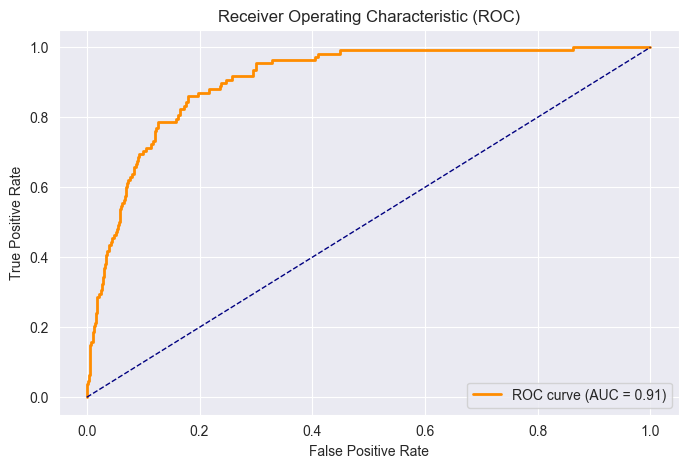

In [396]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [482]:
### run full model w/ decision tree regressor 
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
clf = DecisionTreeClassifier(random_state=12345)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_probs = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

Accuracy: 0.947828321768183

Confusion Matrix:
 [[3669  114]
 [  89   19]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3783
         1.0       0.14      0.18      0.16       108

    accuracy                           0.95      3891
   macro avg       0.56      0.57      0.57      3891
weighted avg       0.95      0.95      0.95      3891

ROC AUC Score: 0.5728955561429788


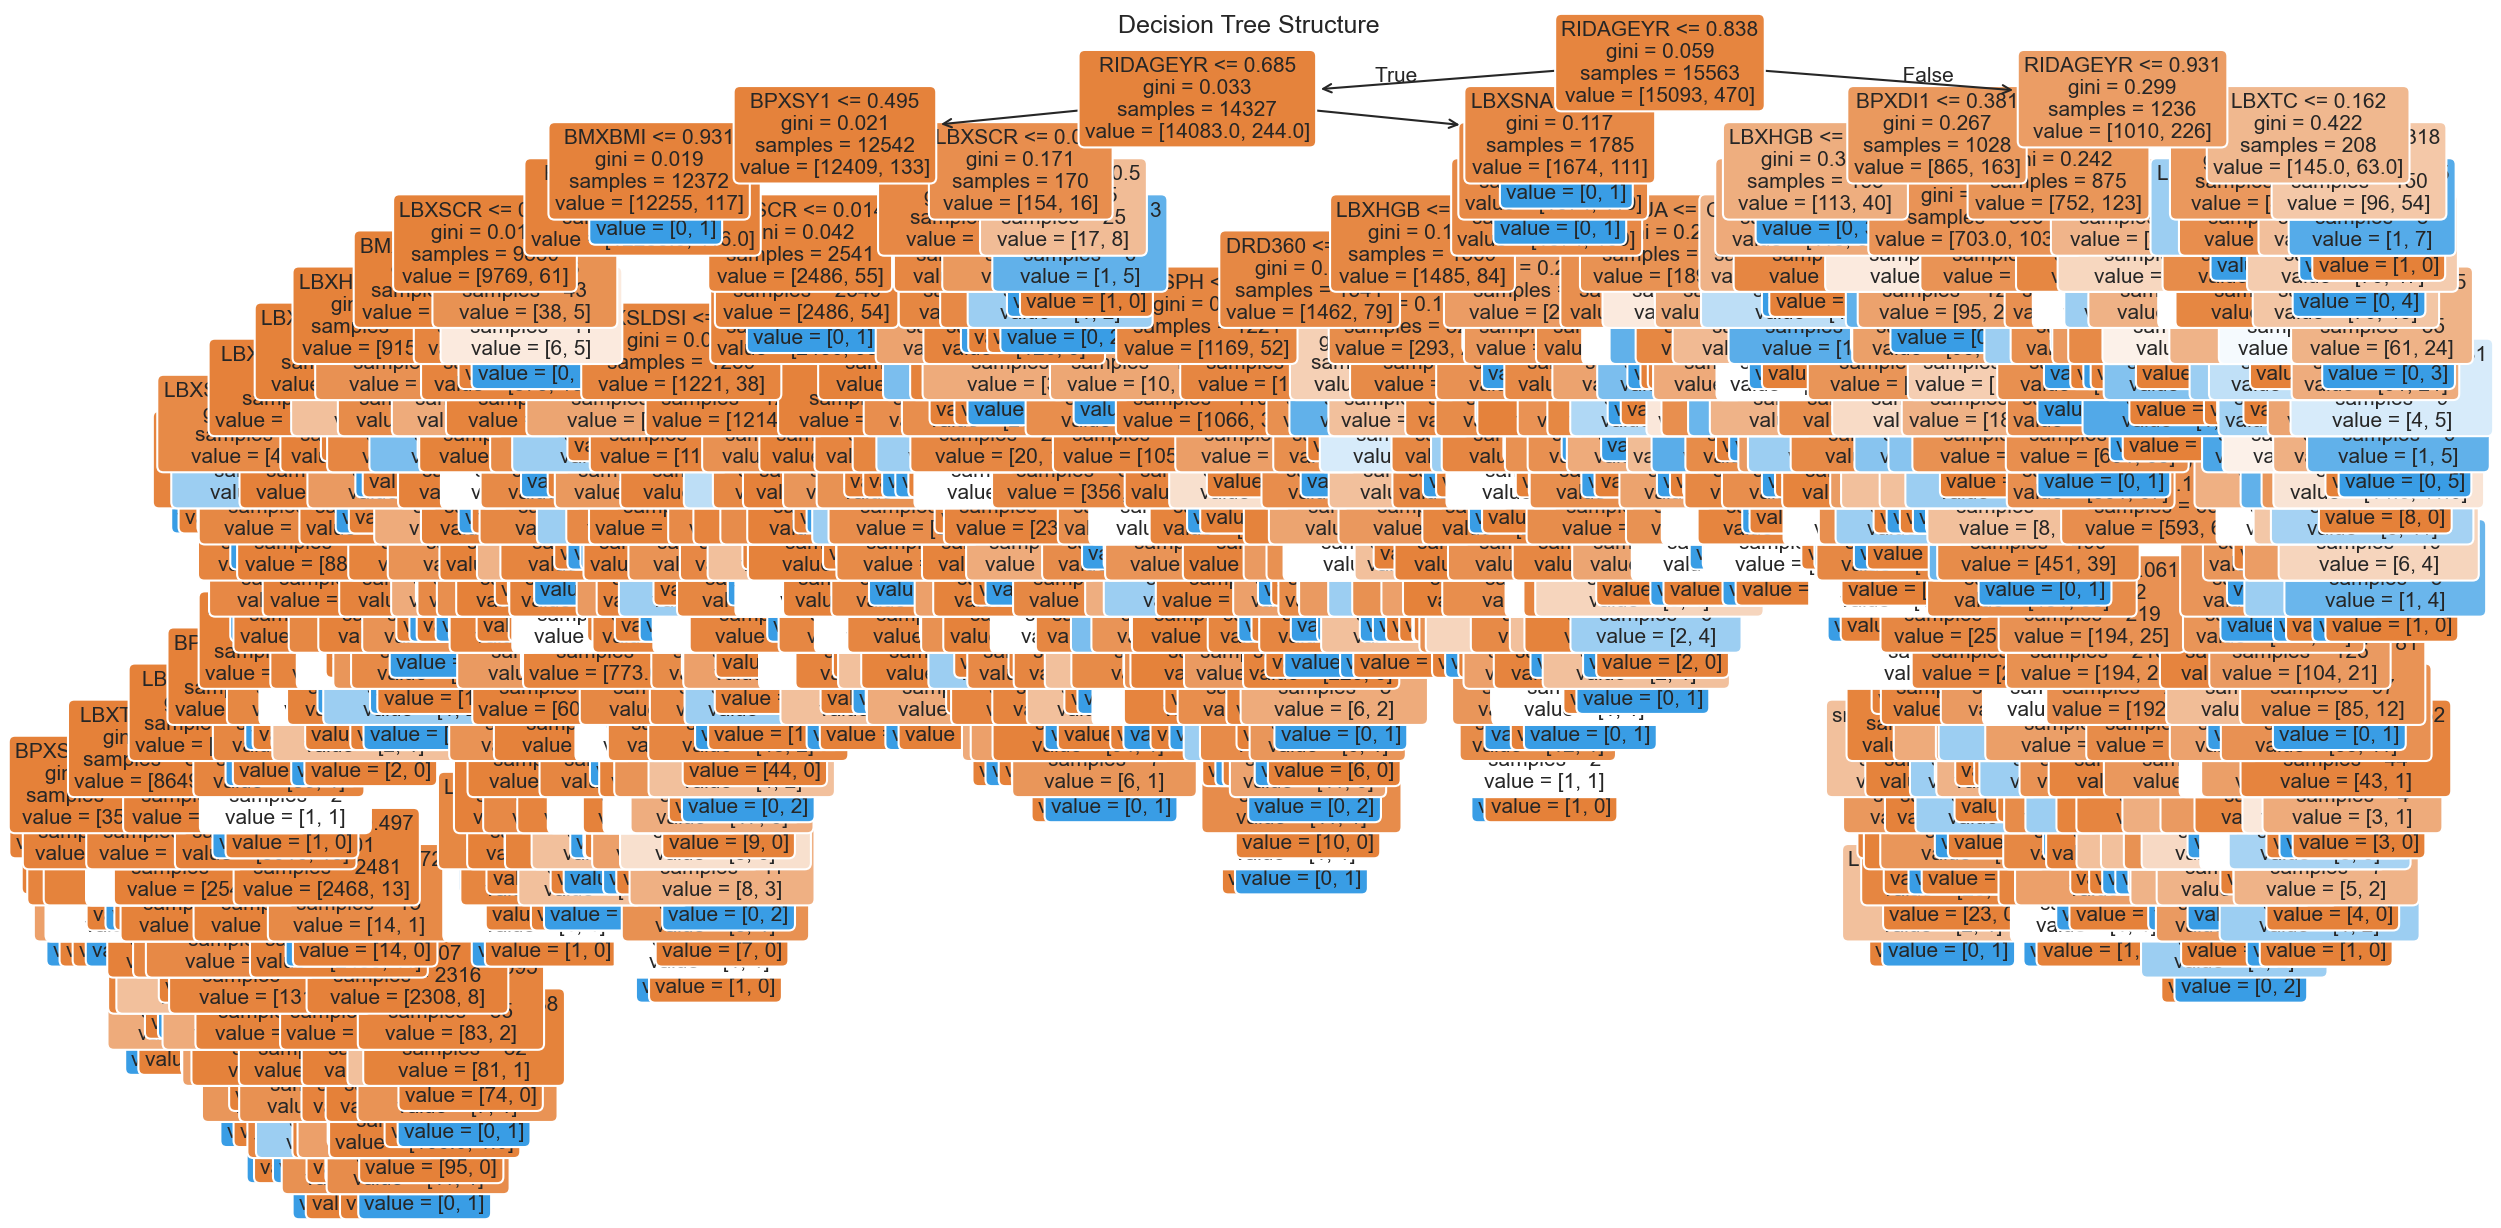

In [481]:
from sklearn.tree import plot_tree

# Visualizing decision tree
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(
    clf,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

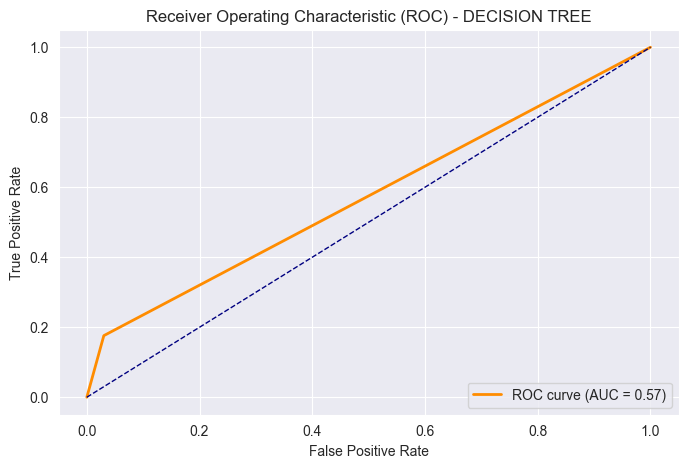

In [479]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - DECISION TREE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### MANUALLY PRUNE TREE

In [477]:
model_tree_prune = DecisionTreeClassifier(
    random_state=12345,  
    max_depth=10,        
    min_samples_split=50,  # Minimum samples required to split an internal node
    min_samples_leaf=20   # Minimum samples required to be at a leaf node
)

model_tree_prune.fit(X_train, y_train)
predictions_prune = model_tree_prune.predict(X_test)

In [478]:
print("Accuracy:", accuracy_score(y_test, predictions_prune))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions_prune))
print("\nClassification Report:\n", classification_report(y_test, predictions_prune))
print("ROC AUC Score:", roc_auc_score(y_test, predictions_prune))

Accuracy: 0.9712156258031355

Confusion Matrix:
 [[3778    5]
 [ 107    1]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      3783
         1.0       0.17      0.01      0.02       108

    accuracy                           0.97      3891
   macro avg       0.57      0.50      0.50      3891
weighted avg       0.95      0.97      0.96      3891

ROC AUC Score: 0.5039687784533146


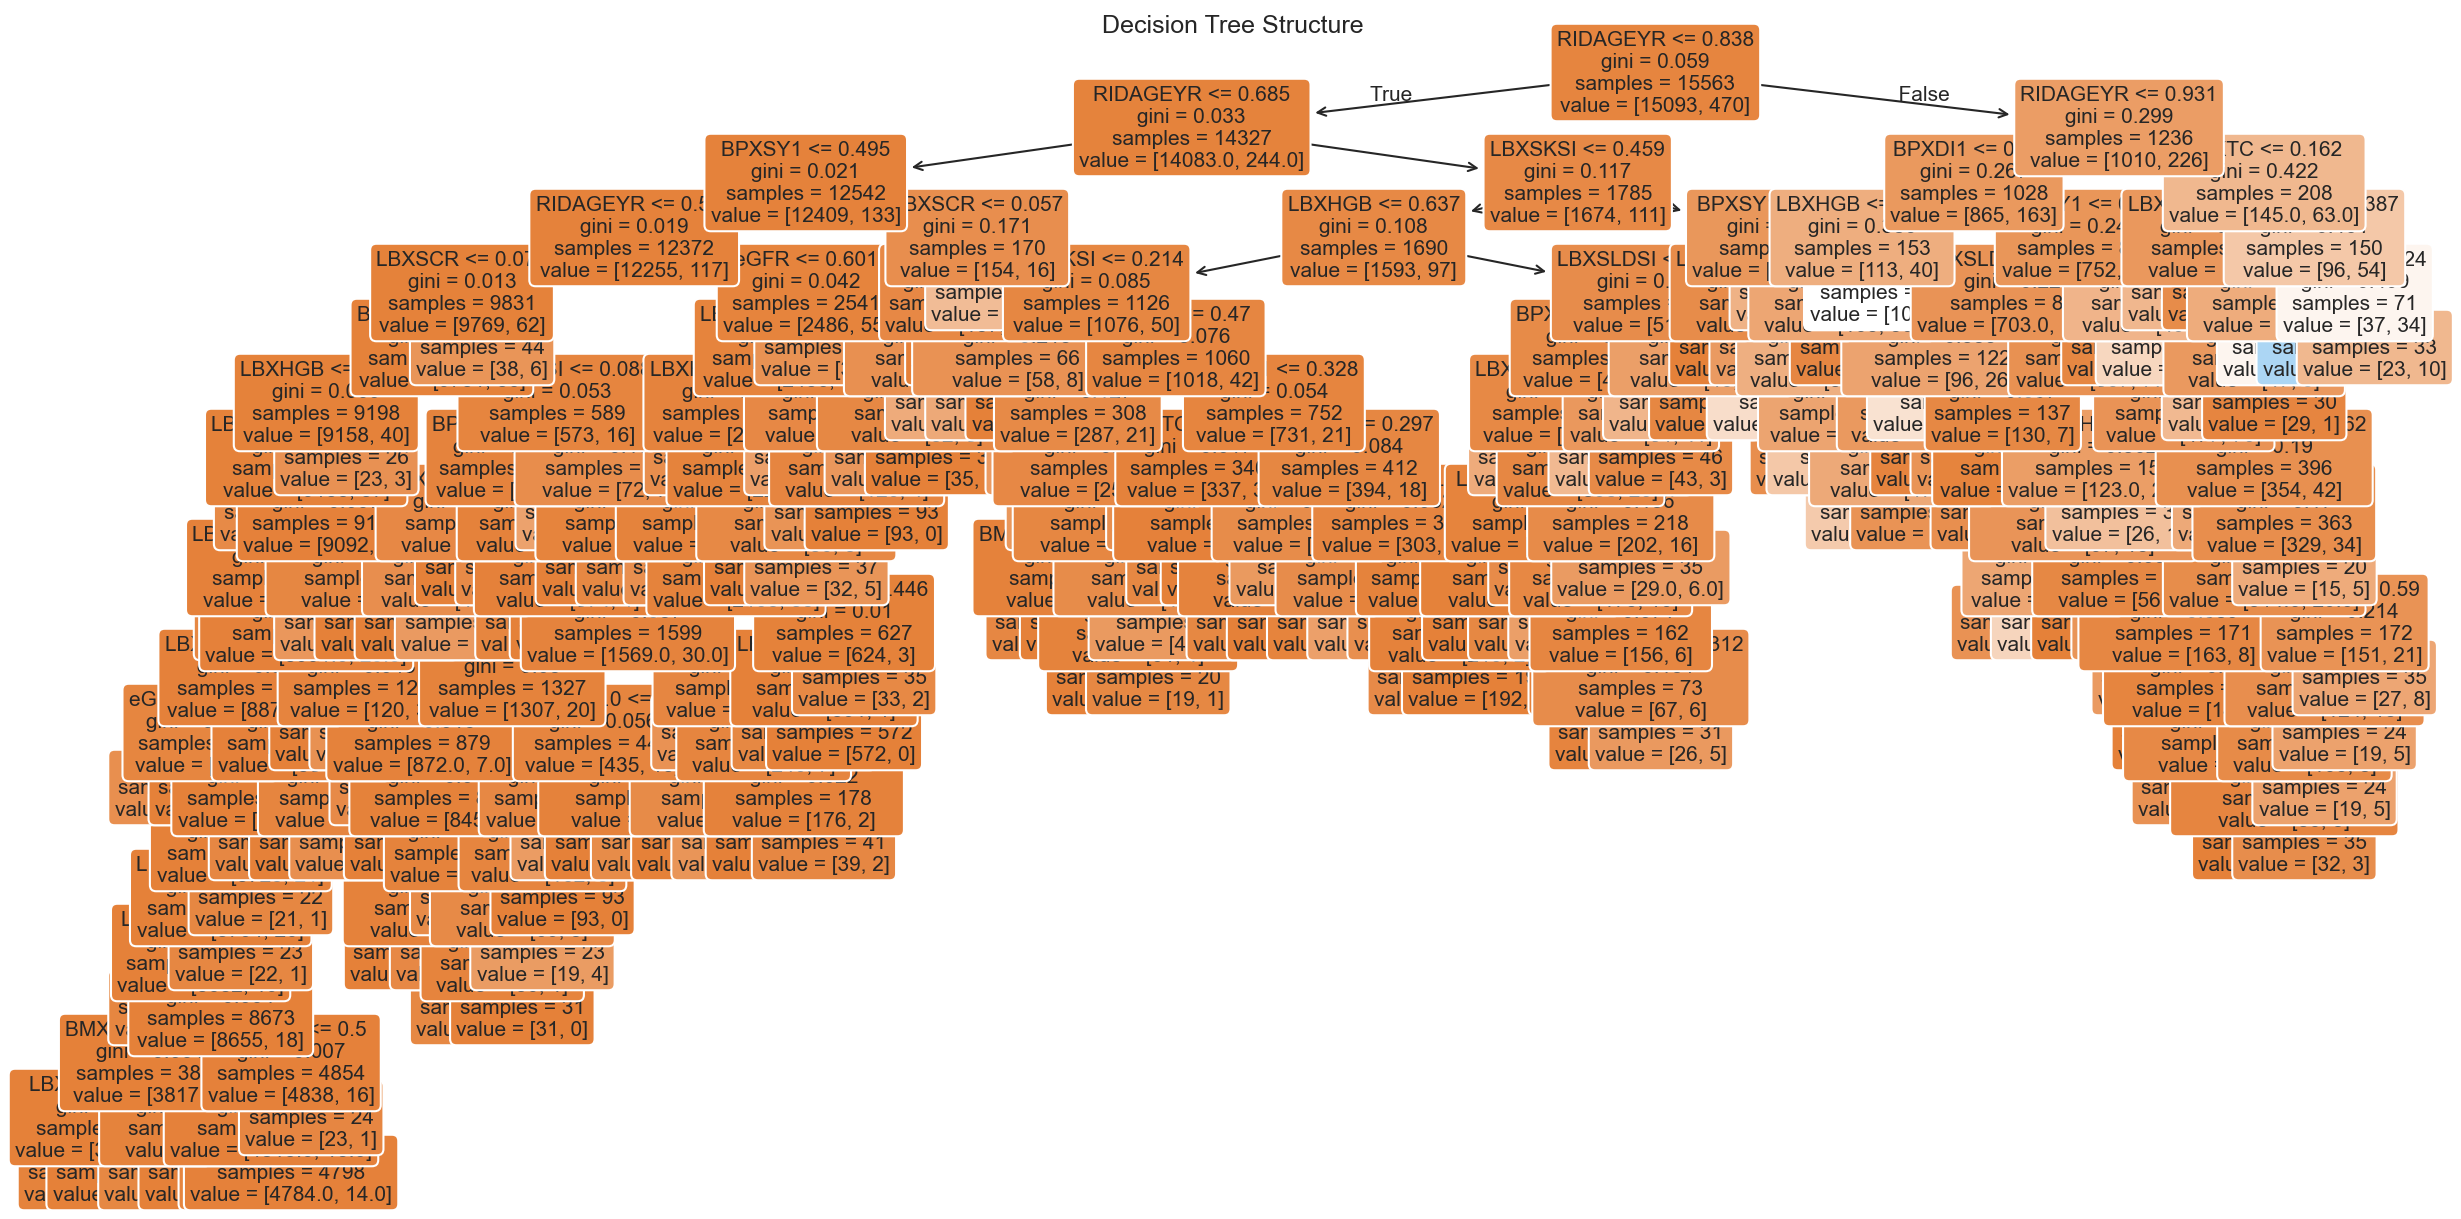

In [476]:
from sklearn.tree import plot_tree

# Visualizing decision tree
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(
    model_tree_prune,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

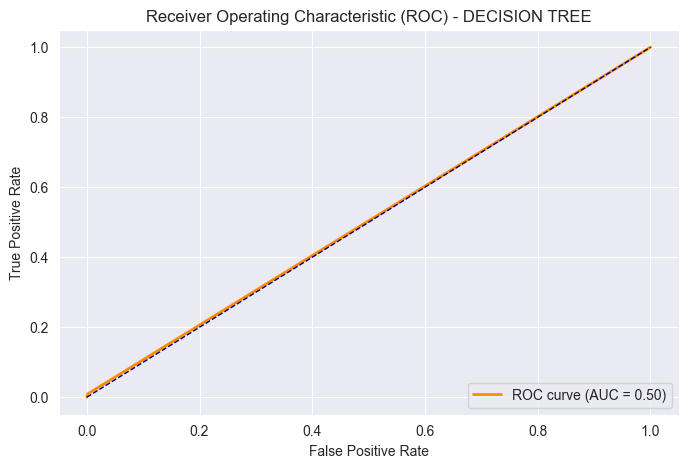

In [464]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_prune)

# Compute AUC
auc = roc_auc_score(y_test, predictions_prune)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - DECISION TREE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### manual pruning was unsuccessful, go with full decision tree

In [397]:
### repeat process above w/ SMOTE dataframe 
X_train_const_smote = sm.add_constant(X_train_smote)
# Define and fit model
log_mod_smote = sm.Logit(y_train_smote, X_train_const_smote).fit()
# Summary of results
print(log_mod_smote.summary())

odds_ratios_smote = pd.DataFrame(
    {
        "OR": np.exp(log_mod_smote.params),
        "Lower CI": log_mod_smote.conf_int()[0],
        "Upper CI": log_mod_smote.conf_int()[1],
    }
)
print("Odds Ratios w/ 95% CI for SMOTE:\n")
print(odds_ratios_smote)

Optimization terminated successfully.
         Current function value: 0.386685
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30157
Method:                           MLE   Df Model:                           43
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4421
Time:                        14:39:55   Log-Likelihood:                -11678.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0732      0.481     -6.383      0.000      -4.017      -2.130
DRD360           0.4887

In [ ]:
## reduce model by manual backward selection until all p < 0.10

In [402]:
X_train_smote_dropped = X_train_const_smote.drop(columns='Cluster_8')

In [403]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386685
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30158
Method:                           MLE   Df Model:                           42
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4421
Time:                        14:46:55   Log-Likelihood:                -11678.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0881      0.475     -6.504      0.000      -4.019      -2.158
DRD360           0.4881

In [404]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='LBXSKSI')

In [405]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386686
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30159
Method:                           MLE   Df Model:                           41
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4421
Time:                        14:47:16   Log-Likelihood:                -11678.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0712      0.471     -6.523      0.000      -3.994      -2.148
DRD360           0.4877

In [406]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='alcohol_2.0')

In [407]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386688
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30160
Method:                           MLE   Df Model:                           40
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4421
Time:                        14:47:48   Log-Likelihood:                -11678.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0708      0.471     -6.522      0.000      -3.994      -2.148
DRD360           0.4893

In [408]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='Cluster_9')

In [409]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386691
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30161
Method:                           MLE   Df Model:                           39
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4421
Time:                        14:48:22   Log-Likelihood:                -11678.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0721      0.471     -6.525      0.000      -3.995      -2.149
DRD360           0.4872

In [410]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='alcohol_3.0')

In [411]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386705
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30162
Method:                           MLE   Df Model:                           38
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4421
Time:                        14:48:57   Log-Likelihood:                -11679.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0469      0.470     -6.483      0.000      -3.968      -2.126
DRD360           0.5015

In [412]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='educ_cat_2.0')

In [413]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386713
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30163
Method:                           MLE   Df Model:                           37
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4421
Time:                        14:49:29   Log-Likelihood:                -11679.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0621      0.469     -6.523      0.000      -3.982      -2.142
DRD360           0.5019

In [414]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='LBDHDD')

In [415]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386732
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30164
Method:                           MLE   Df Model:                           36
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4421
Time:                        14:50:09   Log-Likelihood:                -11680.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.9872      0.464     -6.436      0.000      -3.897      -2.078
DRD360           0.4889

In [416]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='LBXSIR')

In [417]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386748
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30165
Method:                           MLE   Df Model:                           35
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4420
Time:                        14:51:11   Log-Likelihood:                -11680.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0123      0.463     -6.500      0.000      -3.921      -2.104
DRD360           0.4838

In [418]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='LBXSCR')

In [419]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386768
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30166
Method:                           MLE   Df Model:                           34
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4420
Time:                        14:51:55   Log-Likelihood:                -11681.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.8172      0.427     -6.604      0.000      -3.653      -1.981
DRD360           0.4808

In [420]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='LBXGH')

In [421]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386791
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30167
Method:                           MLE   Df Model:                           33
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4420
Time:                        14:52:26   Log-Likelihood:                -11681.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.9331      0.415     -7.064      0.000      -3.747      -2.119
DRD360           0.4732

In [422]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='LBXSUA')

In [423]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386812
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30168
Method:                           MLE   Df Model:                           32
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4419
Time:                        14:52:55   Log-Likelihood:                -11682.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.0221      0.408     -7.413      0.000      -3.821      -2.223
DRD360           0.4809

In [424]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='LBXTC')

In [425]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386836
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30169
Method:                           MLE   Df Model:                           31
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4419
Time:                        14:54:12   Log-Likelihood:                -11683.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.9804      0.406     -7.336      0.000      -3.777      -2.184
DRD360           0.4757

In [426]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='RIAGENDR_1.0')

In [427]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386858
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30170
Method:                           MLE   Df Model:                           30
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4419
Time:                        14:54:55   Log-Likelihood:                -11683.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.9968      0.406     -7.382      0.000      -3.792      -2.201
DRD360           0.4729

In [428]:
X_train_smote_dropped = X_train_smote_dropped.drop(columns='DRD360')

In [429]:
log_mod_smote = sm.Logit(y_train_smote, X_train_smote_dropped).fit()
# Summary of results
print(log_mod_smote.summary())

Optimization terminated successfully.
         Current function value: 0.386895
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CVD_DEATH   No. Observations:                30201
Model:                          Logit   Df Residuals:                    30171
Method:                           MLE   Df Model:                           29
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.4418
Time:                        14:55:29   Log-Likelihood:                -11685.
converged:                       True   LL-Null:                       -20934.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.9655      0.405     -7.315      0.000      -3.760      -2.171
DRQSPREP         0.3399

In [501]:
odds_ratios_smote = pd.DataFrame(
    {
        "OR": np.exp(log_mod_smote.params),
        "Lower CI": log_mod_smote.conf_int()[0],
        "Upper CI": log_mod_smote.conf_int()[1],
    }
)
odds_ratios_smote_rounded = odds_ratios_smote.round(2)
print("Odds Ratios w/ 95% CI for SMOTE:\n")
print(odds_ratios_smote_rounded)

Odds Ratios w/ 95% CI for SMOTE:

                   OR  Lower CI  Upper CI
const            0.05     -3.76     -2.17
DRQSPREP         1.40      0.05      0.63
DR1_320Z         1.85      0.11      1.12
RIDAGEYR       253.28      5.30      5.77
BMXBMI           0.16     -2.69     -1.01
BMXWAIST        17.26      2.20      3.50
BPXSY1          70.44      3.85      4.66
BPXDI1           0.13     -2.38     -1.63
LBXSCA           0.24     -2.18     -0.64
LBXSLDSI      8568.07      7.27     10.84
LBXSPH           0.48     -1.35     -0.11
LBXSNASI         0.03     -4.46     -2.65
LBXHGB           3.44      0.86      1.61
race_cat_2.0     1.29      0.14      0.37
race_cat_3.0     1.35      0.21      0.39
HIQ011_1.0       1.56      0.32      0.56
educ_cat_3.0     0.58     -0.63     -0.45
educ_cat_4.0     0.65     -0.53     -0.34
DIQ010_1.0       1.37      0.22      0.41
smoke_2.0        0.42     -0.99     -0.77
smoke_3.0        0.43     -0.95     -0.74
eGFR             0.28     -1.66     -0.86


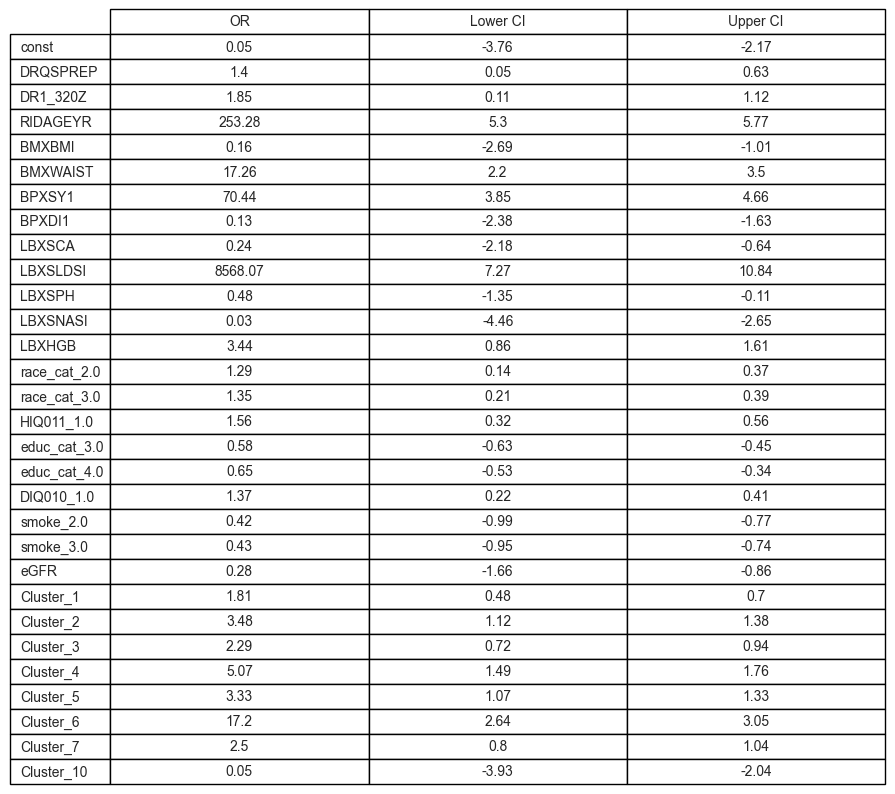

In [504]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, len(odds_ratios_smote_rounded) * 0.3)) 
ax.axis('off')  

# Create the table
table = ax.table(
    cellText=odds_ratios_smote_rounded.values,
    colLabels=odds_ratios_smote_rounded.columns,
    rowLabels=odds_ratios_smote_rounded.index,
    cellLoc='center',
    loc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scale width and height

# Save as PNG
plt.savefig("odds_ratios_smote_table.png", bbox_inches='tight', dpi=300)
plt.show()

In [432]:
X_test_selected_smote = X_test_smote[['DRQSPREP', 'DR1_320Z', 'RIDAGEYR', 'BMXBMI', 'BMXWAIST', 'BPXSY1', 'BPXDI1', 'LBXSCA', 'LBXSLDSI', 'LBXSPH', 'LBXSNASI', 'LBXHGB', 'race_cat_2.0', 'race_cat_3.0', 'HIQ011_1.0', 'educ_cat_3.0', 'educ_cat_4.0', 'DIQ010_1.0', 'smoke_2.0', 'smoke_3.0', 'eGFR', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_10']]

In [486]:
X_test_const_smote = sm.add_constant(X_test_selected_smote)

# Predict probabilities
y_pred_probs_smote = log_mod_smote.predict(X_test_const_smote)

# Convert probabilities to binary predictions
y_pred_smote = (y_pred_probs_smote >= 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test_smote, y_pred_probs_smote))

Accuracy: 0.8283671036948749

Confusion Matrix:
 [[3010  749]
 [ 547 3245]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      3759
         1.0       0.81      0.86      0.83      3792

    accuracy                           0.83      7551
   macro avg       0.83      0.83      0.83      7551
weighted avg       0.83      0.83      0.83      7551

ROC AUC Score: 0.901350401792379


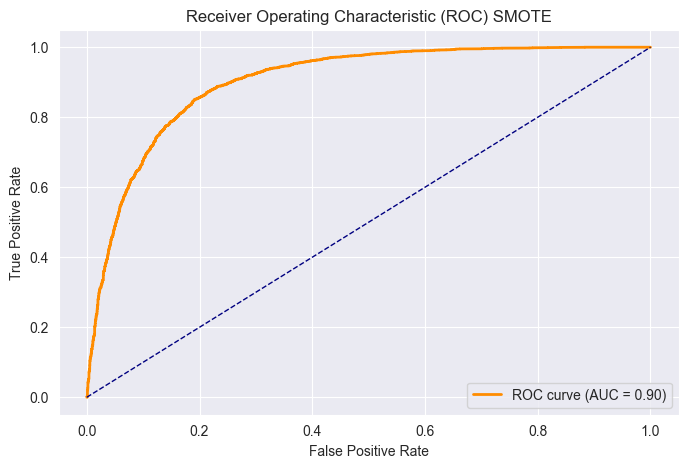

In [487]:
# Compute the ROC curve
fpr_smote, tpr_smote, thresholds = roc_curve(y_test_smote, y_pred_probs_smote)

# Compute AUC
auc_smote = roc_auc_score(y_test_smote, y_pred_probs_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### WHAT IF WE RAN THE SMOTE MODEL ON THE ORIGINAL TRAINING DATA

In [448]:
# Get list of features (including 'const') that the model expects
model_features = log_mod_smote.params.index.tolist()
model_features_no_const = [col for col in model_features if col != 'const']

# Rebuild test set with correct columns
X_test_selected_b = X_test[model_features_no_const]

# Add constant
X_test_const_b = sm.add_constant(X_test_selected)

# Predict
y_pred_probs_b = log_mod_smote.predict(X_test_const)


In [449]:
print("Test shape:", X_test_const_b.shape)
print("Model expects:", log_mod_smote.params.shape)

Test shape: (3891, 30)
Model expects: (30,)


In [450]:
# Predict probabilities
y_pred_probs_b = log_mod_smote.predict(X_test_const_b) 

# Convert probabilities to binary predictions
y_pred_b = (y_pred_probs_b >= 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_b))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_b))
print("\nClassification Report:\n", classification_report(y_test, y_pred_b))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs_b))

Accuracy: 0.8118735543562067

Confusion Matrix:
 [[3066  717]
 [  15   93]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.81      0.89      3783
         1.0       0.11      0.86      0.20       108

    accuracy                           0.81      3891
   macro avg       0.55      0.84      0.55      3891
weighted avg       0.97      0.81      0.87      3891

ROC AUC Score: 0.8976879999216769


In [488]:
### run full model w/ decision tree regressor on SMOTE
# Create and train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
clf_smote = DecisionTreeClassifier(random_state=12345)
clf_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = clf_smote.predict(X_test_smote)
y_pred_probs_smote = clf_smote.predict_proba(X_test_smote)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test_smote, y_pred_probs_smote))

Accuracy: 0.9638458482320222

Confusion Matrix:
 [[3611  148]
 [ 125 3667]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      3759
         1.0       0.96      0.97      0.96      3792

    accuracy                           0.96      7551
   macro avg       0.96      0.96      0.96      7551
weighted avg       0.96      0.96      0.96      7551

ROC AUC Score: 0.9638318457642585


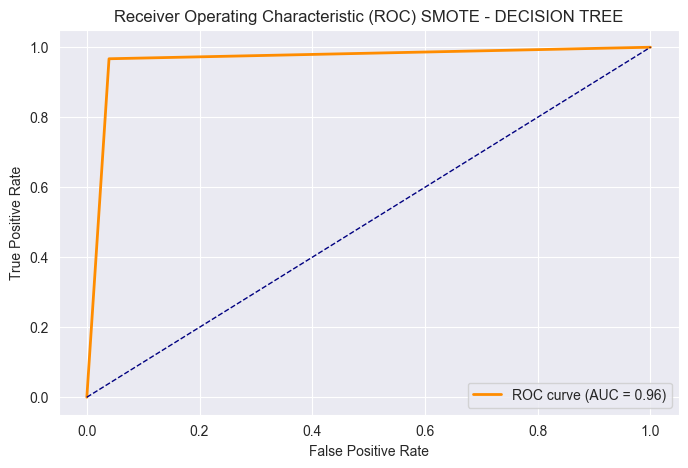

In [489]:
# Compute the ROC curve
fpr_smote, tpr_smote, thresholds = roc_curve(y_test_smote, y_pred_probs_smote)

# Compute AUC
auc_smote = roc_auc_score(y_test_smote, y_pred_probs_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) SMOTE - DECISION TREE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

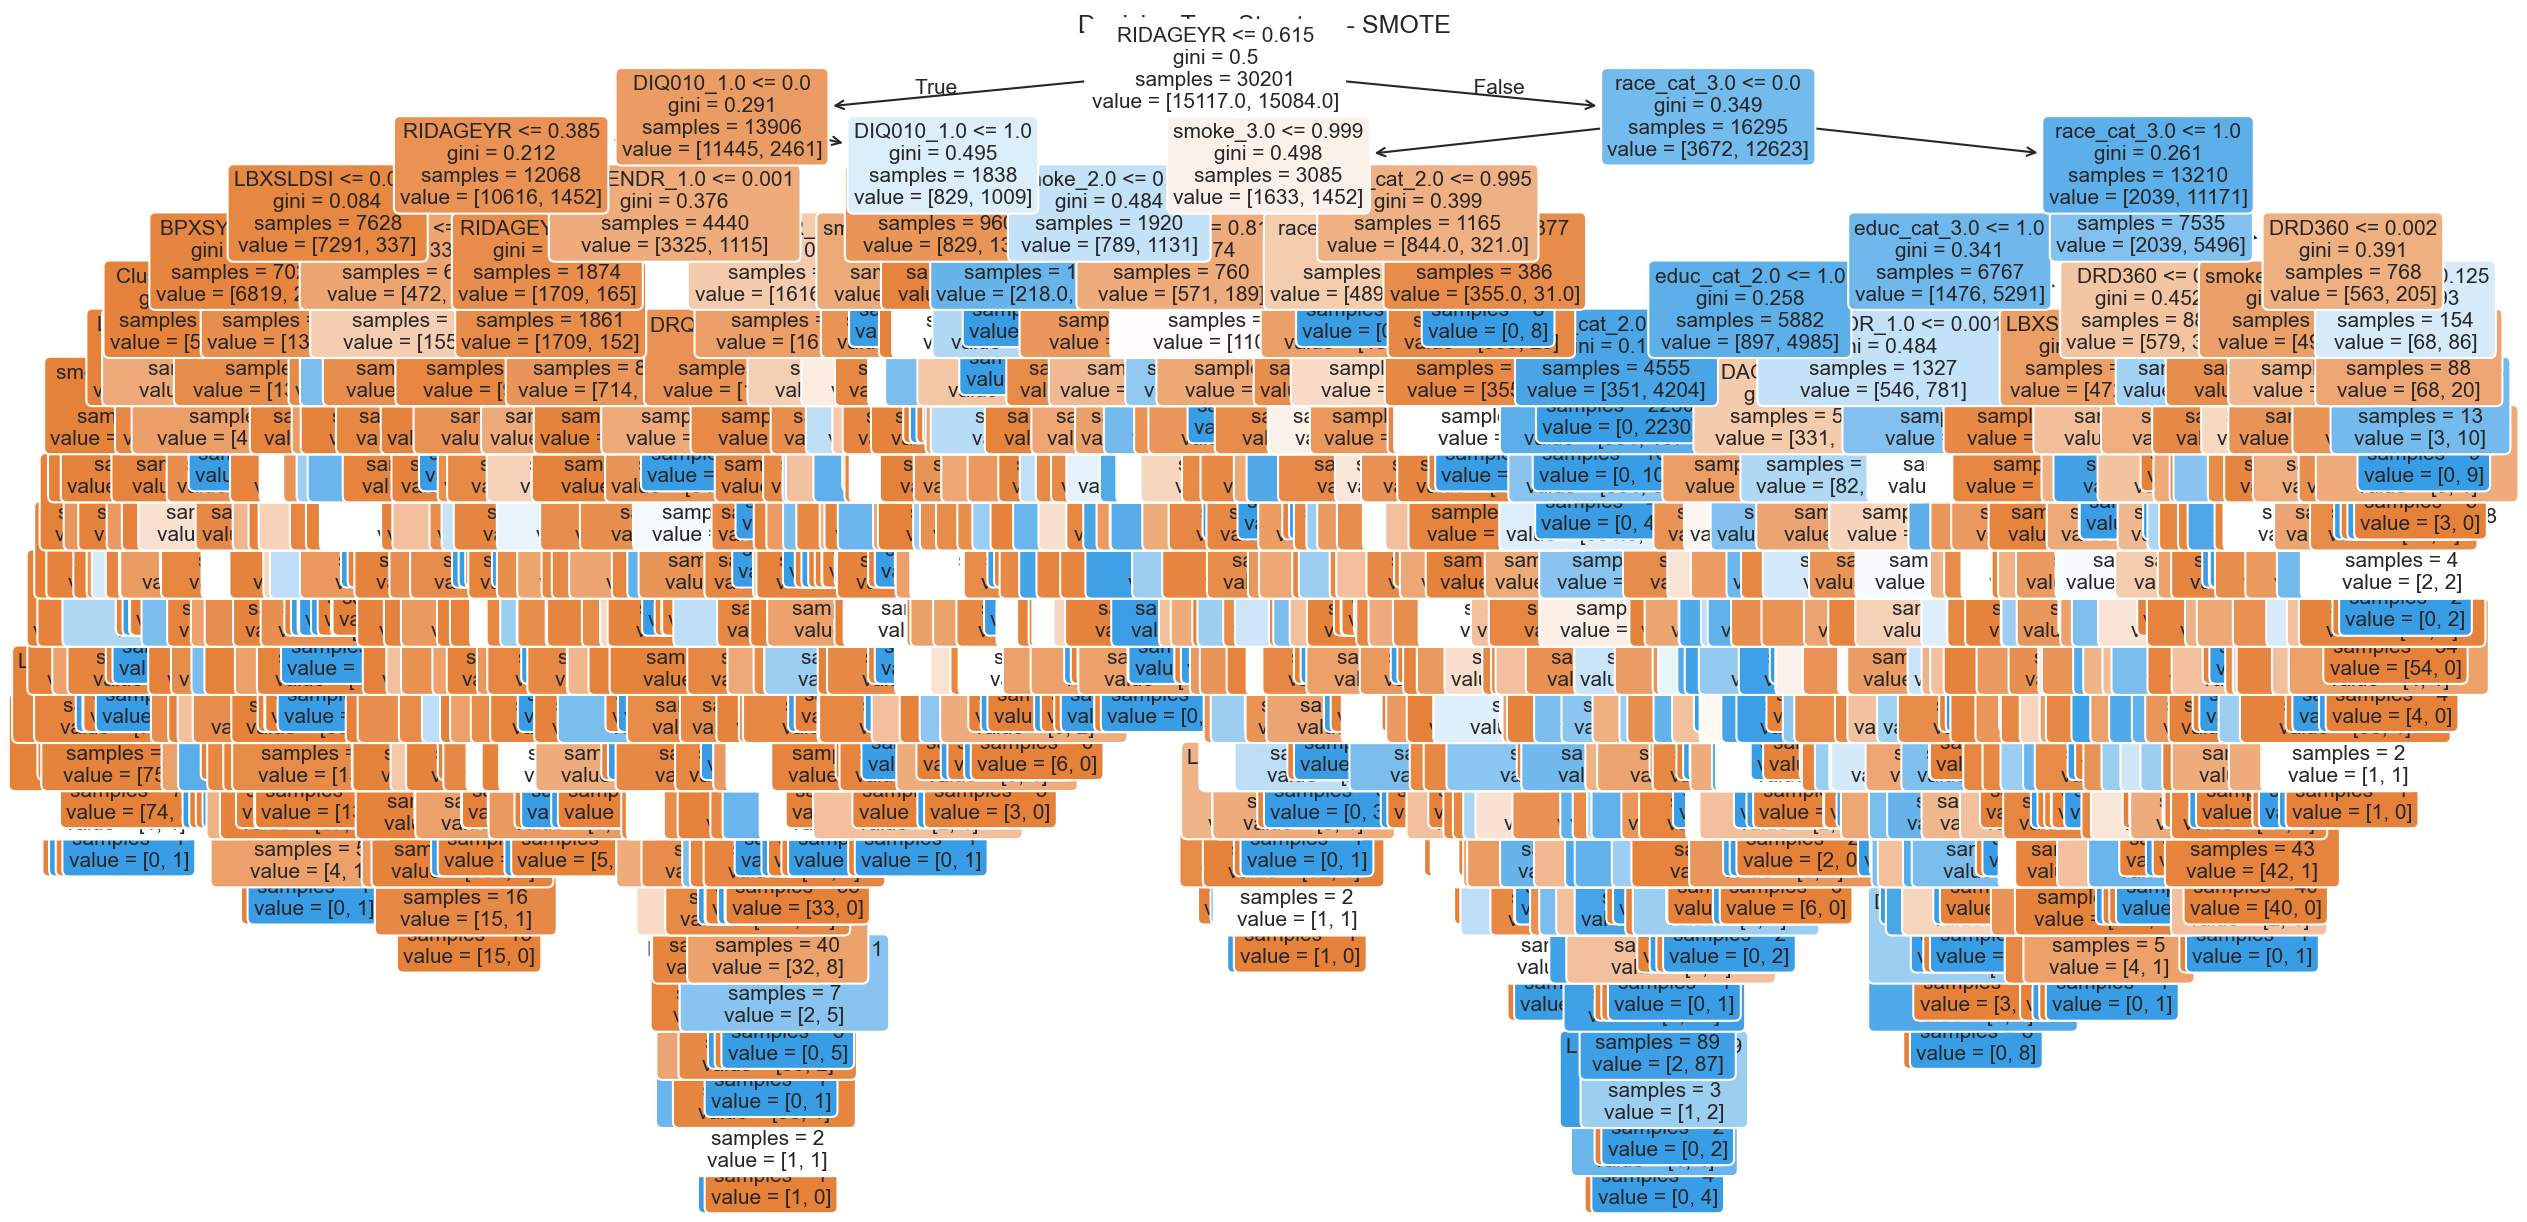

In [490]:
from sklearn.tree import plot_tree

# Visualizing decision tree
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(
    clf_smote,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure - SMOTE")
plt.show()

### MANUALLY PRUNE TREE ON SMOTE DATA

In [534]:
model_tree_prune_smote = DecisionTreeClassifier(
    random_state=12345,  
    max_depth=5,        
    min_samples_split=50,  # Minimum samples required to split an internal node
    min_samples_leaf=20   # Minimum samples required to be at a leaf node
)

model_tree_prune_smote.fit(X_train_smote, y_train_smote)
predictions_prune_smote = model_tree_prune_smote.predict(X_test_smote)

In [535]:
### run full model w/ decision tree regressor on SMOTE
y_pred_probs_smote = model_tree_prune_smote.predict_proba(X_test_smote)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_smote, predictions_prune_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_smote, predictions_prune_smote))
print("\nClassification Report:\n", classification_report(y_test_smote, predictions_prune_smote))
print("ROC AUC Score:", roc_auc_score(y_test_smote, y_pred_probs_smote))

Accuracy: 0.9026618990862137

Confusion Matrix:
 [[3472  287]
 [ 448 3344]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      3759
         1.0       0.92      0.88      0.90      3792

    accuracy                           0.90      7551
   macro avg       0.90      0.90      0.90      7551
weighted avg       0.90      0.90      0.90      7551

ROC AUC Score: 0.956214298061586


In [536]:
# apply pruned model from SMOTE data back on unbalanced dataset
# Predict class probabilities
y_pred_probs_unbalanced = model_tree_prune_smote.predict_proba(X_test)[:, 1]

# Predict class labels using a threshold (e.g., 0.5)
y_pred_unbalanced = (y_pred_probs_unbalanced >= 0.5).astype(int)

# Evaluate the model on the unbalanced test set
print("Accuracy:", accuracy_score(y_test, y_pred_unbalanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_unbalanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_unbalanced))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs_unbalanced))

Accuracy: 0.9144178874325366

Confusion Matrix:
 [[3506  277]
 [  56   52]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      3783
         1.0       0.16      0.48      0.24       108

    accuracy                           0.91      3891
   macro avg       0.57      0.70      0.60      3891
weighted avg       0.96      0.91      0.93      3891

ROC AUC Score: 0.8733270674851431


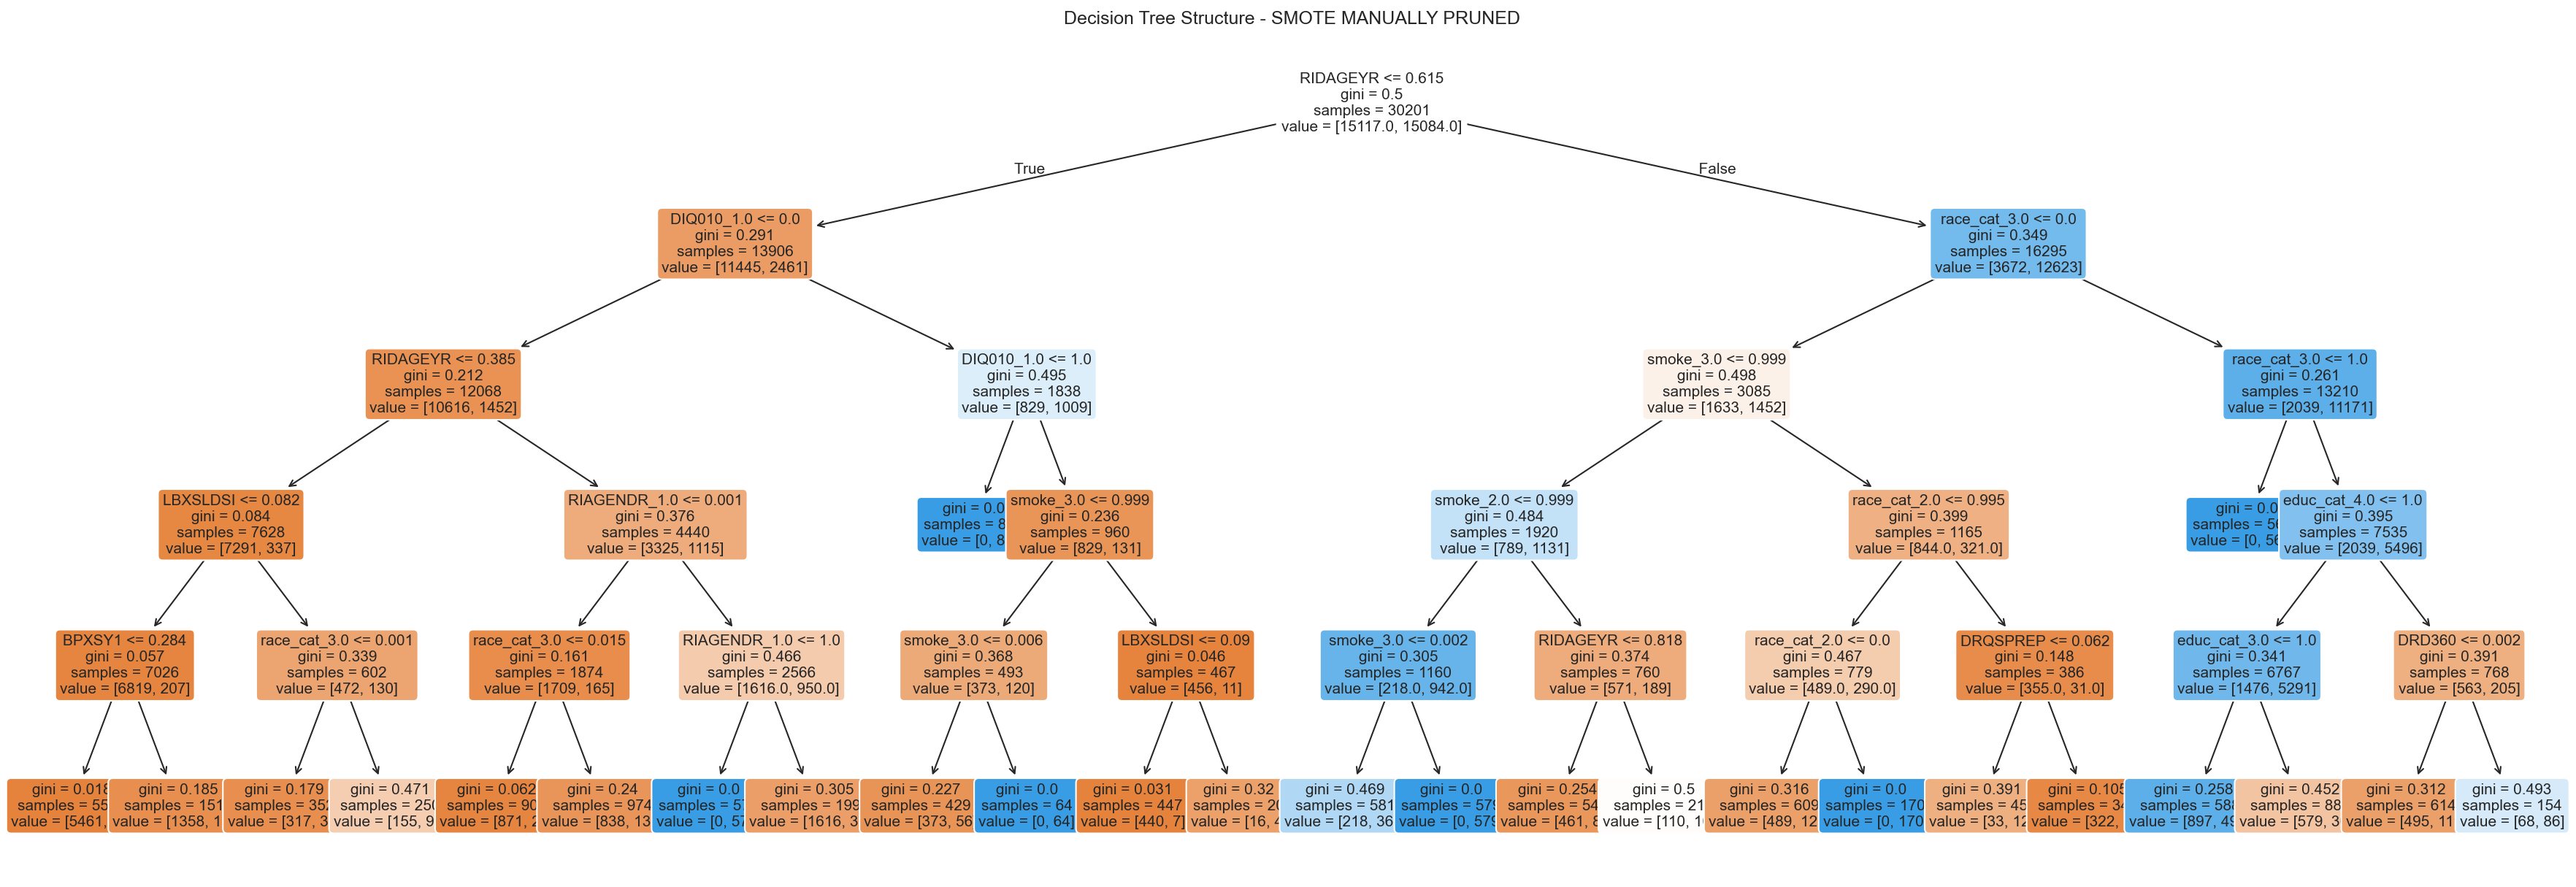

In [500]:
from sklearn.tree import plot_tree

# Visualizing decision tree
plt.figure(figsize=(30, 10), dpi=150)
plot_tree(
    model_tree_prune_smote,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure - SMOTE MANUALLY PRUNED")
plt.savefig("decision_tree_smote.png", bbox_inches='tight')
plt.show()

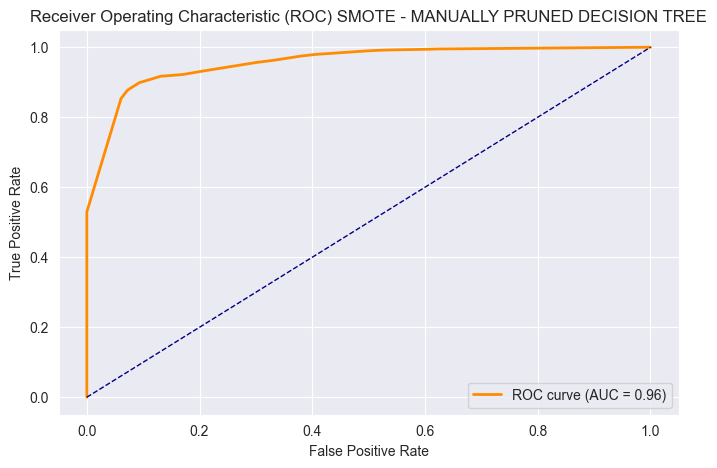

In [505]:
# Compute the ROC curve
fpr_smote, tpr_smote, thresholds = roc_curve(y_test_smote, y_pred_probs_smote)

# Compute AUC
auc_smote = roc_auc_score(y_test_smote, y_pred_probs_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) SMOTE - MANUALLY PRUNED DECISION TREE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SHAP VALUES FOR FEATURE IMPORTANCE - NOT PRESENTED IN PROJECT BUT FOR PRACTICE

In [587]:
import shap
model = LogisticRegression()
X_train_smote_dropped = X_train_smote_dropped.drop("const", axis=1)
model.fit(X_train_smote_dropped, y_train_smote)


LogisticRegression()

In [ ]:
K = 100
sampled_data = shap.sample(X_train_smote_dropped, K)
explainer = shap.KernelExplainer(model.predict_proba, sampled_data)
# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test_selected_smote)
shap.summary_plot(shap_values[1], X_test_selected_smote)

### DESCRIPTIVE STATISTICS ON FINAL DATASET

In [599]:
print(smote_df.stb.freq(['CVD_DEATH']))

   CVD_DEATH  count  percent  cumulative_count  cumulative_percent
0        1.0  18876     50.0             18876                50.0
1        0.0  18876     50.0             37752               100.0


In [600]:
print(final_df.stb.freq(['CVD_DEATH']))

   CVD_DEATH  count    percent  cumulative_count  cumulative_percent
0        0.0  18876  97.028889             18876           97.028889
1        1.0    578   2.971111             19454          100.000000


In [598]:
smote_df.groupby('CVD_DEATH').describe()

DRD360                                                 DRQSPREP  \
             count      mean       std  min  25%  50%     75%  max    count   
CVD_DEATH                                                                     
0.0        18876.0  0.034449  0.062338  0.0  0.0  0.0  0.1250  1.0  18876.0   
1.0        18876.0  0.029984  0.053580  0.0  0.0  0.0  0.0553  1.0  18876.0   

                     ... Cluster_9      Cluster_10                           \
               mean  ...       75%  max      count      mean       std  min   
CVD_DEATH            ...                                                      
0.0        0.273389  ...       0.0  1.0    18876.0  0.029032  0.167899  0.0   
1.0        0.251171  ...       0.0  1.0    18876.0  0.000318  0.017826  0.0   

                               
           25%  50%  75%  max  
CVD_DEATH                      
0.0        0.0  0.0  0.0  1.0  
1.0        0.0  0.0  0.0  1.0  

[2 rows x 352 columns]

In [ ]:
target_variable = 'CVD_DEATH'

# Get the list of columns excluding the target variable
feature_columns = [col for col in smote_df.columns if target_variable]

# Create histograms for each feature
for feature in feature_columns:
    plt.figure(figsize=(10, 6))
    for value in smote_df[target_variable].unique():
        subset = smote_df[smote_df[target_variable] == value]
        plt.hist(subset[feature], alpha=0.5, label=f'{target_variable} = {value}')
    plt.title(f'Histogram of {feature} by {target_variable}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()